# **Importing Liabraries**

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.cluster.hierarchy import linkage, dendrogram
!pip install scipy matplotlib

# **Loading Stock Dataset**

In [ ]:
df = pd.read_csv('Weekly.csv')

In [ ]:
df = df.rename(columns={'date': 'Date'})

In [ ]:
df

Date           C        BAC        JPM        WFC        UBS  \
0    02-01-2001  473.640277  23.375000  44.000000  26.968750  23.922093   
1    09-01-2001  489.467366  23.500000  48.687500  24.718750  25.402346   
2    16-01-2001  512.914904  25.468750  53.187500  24.968750  24.883141   
3    23-01-2001  514.673470  25.187500  51.687500  24.812500  26.012301   
4    30-01-2001  527.100672  27.735001  55.980000  25.955000  26.056930   
..          ...         ...        ...        ...        ...        ...   
820  29-11-2016   55.520000  20.290001  78.919998  51.860001        NaN   
821  06-12-2016   57.919998  22.160000  83.690002  55.549999        NaN   
822  13-12-2016   59.790001  22.610001  84.760002  55.840000        NaN   
823  20-12-2016   60.799999  22.709999  86.529999  56.099998        NaN   
824  27-12-2016   61.090000  22.610001  87.129997  55.950001        NaN   

            WB        AXP         RY         DB  ...        LNC        PFG  \
0    27.812500  45.744487  16.187500        NaN  ...  45.437500        NaN   
1    30.500000  41.290997  17.062500        NaN  ...  42.937500        NaN   
2    32.250000  42.500587  17.218750        NaN  ...  42.500000        NaN   
3    32.000000  40.906128  17.156250        NaN  ...  43.625000        NaN   
4    33.799999  42.146507  16.270000        NaN  ...  45.020000        NaN   
..         ...        ...        ...        ...  ...        ...        ...   
820        NaN  71.489998  67.050003  15.540000  ...  63.320000  57.189999   
821        NaN  72.309998  66.279999  18.290001  ...  66.150002  59.419998   
822        NaN  73.839996  69.459999  18.660000  ...  67.040001  59.520000   
823        NaN  75.059998  68.809998  19.010000  ...  67.720001  58.750000   
824        NaN  74.980003  67.900002  18.370001  ...  67.589996  58.730000   

             L          CI   GNW         AON         XL         HUM  \
0    16.822917   42.803335   NaN   33.562500  87.500000   14.937500   
1    15.979167   39.933334   NaN   32.937500  74.062500   14.000000   
2    15.479167   38.416667   NaN   32.812500  75.250000   13.250000   
3    15.729167   39.100001   NaN   34.750000  78.750000   12.687500   
4    16.541667   38.029999   NaN   35.110001  74.120003   12.510000   
..         ...         ...   ...         ...        ...         ...   
820  44.419998  138.300003  4.25  113.650002  36.490002  210.000000   
821  45.939999  137.250000  4.33  113.209999  36.180000  204.300003   
822  47.709999  134.570007  4.25  112.559998  37.220001  204.570007   
823  47.720001  137.110001  4.24  111.830002  37.279999  200.250000   
824  47.439999  139.389999  3.99  112.500000  38.029999  206.059998   

           CNA       CVH  
0    34.169128  9.500000  
1    32.539351  8.666667  
2    31.190569  9.444444  
3    31.190569  9.388889  
4    31.660394  8.055556  
..         ...       ...  
820  38.810001       NaN  
821  39.380001       NaN  
822  41.119999       NaN  
823  41.799999       NaN  
824  42.009998       NaN  

[825 rows x 76 columns]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

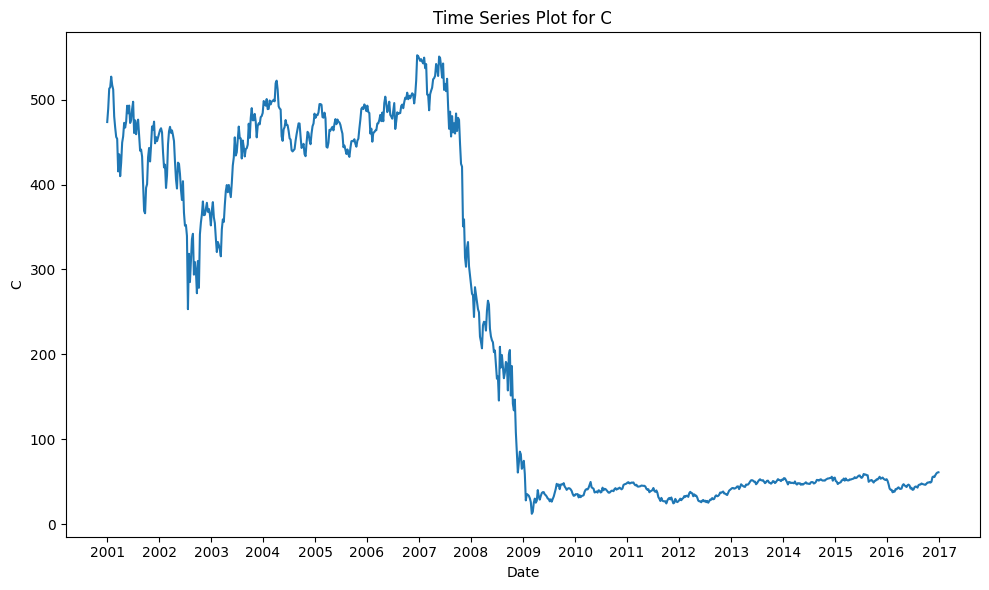

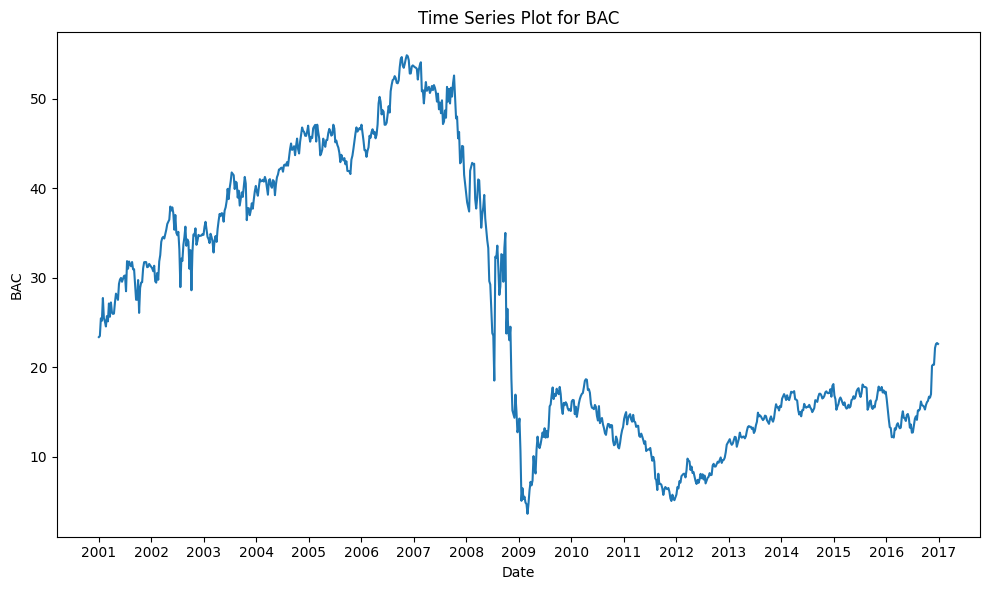

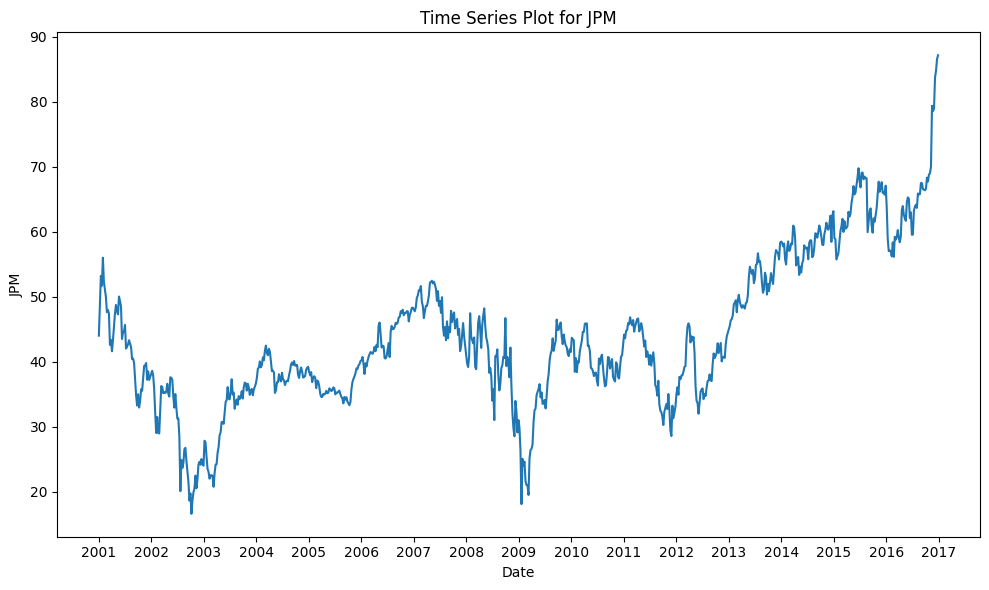

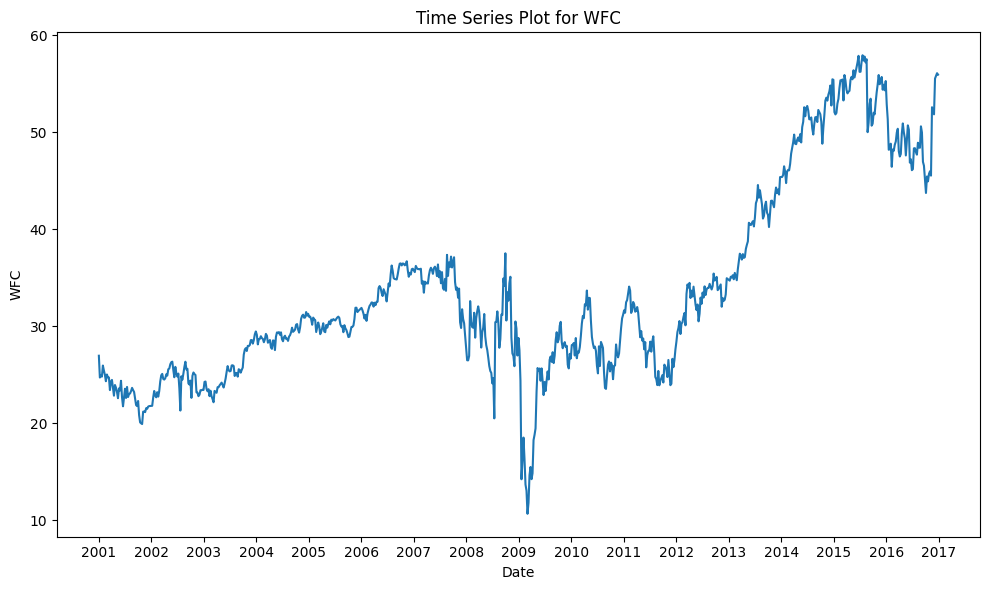

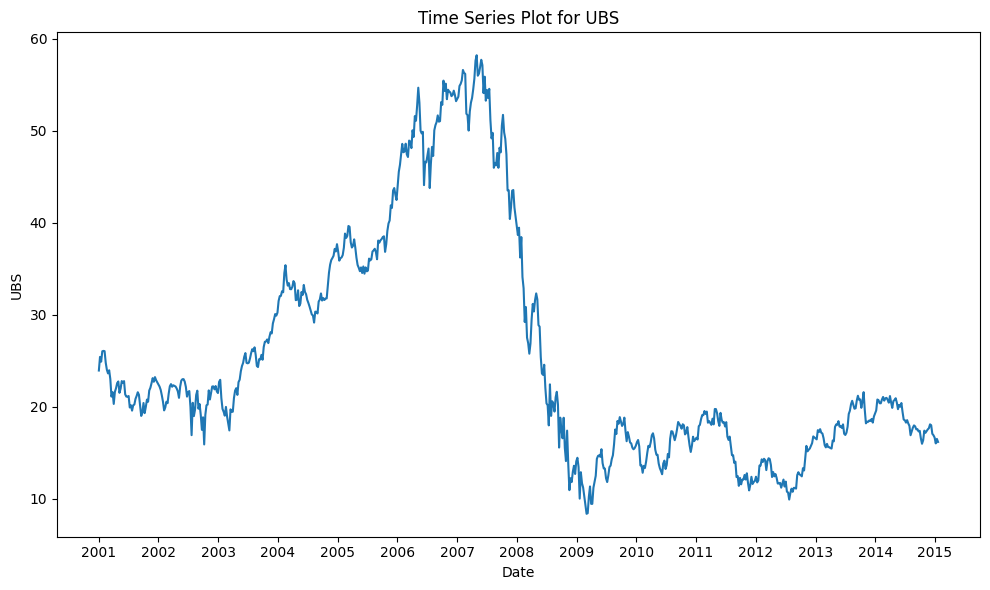

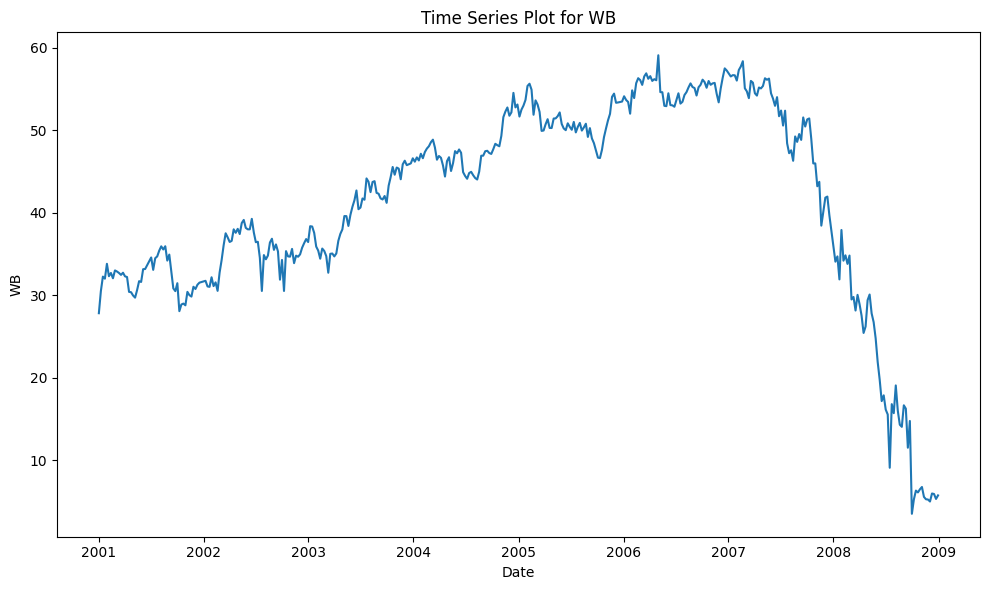

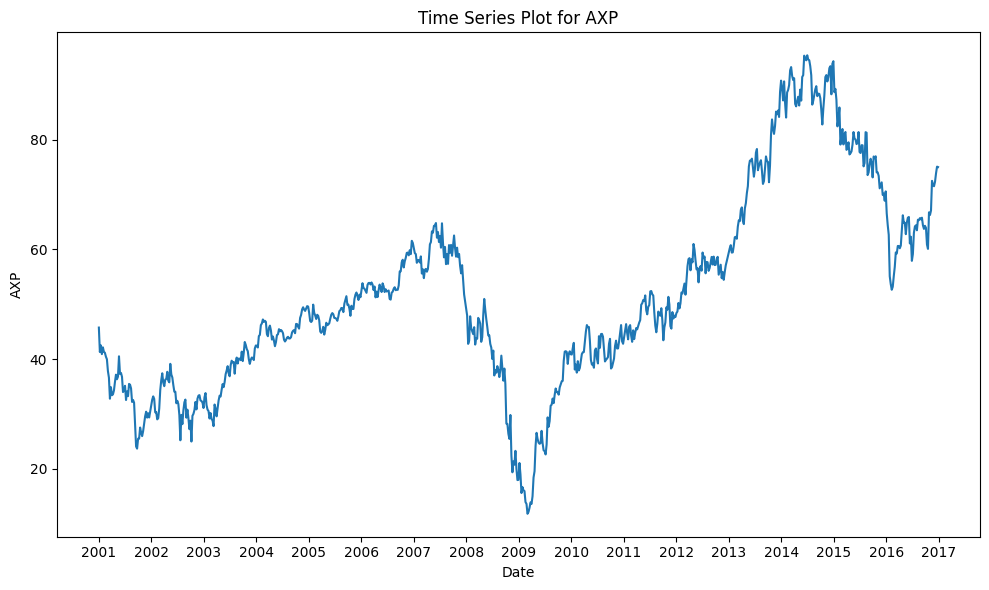

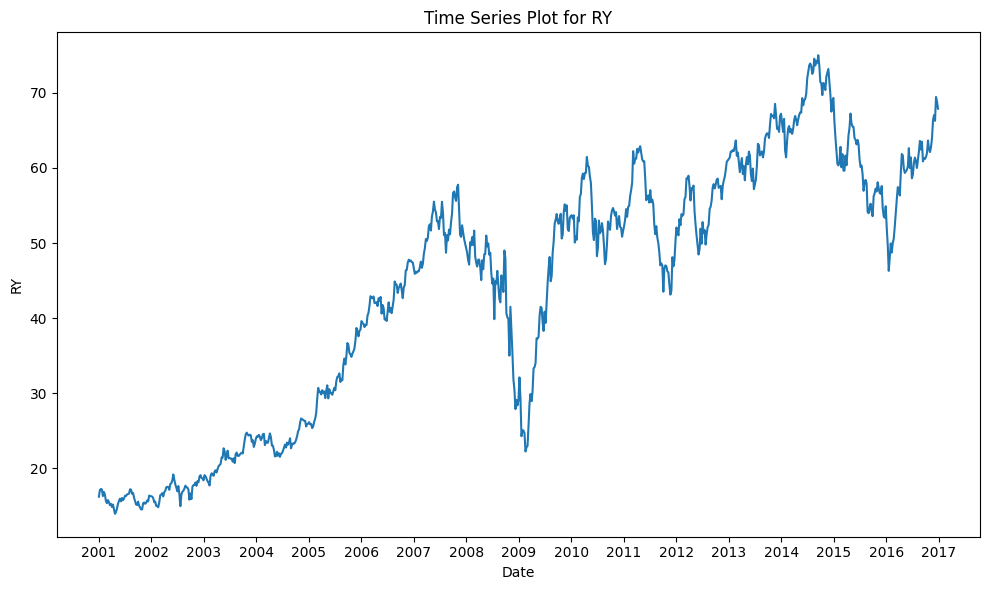

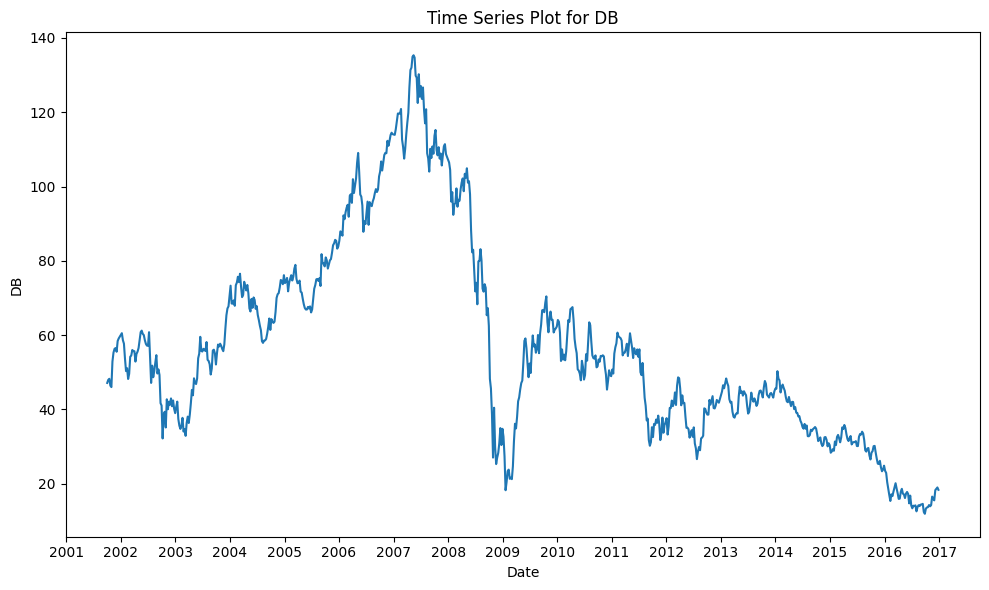

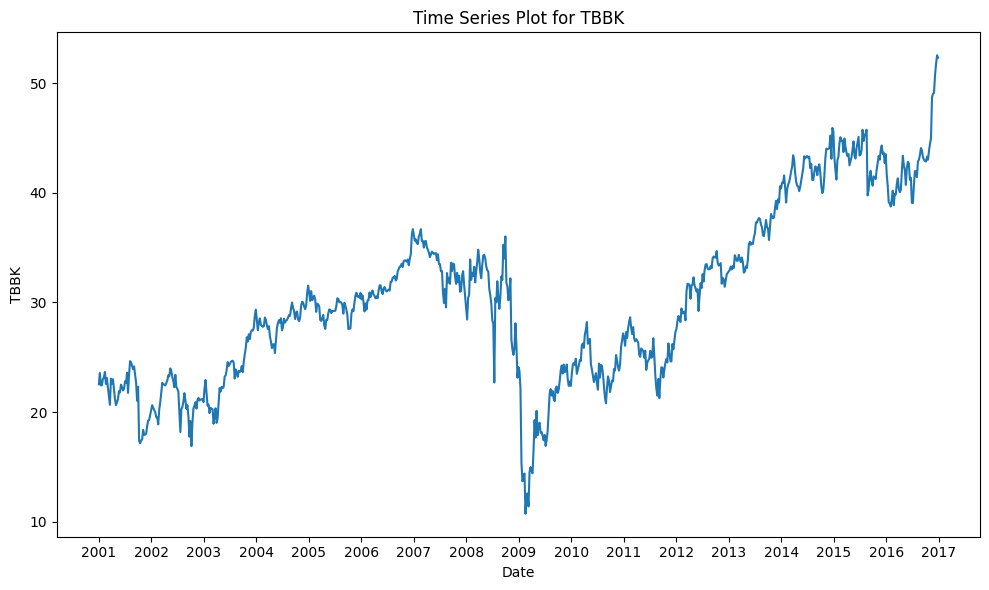

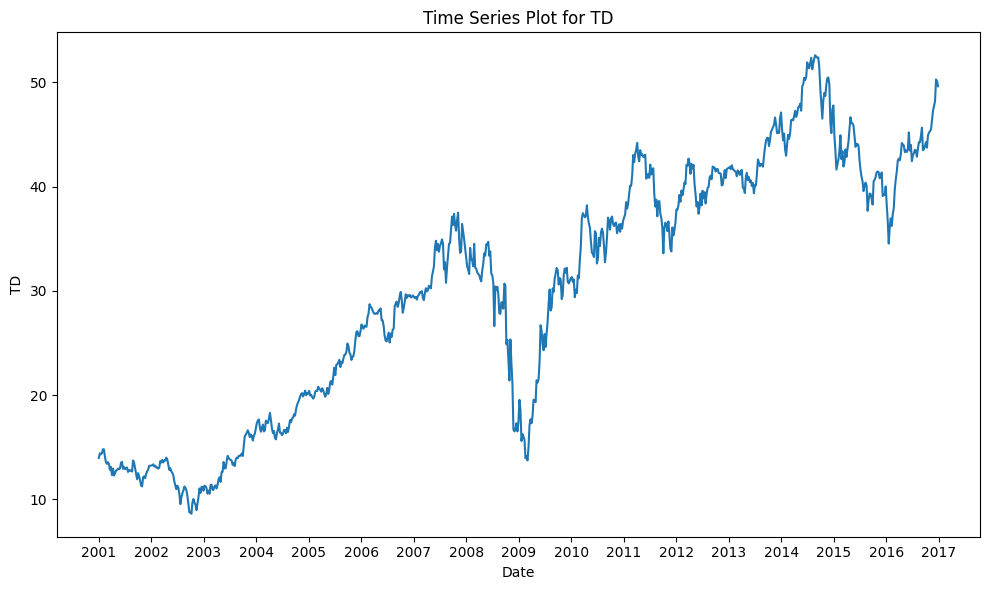

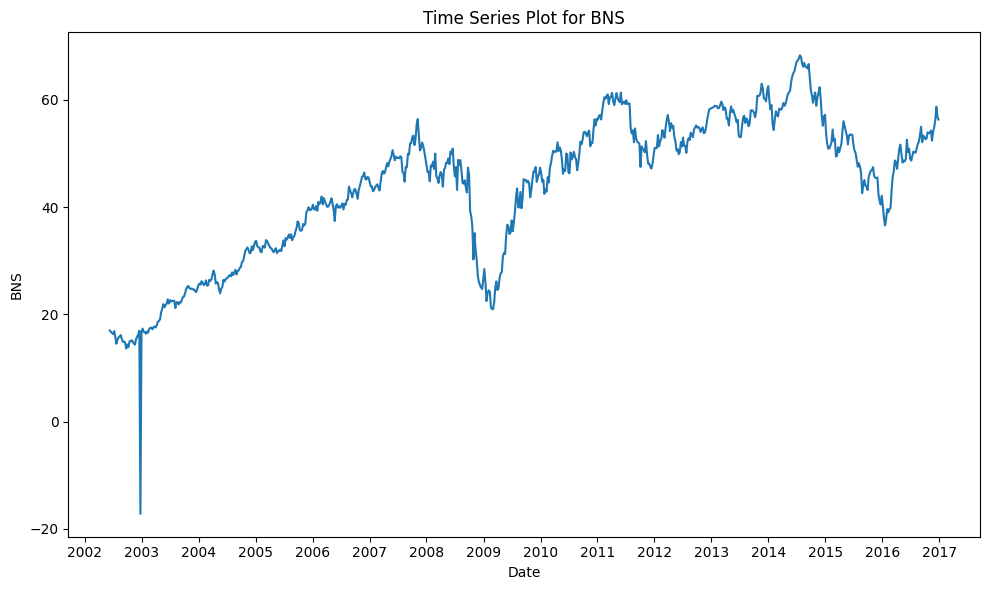

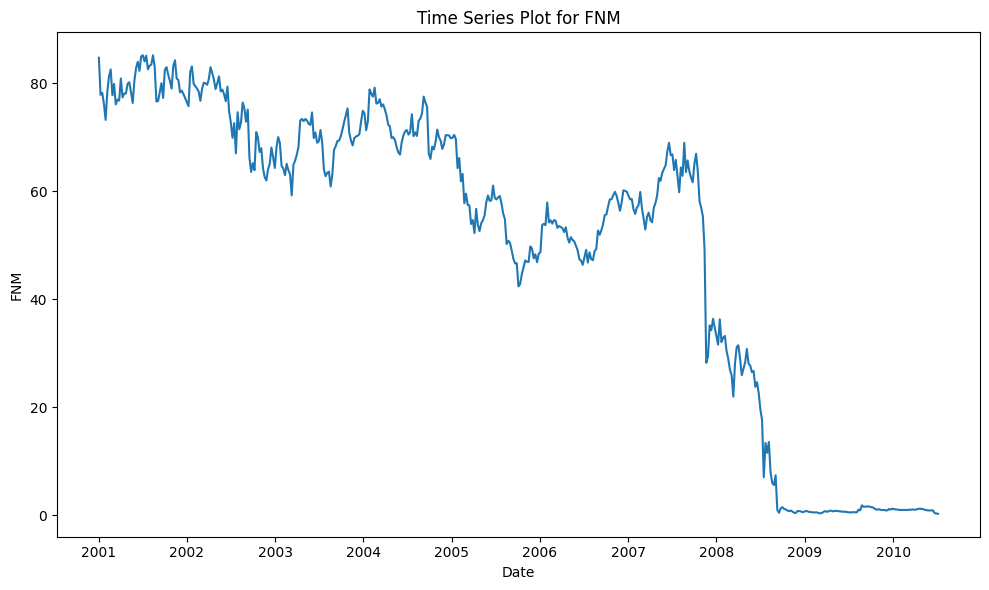

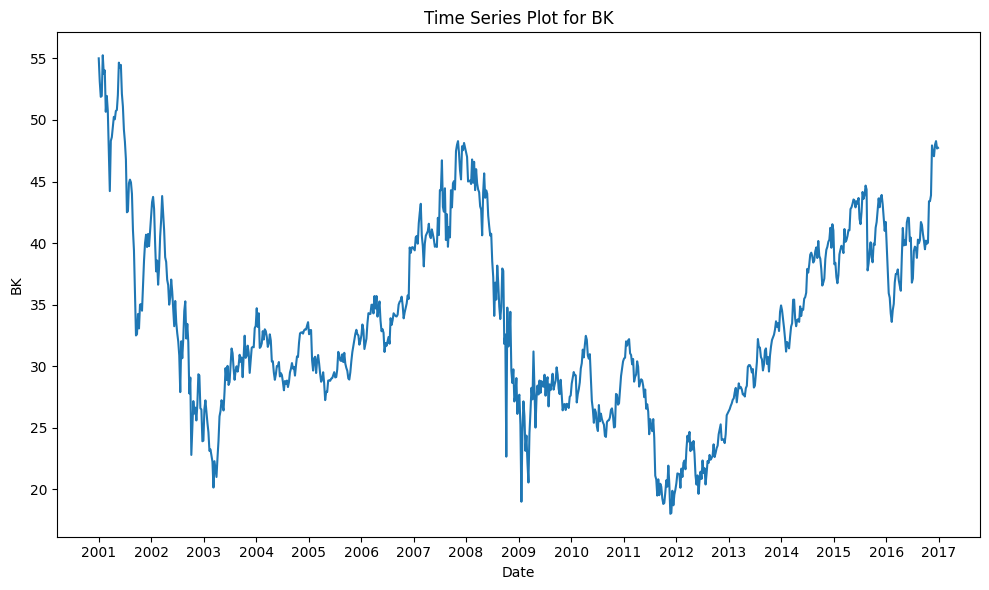

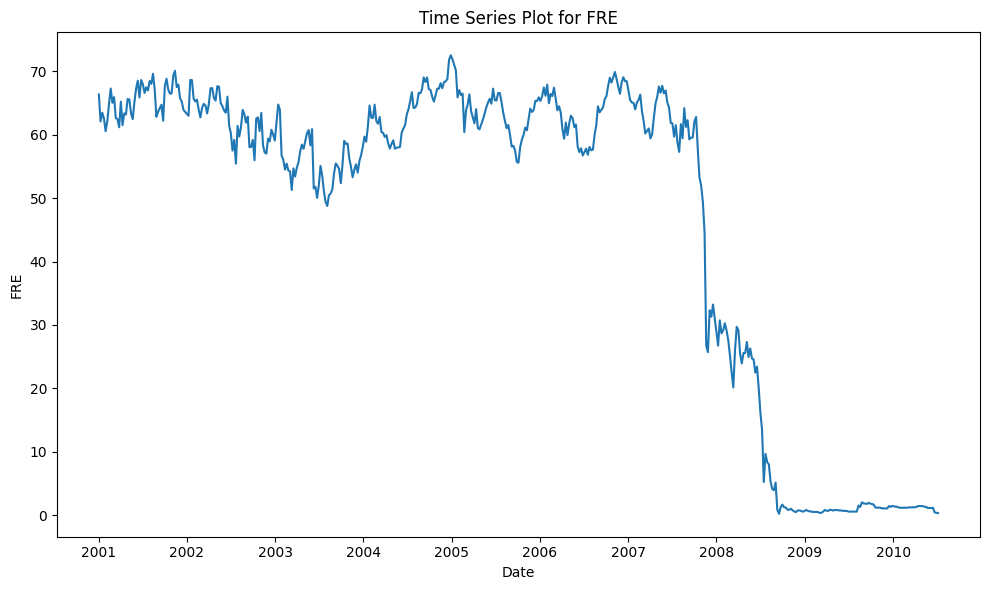

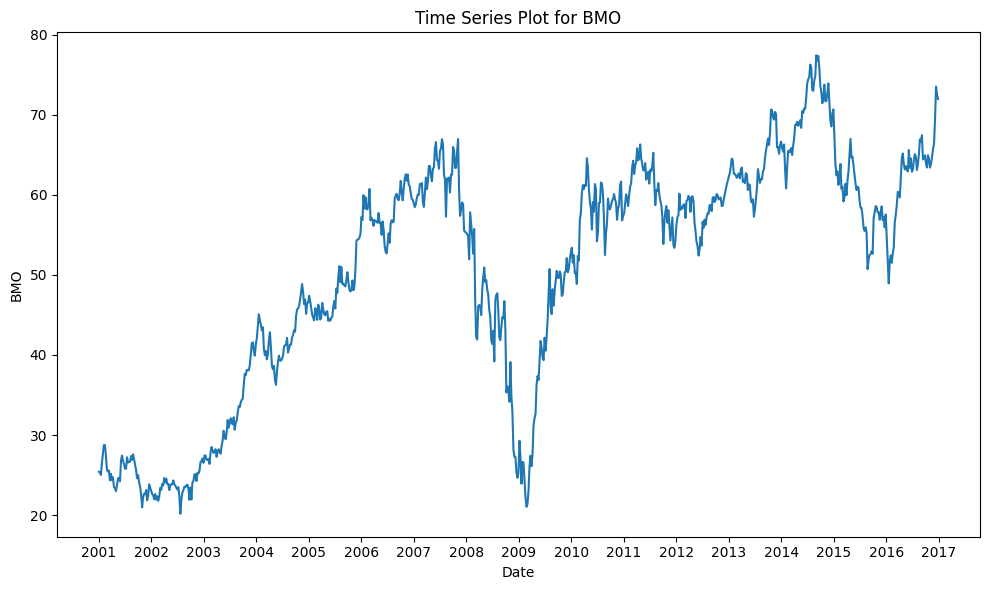

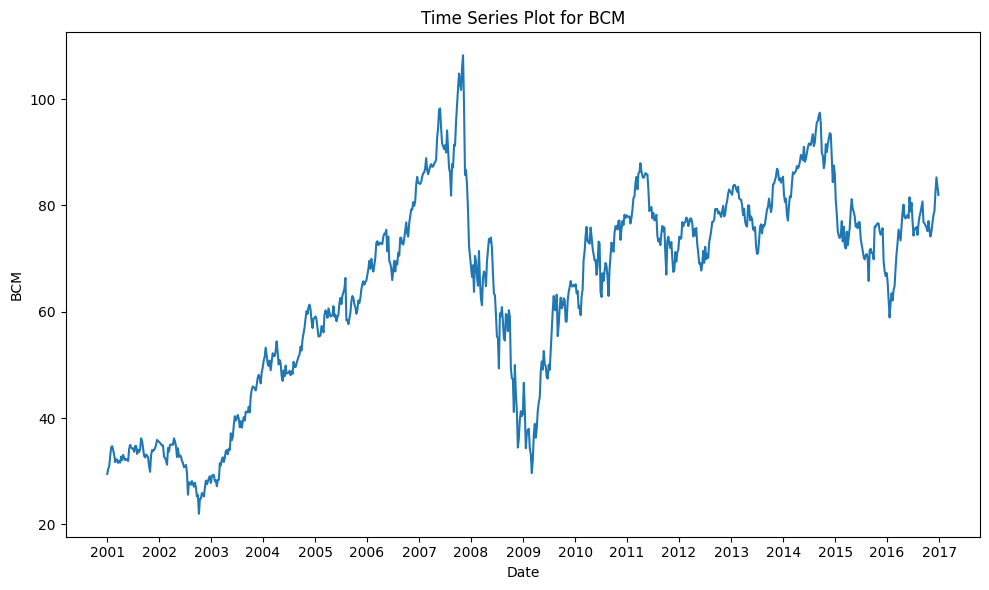

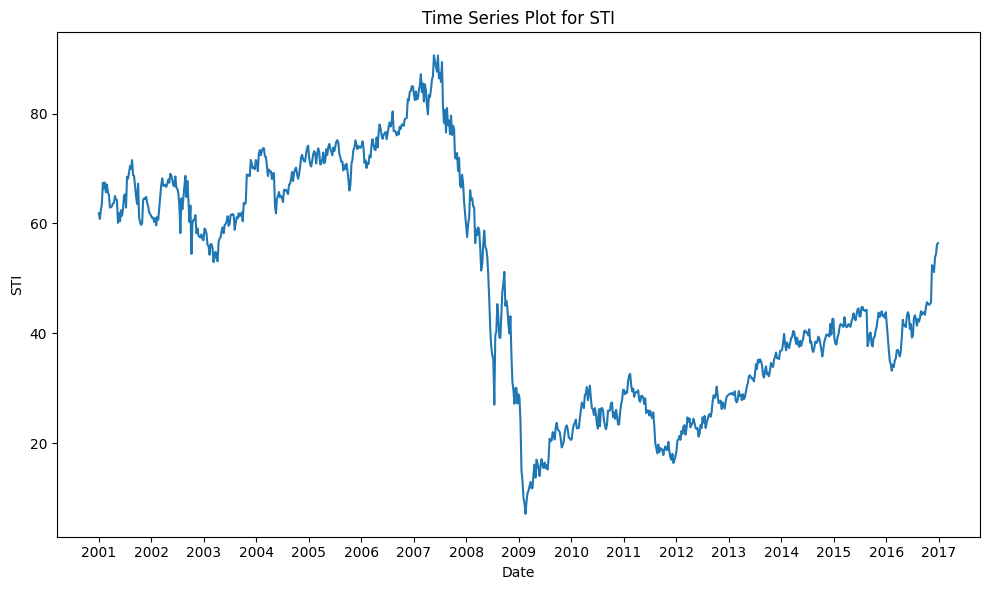

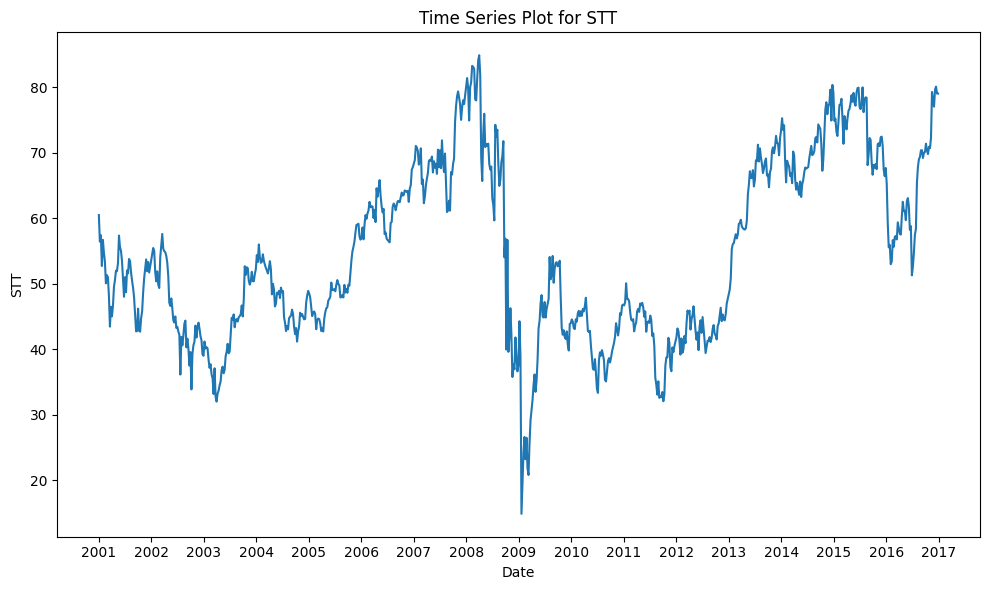

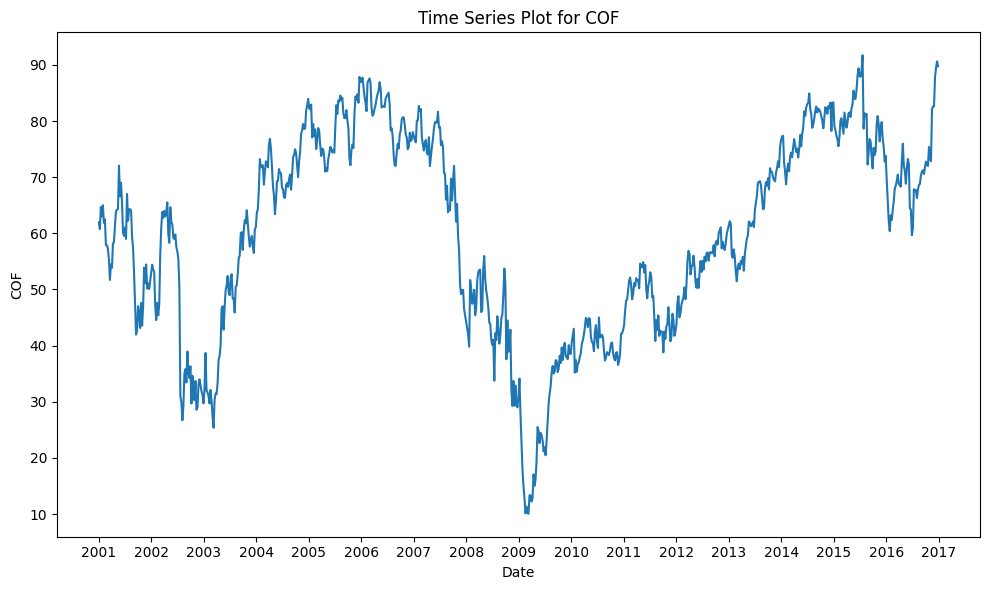

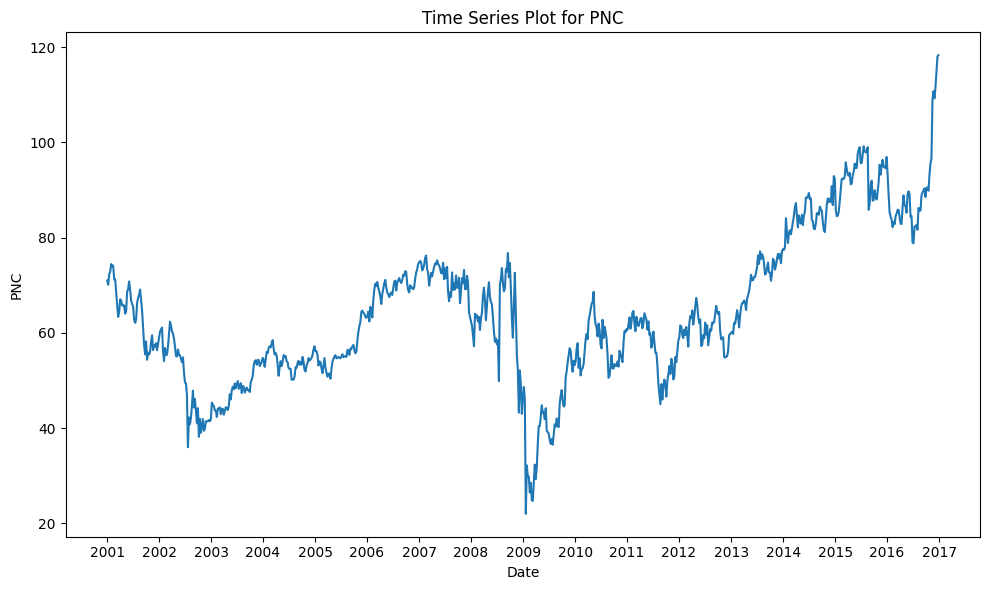

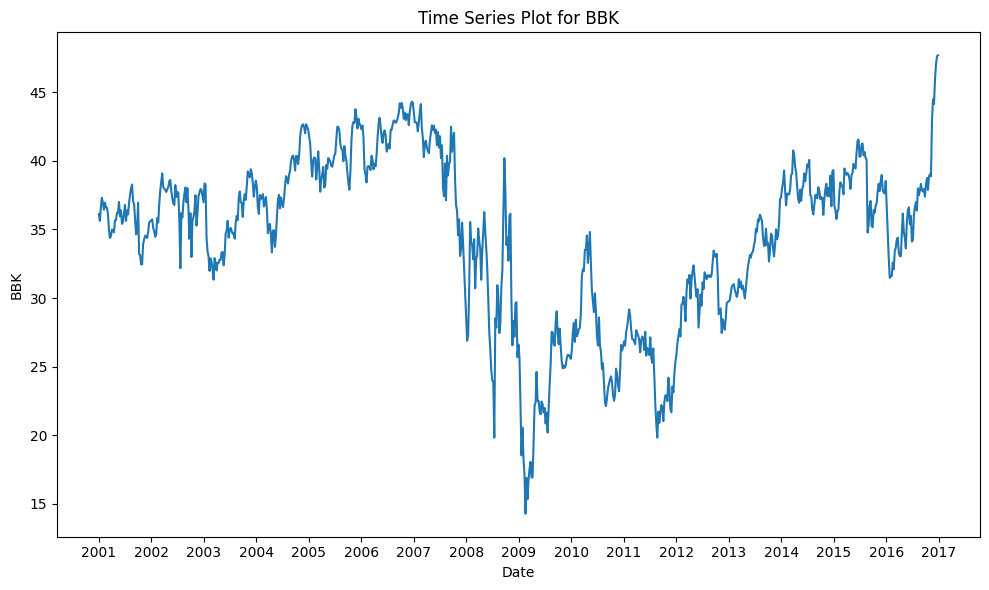

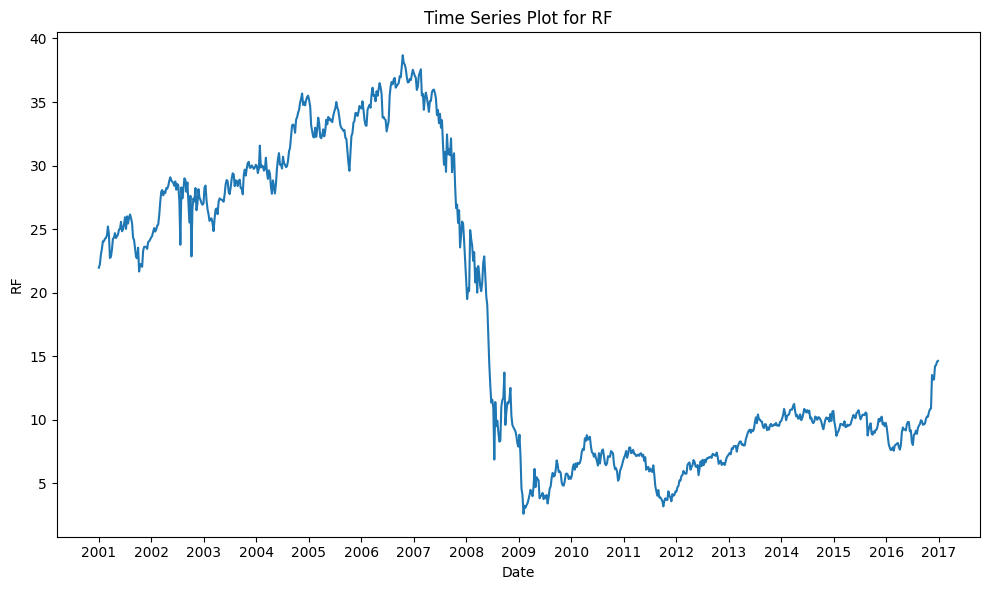

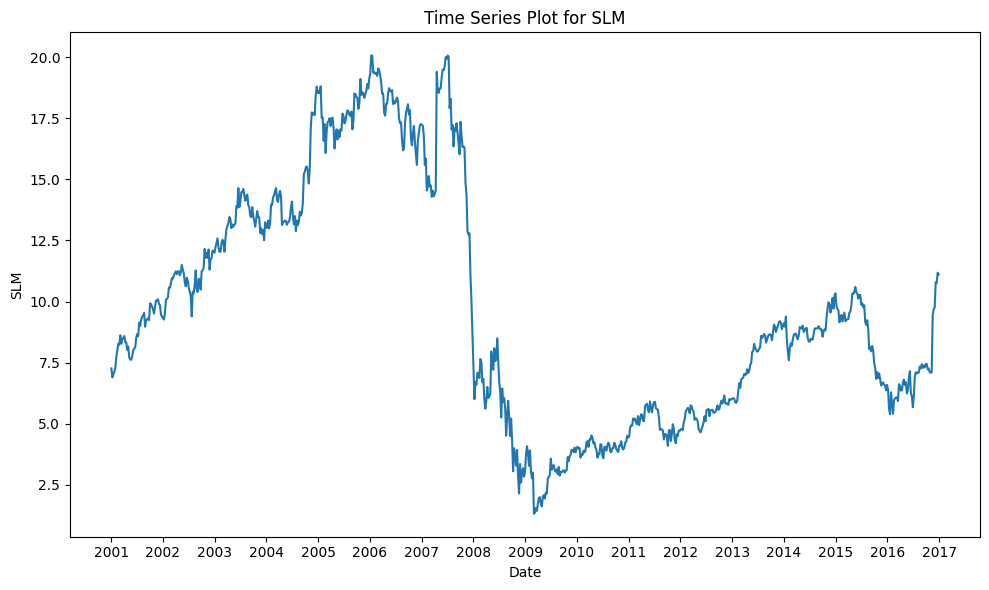

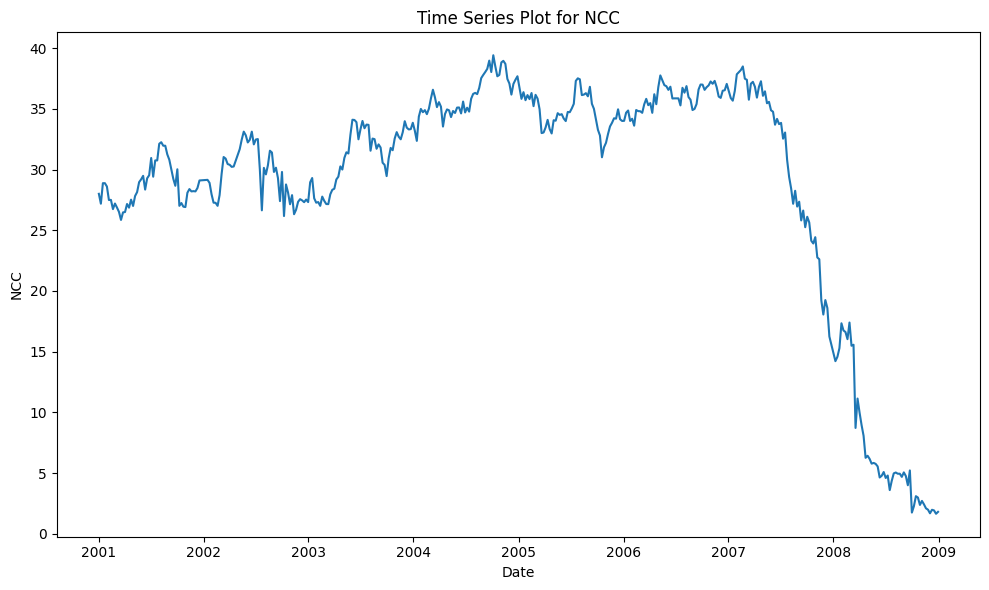

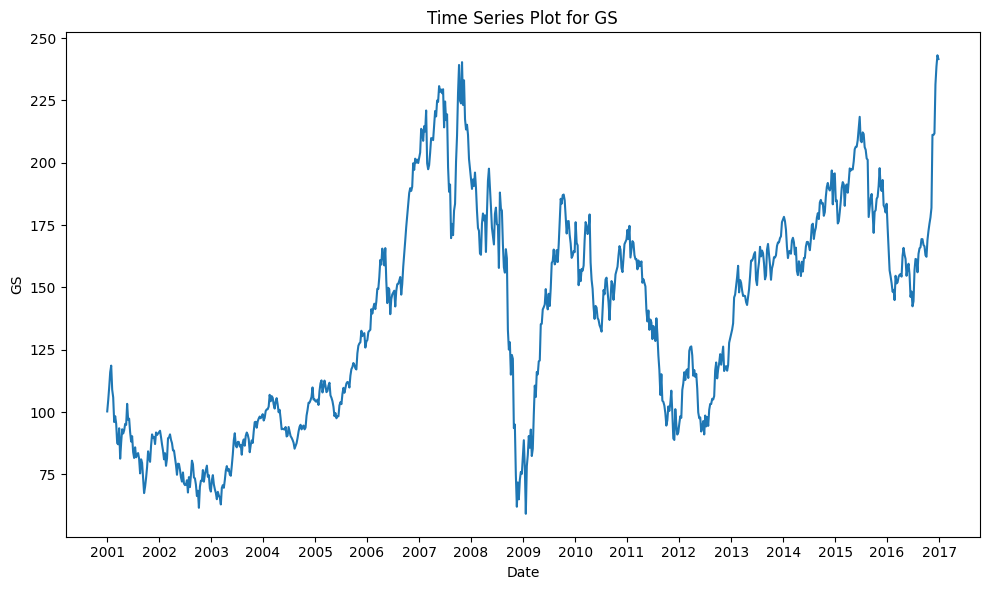

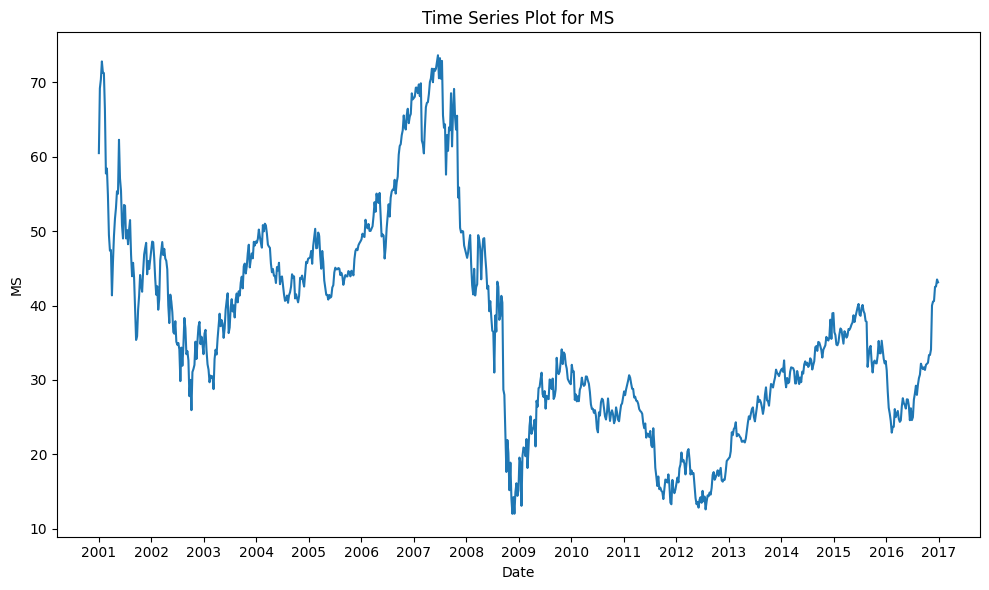

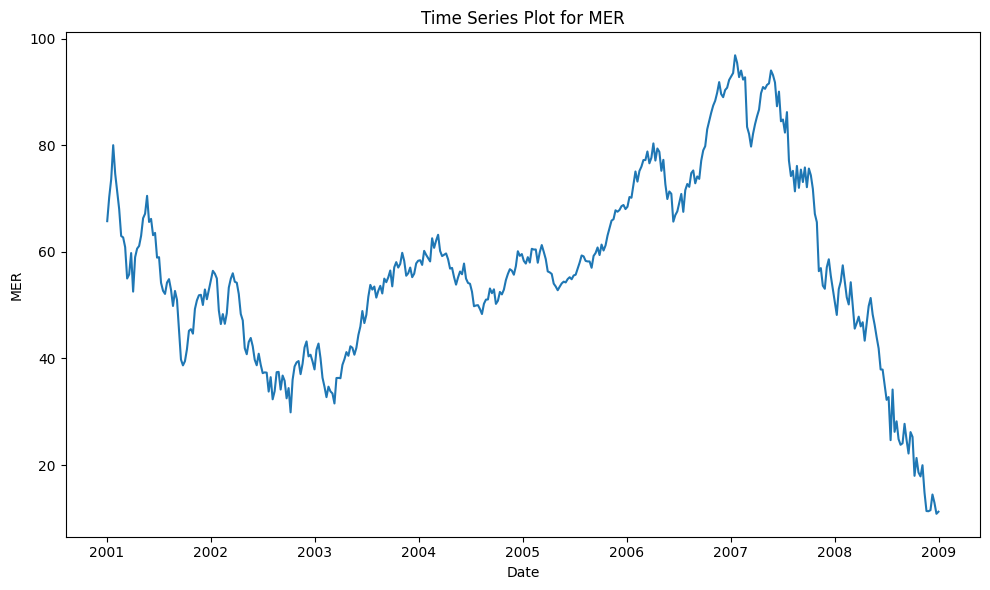

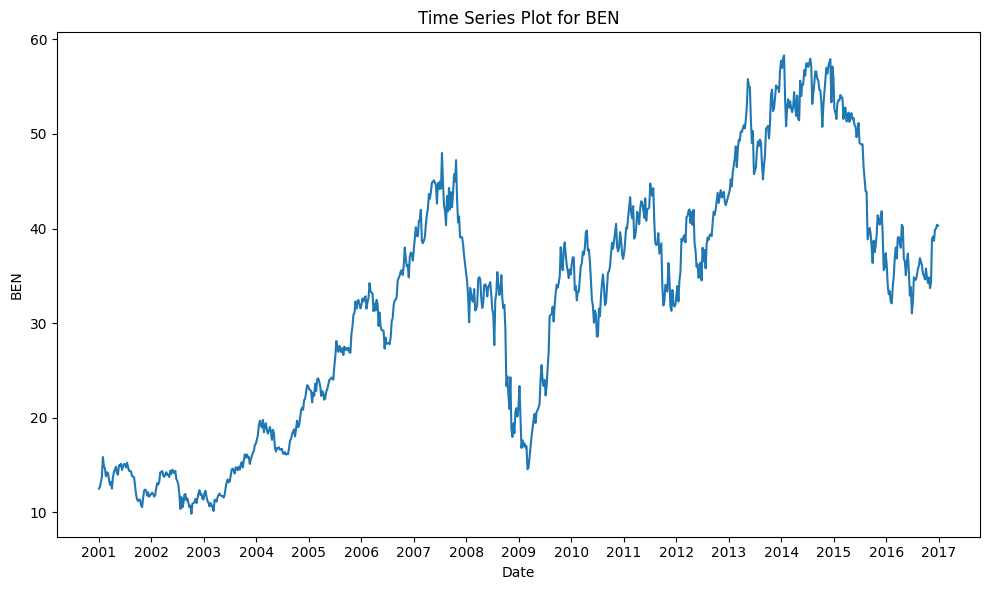

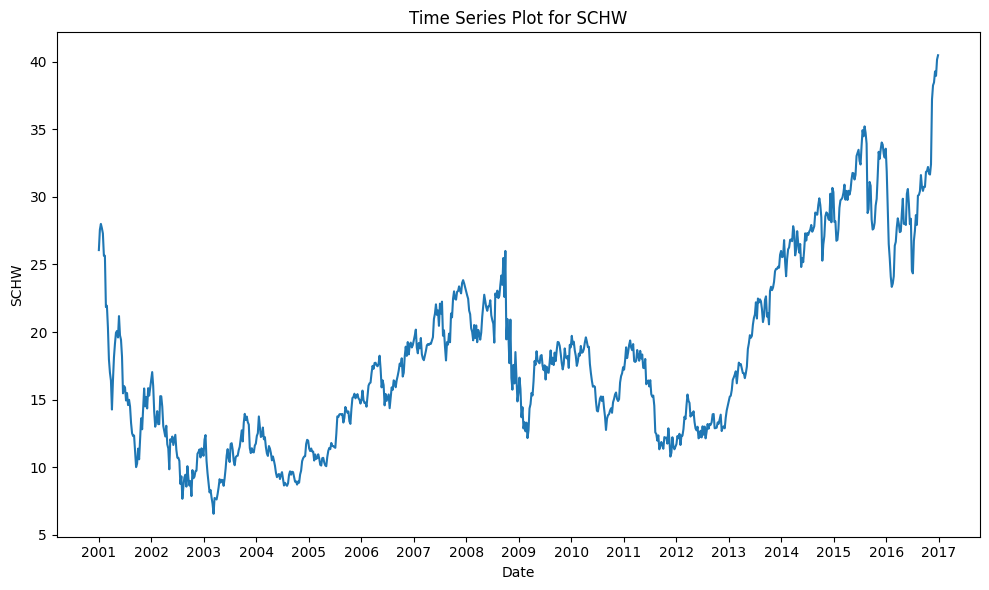

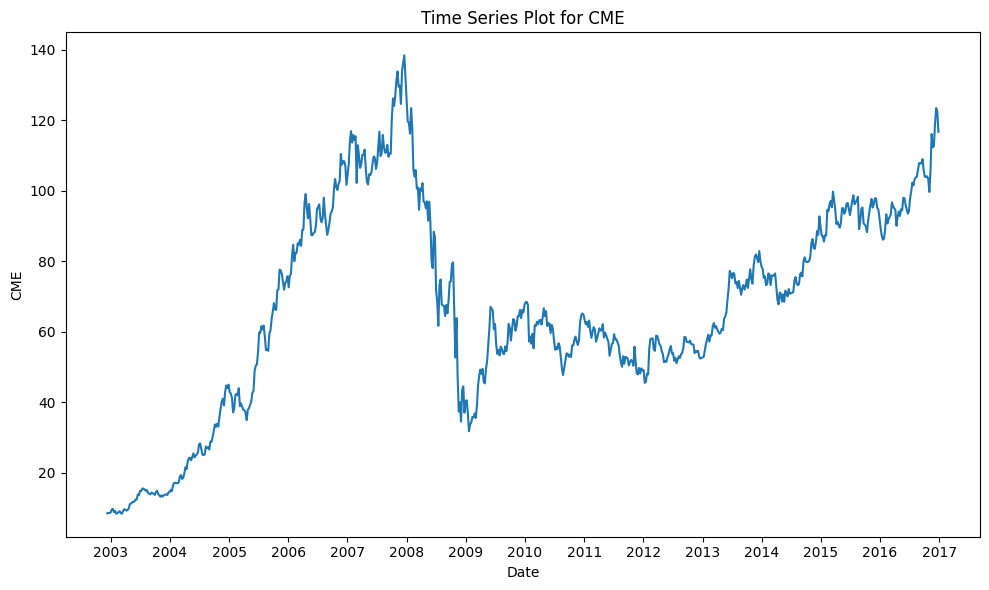

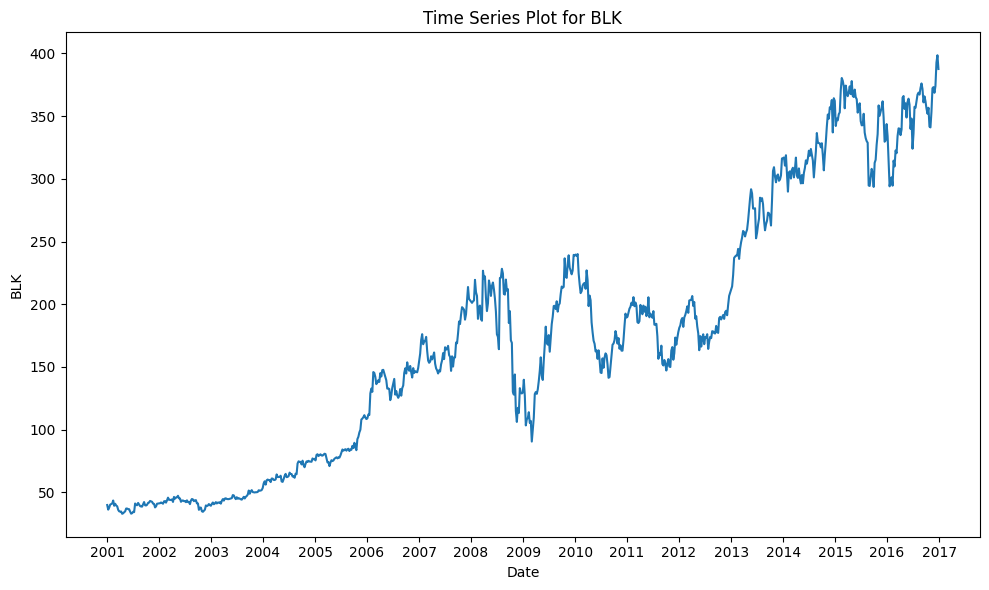

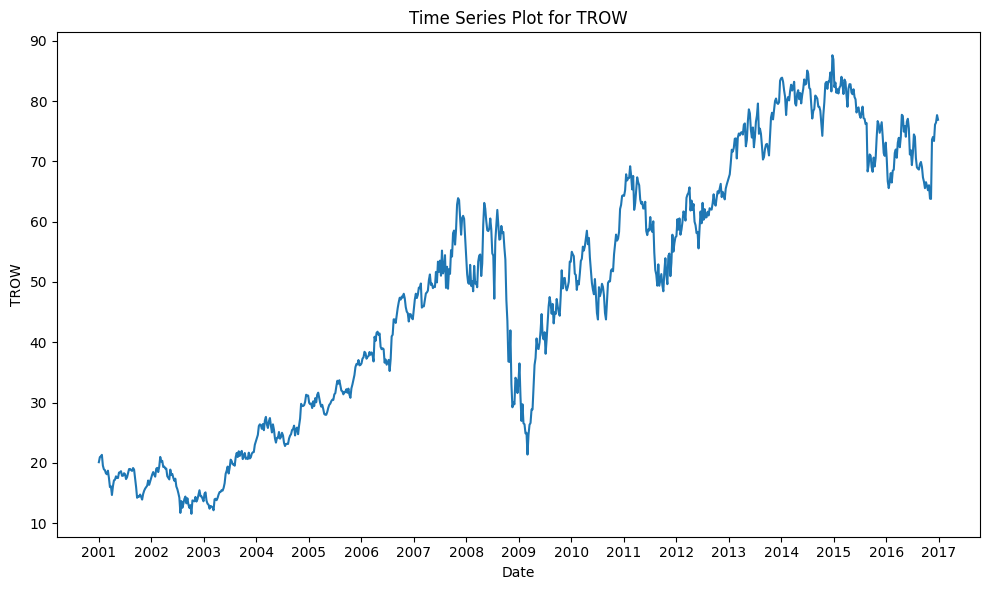

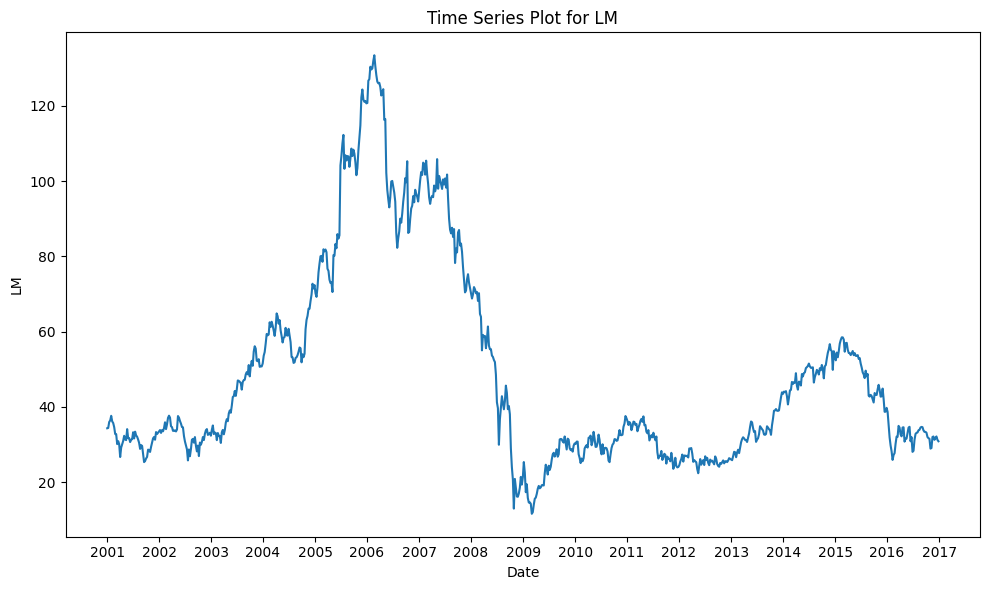

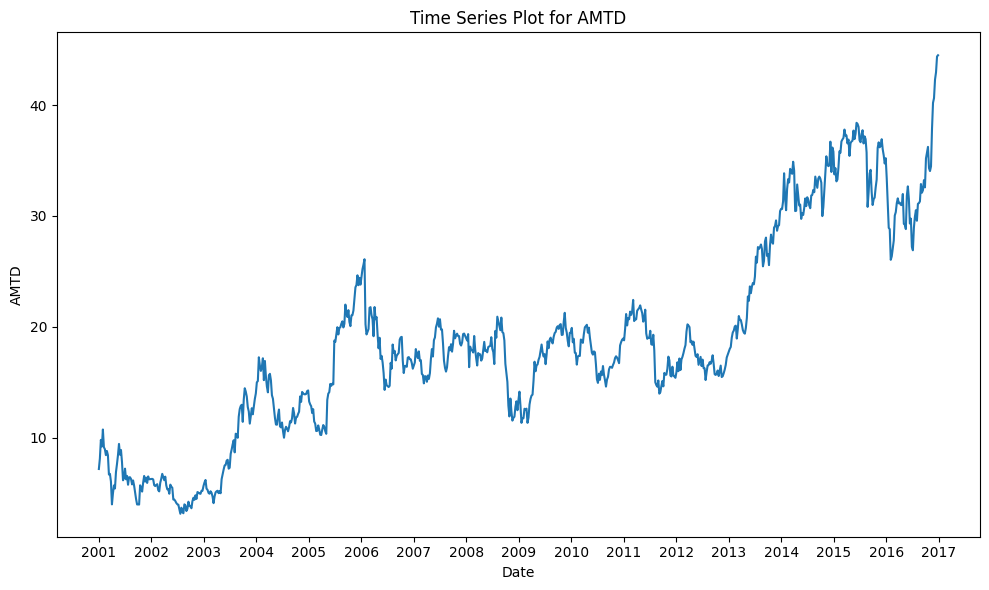

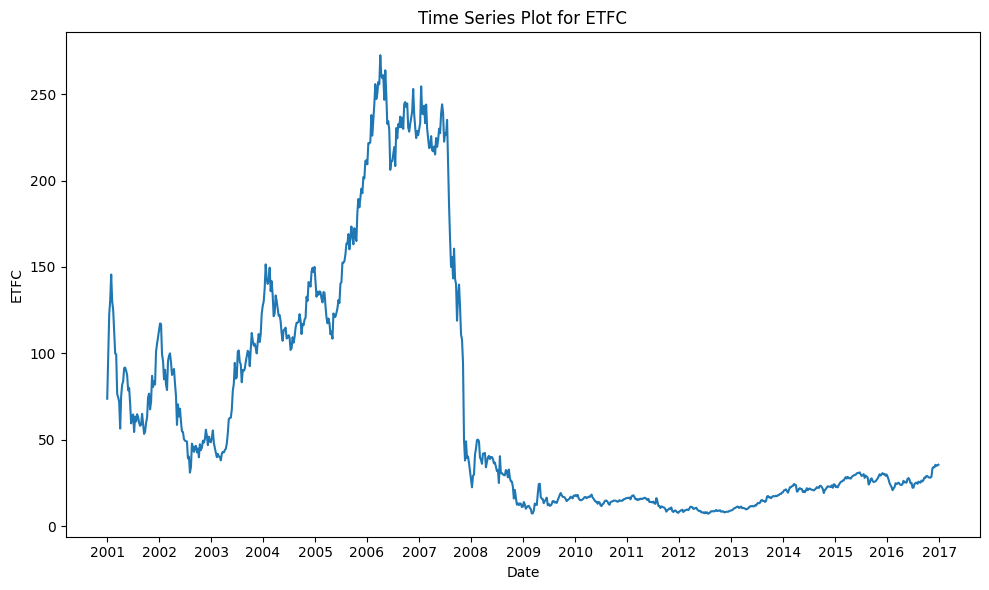

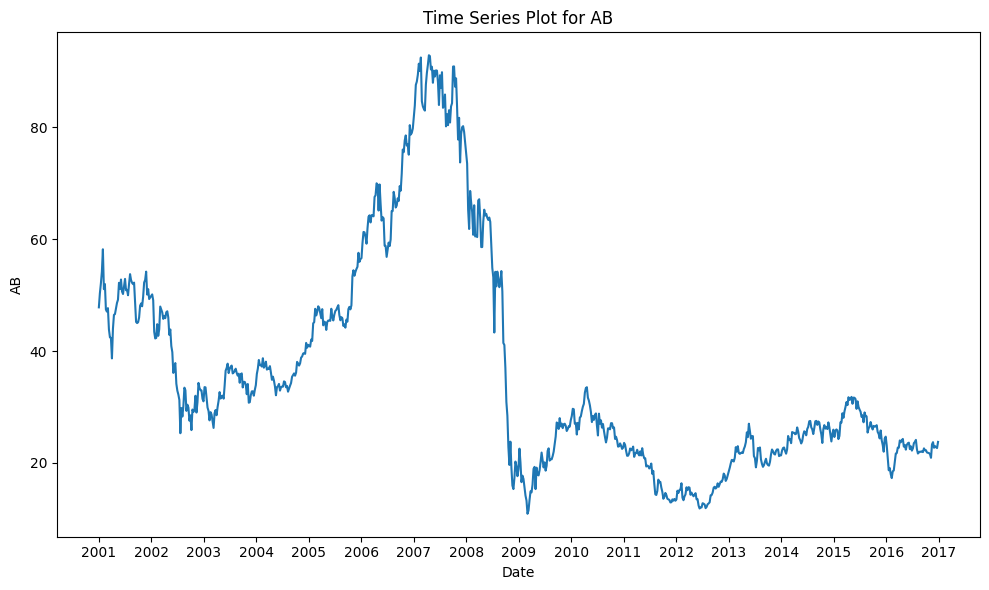

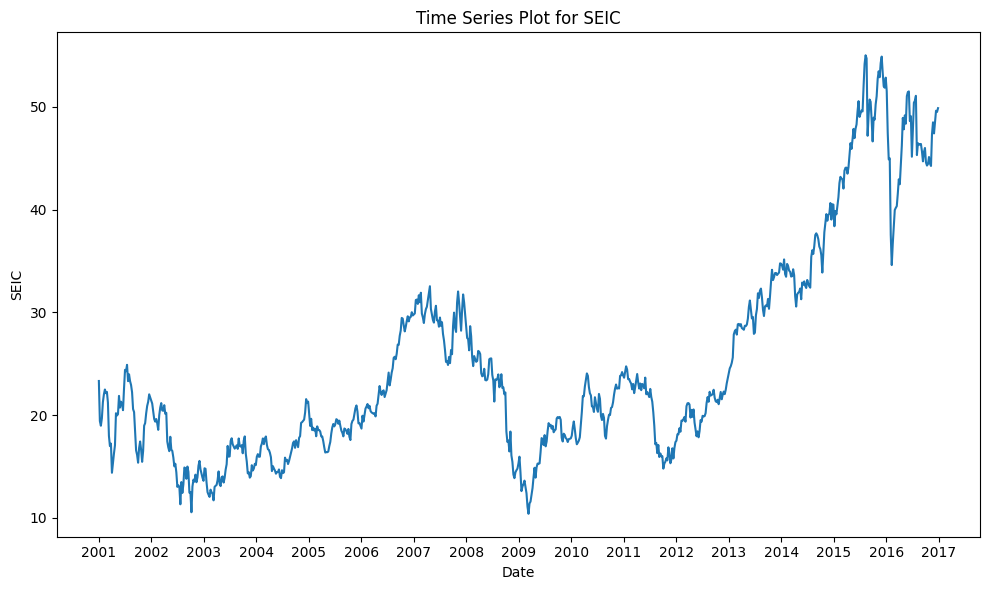

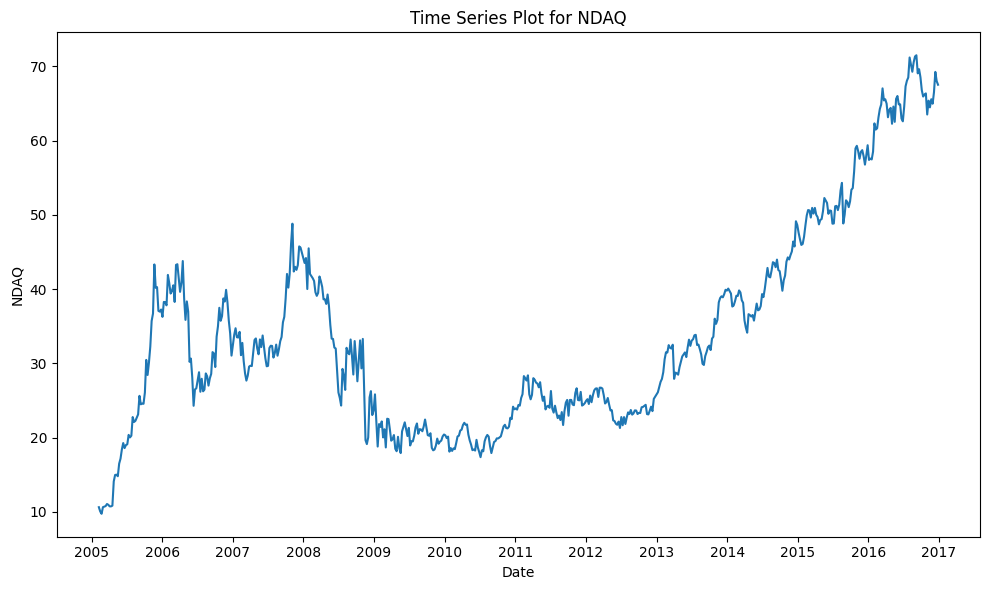

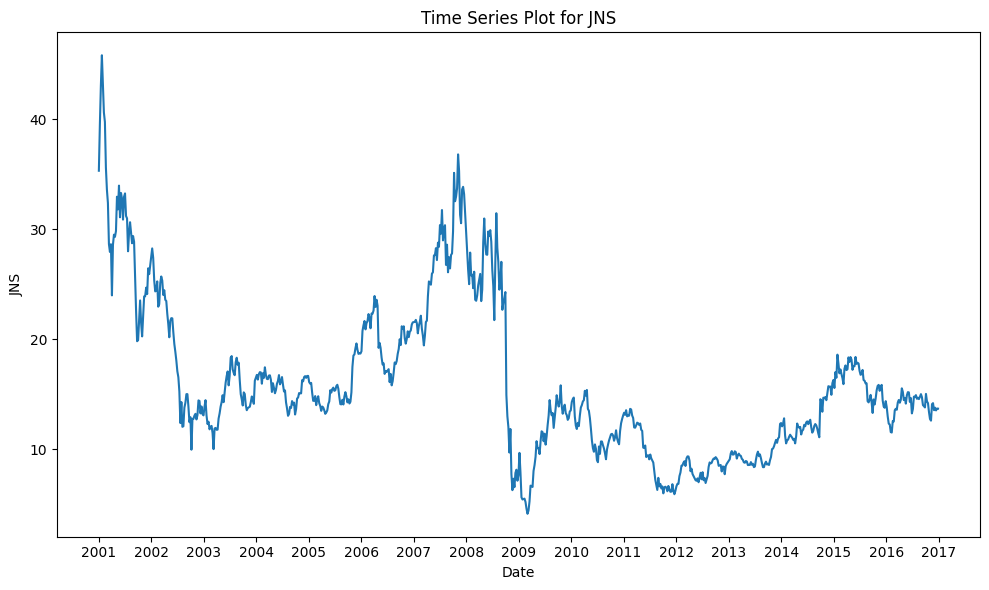

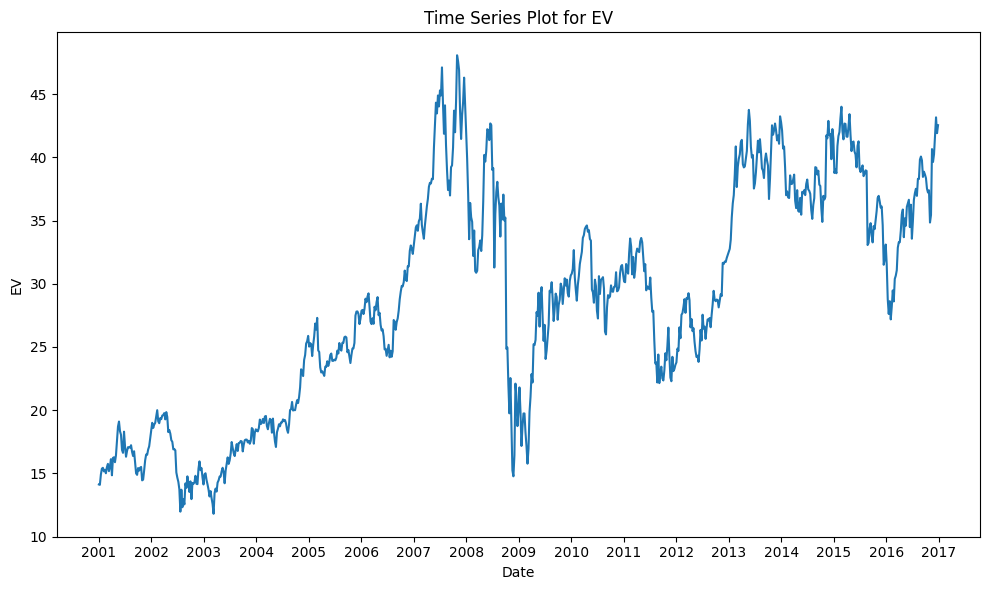

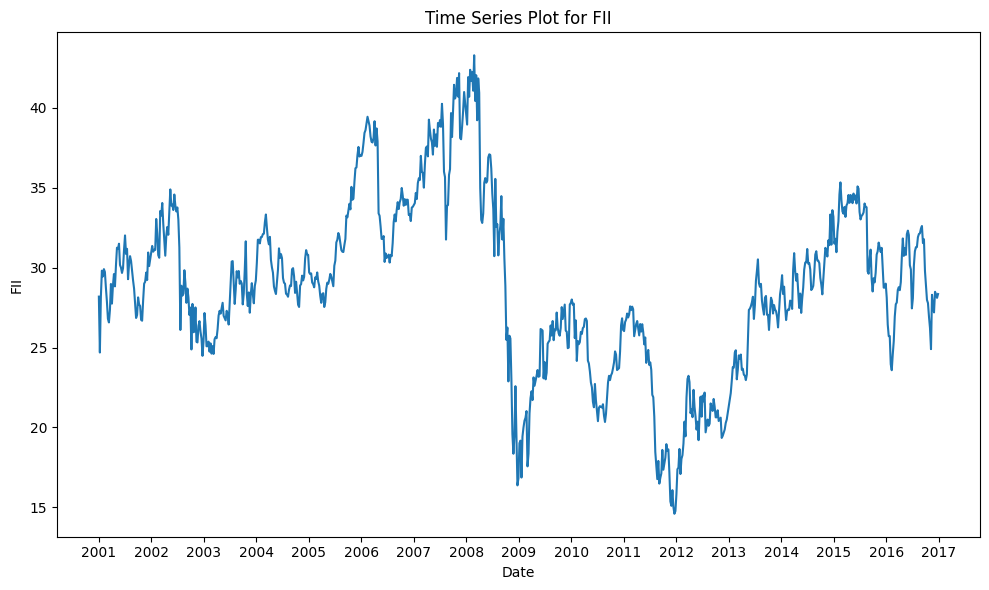

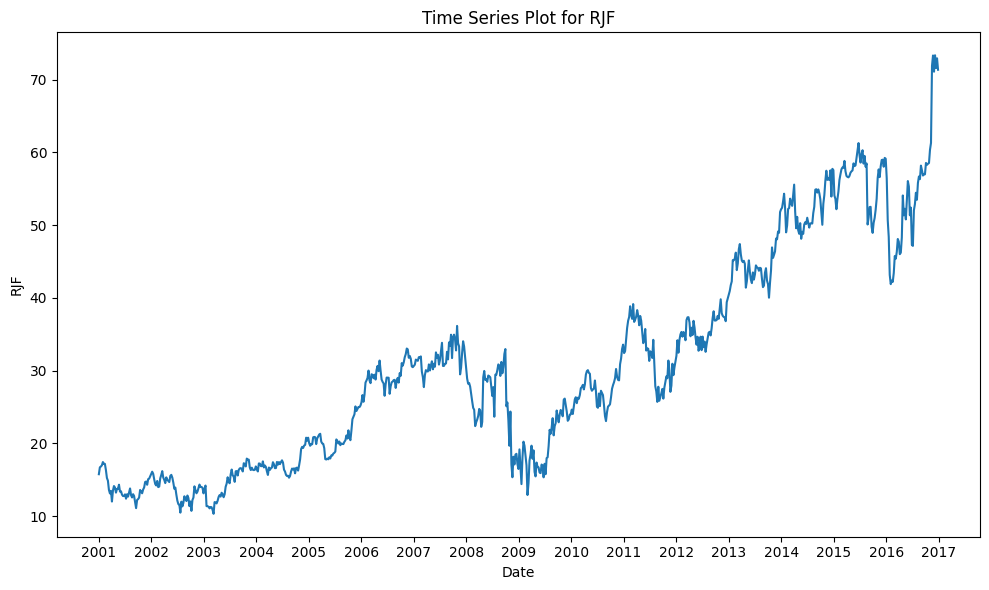

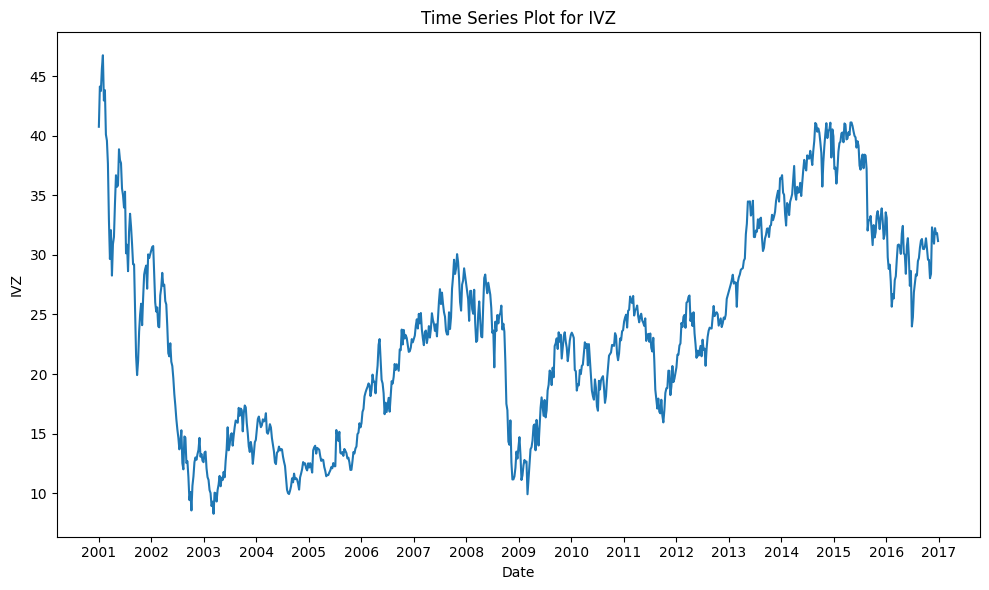

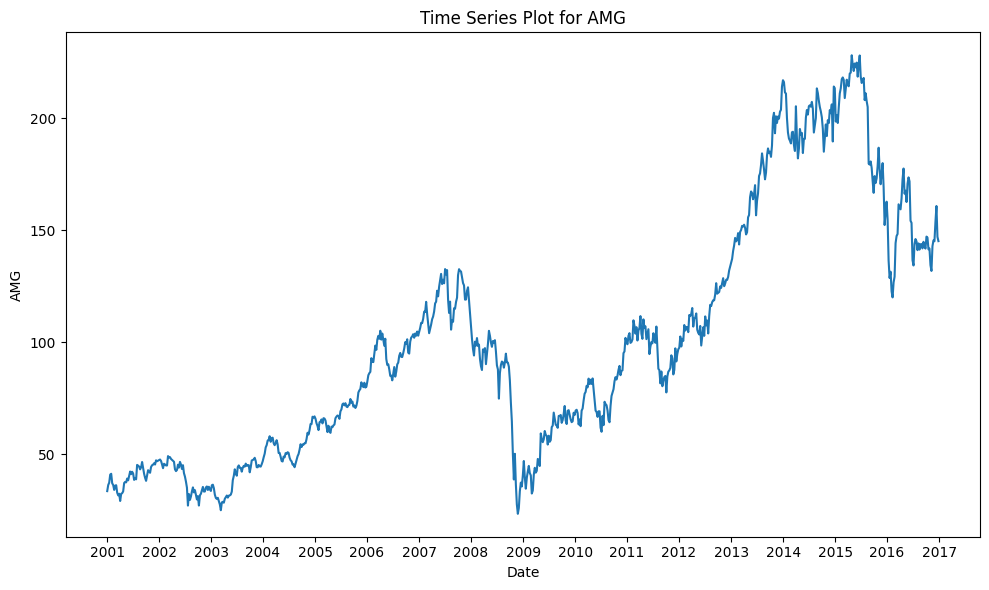

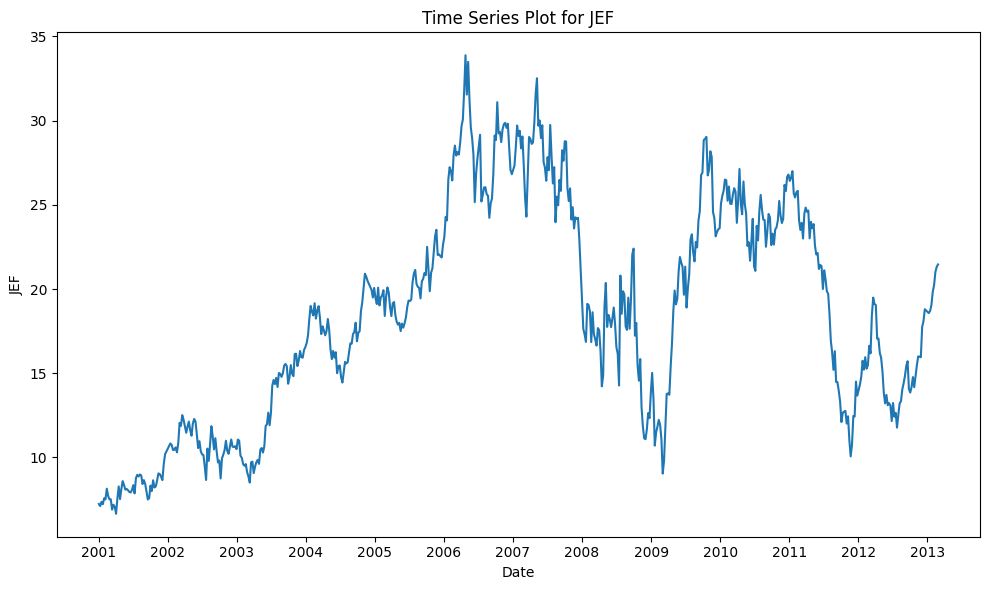

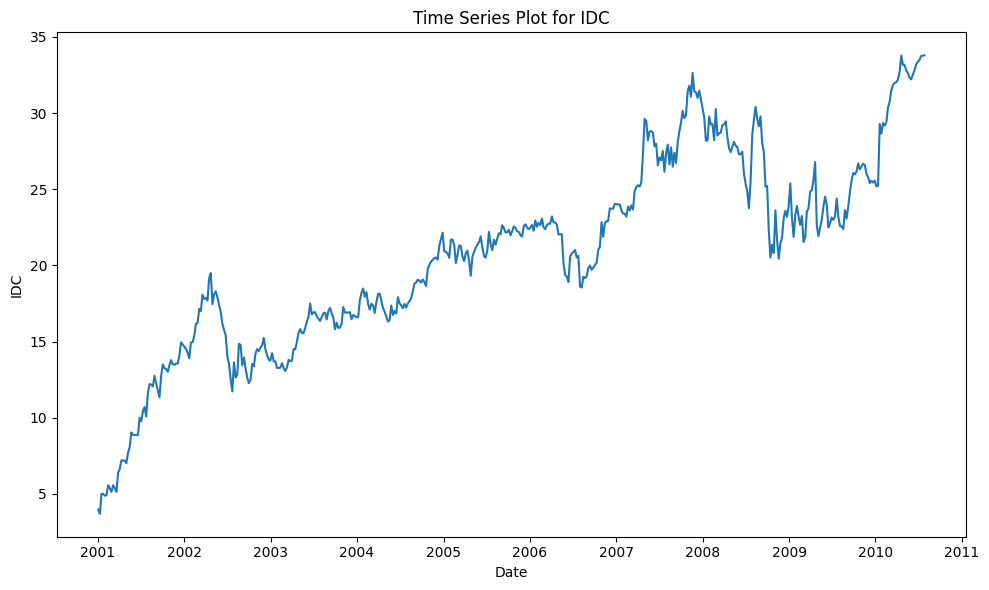

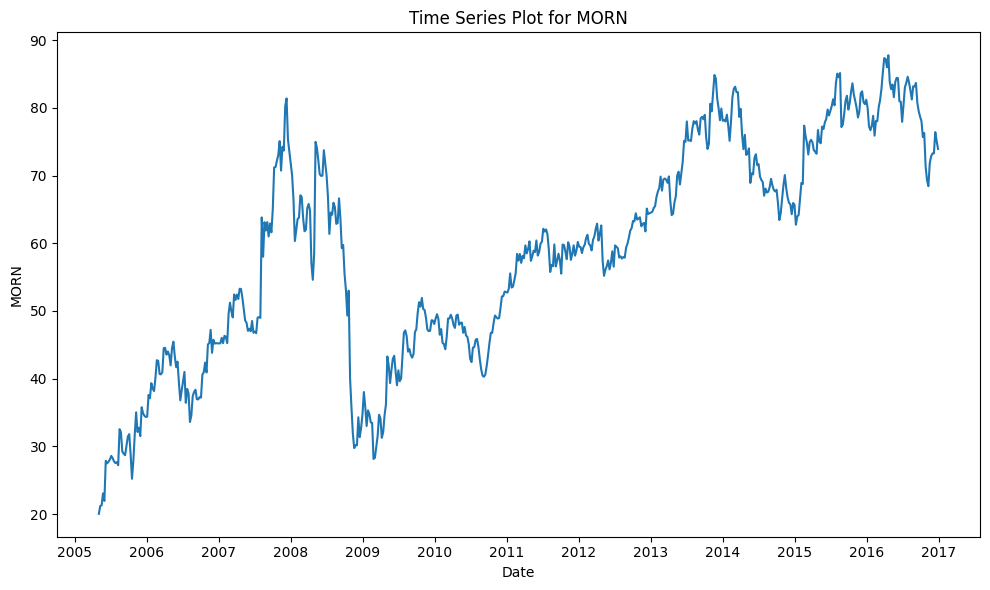

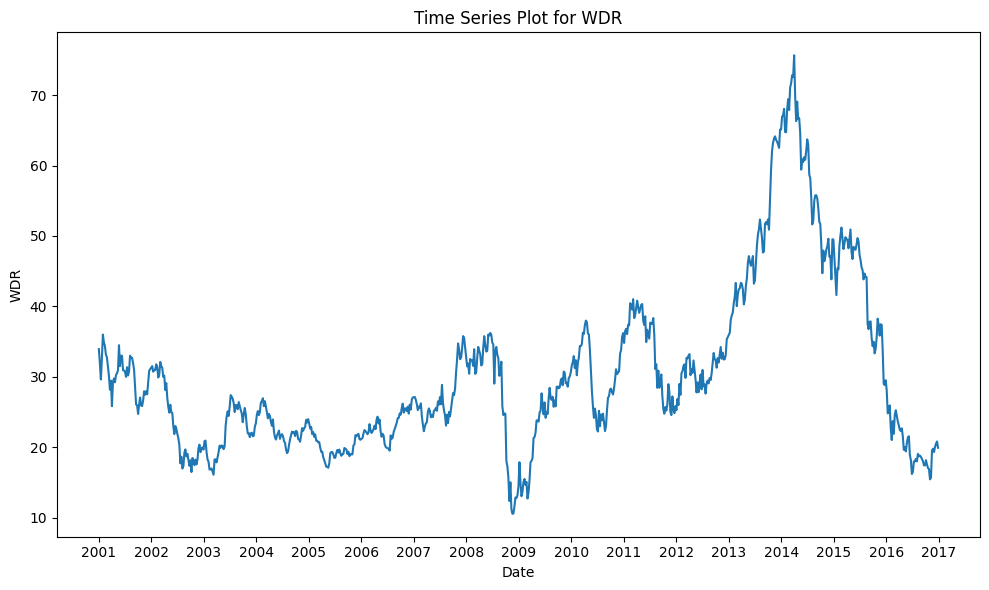

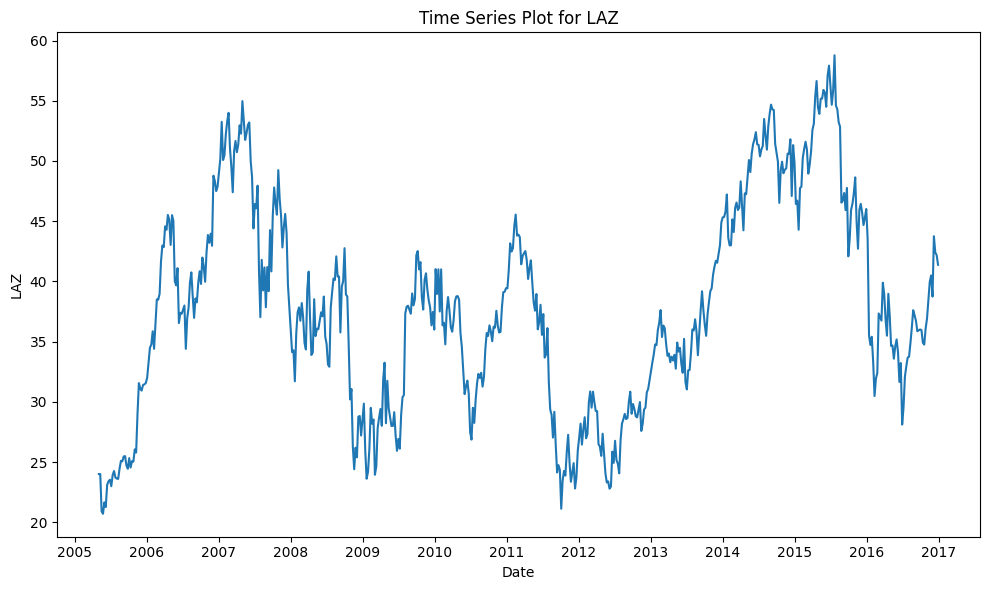

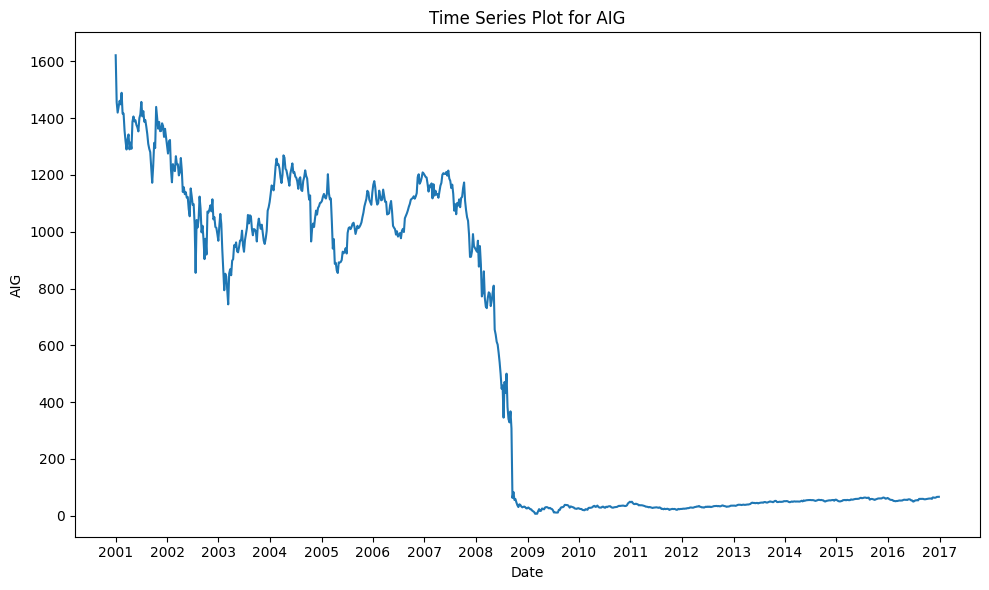

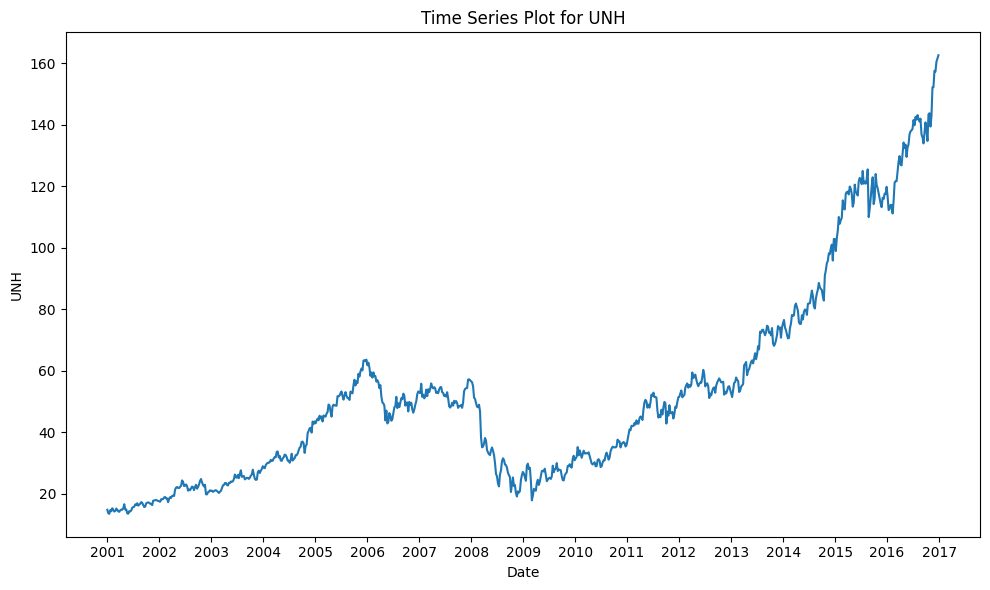

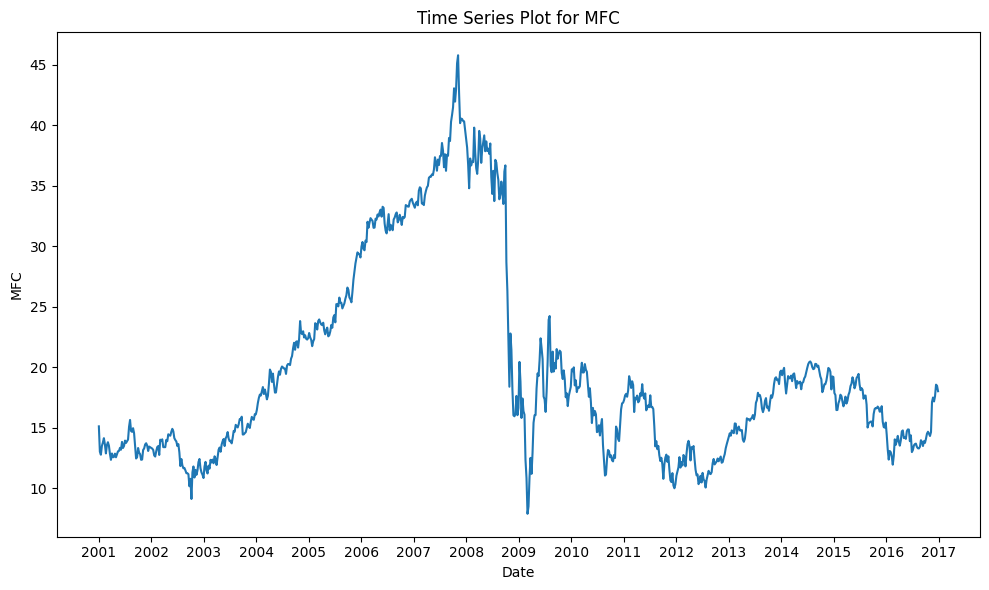

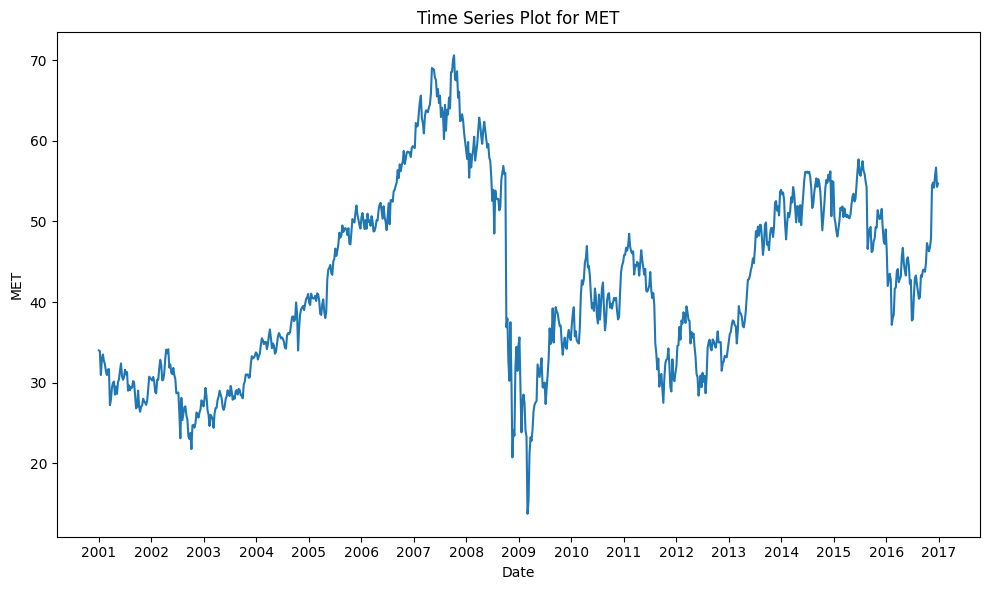

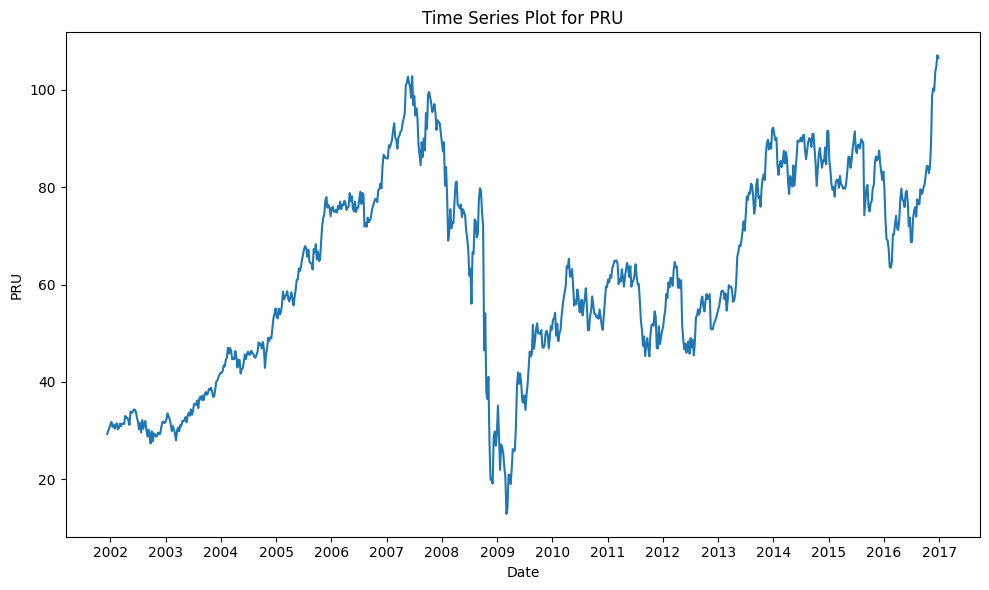

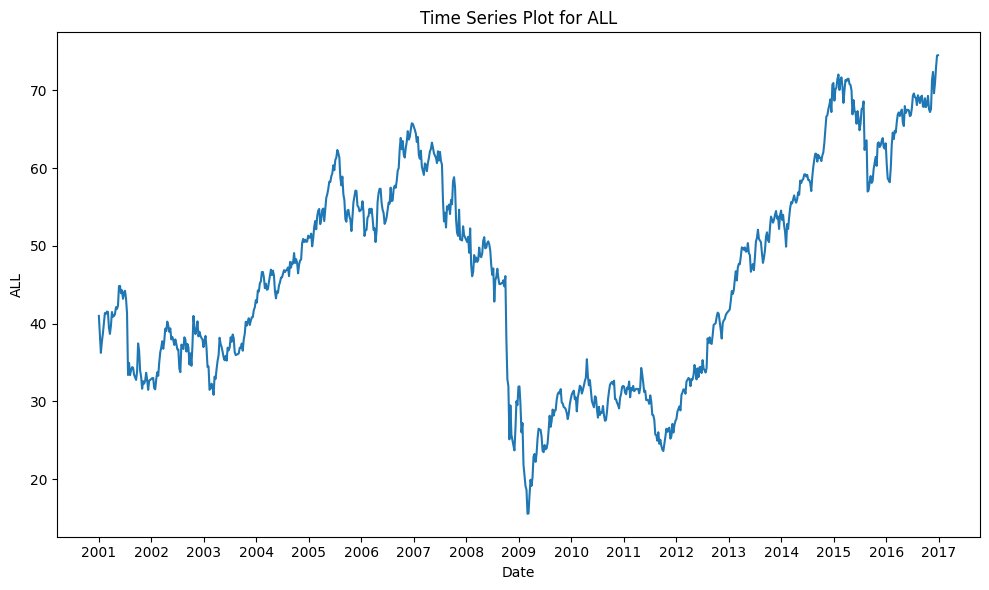

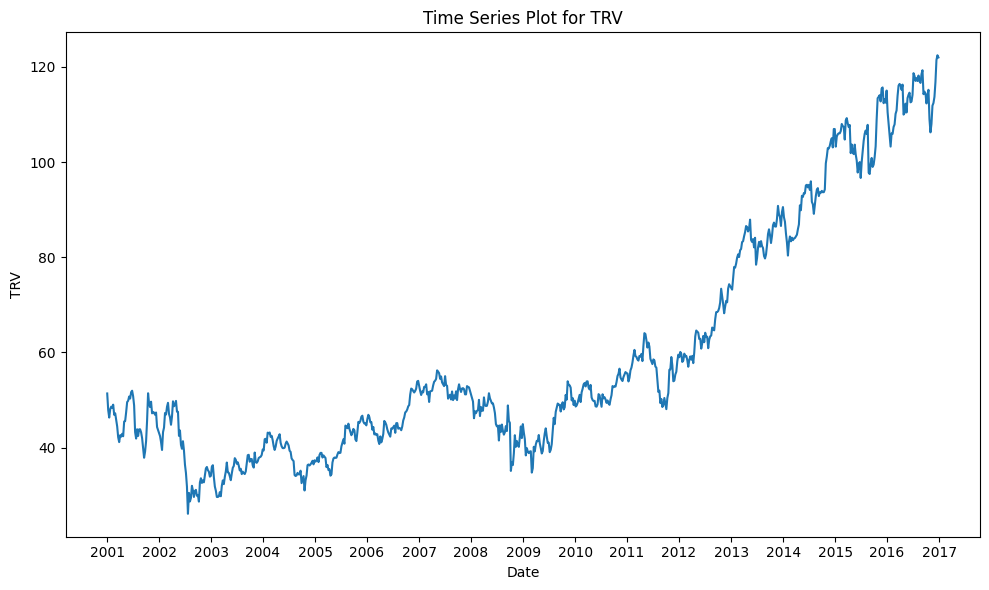

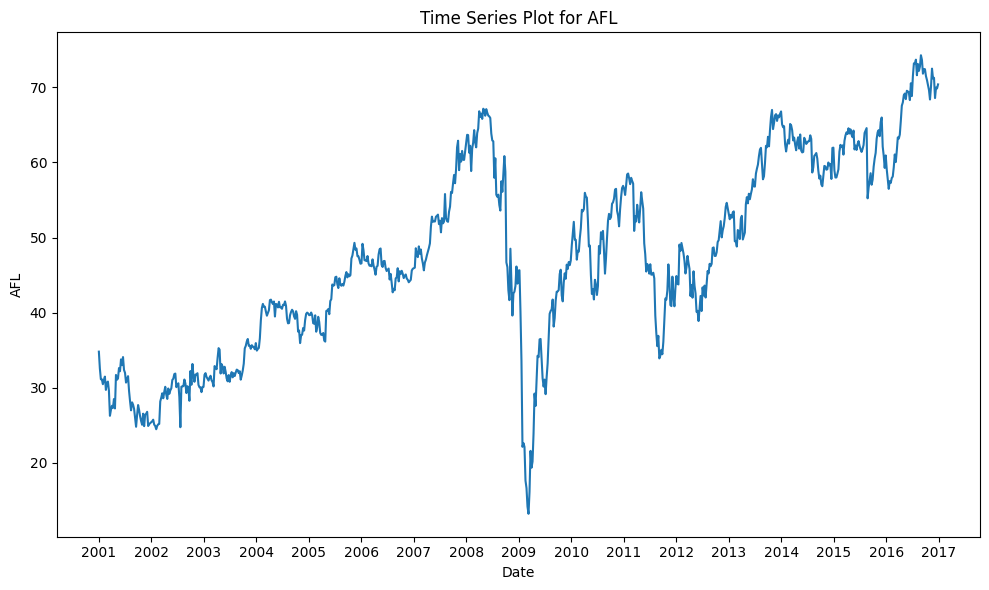

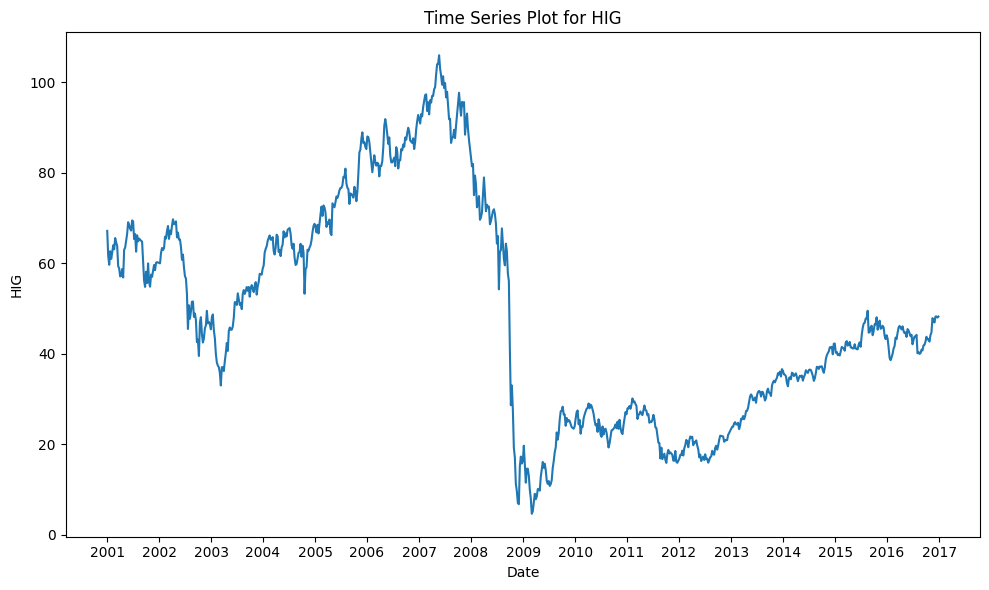

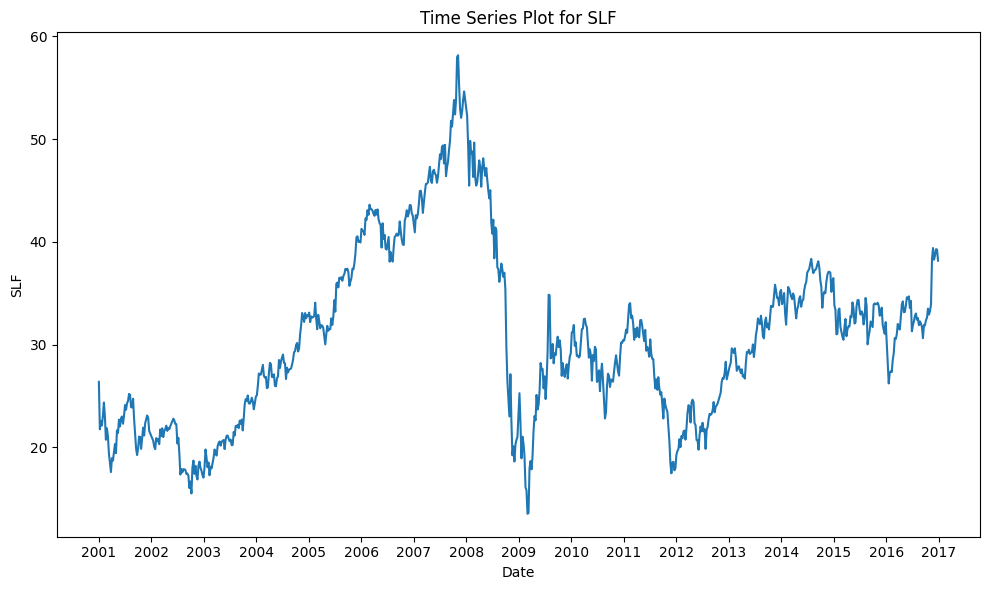

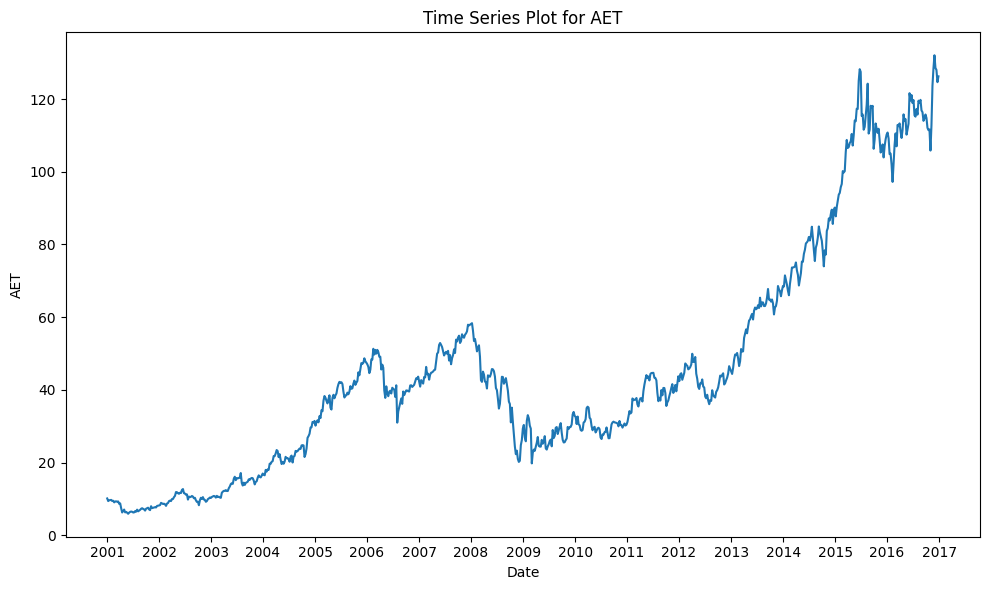

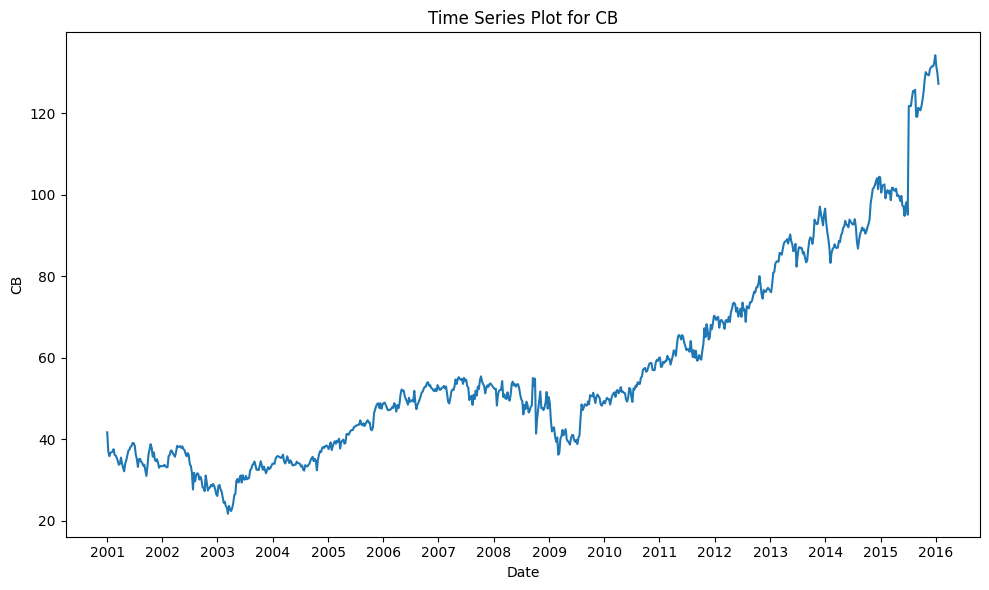

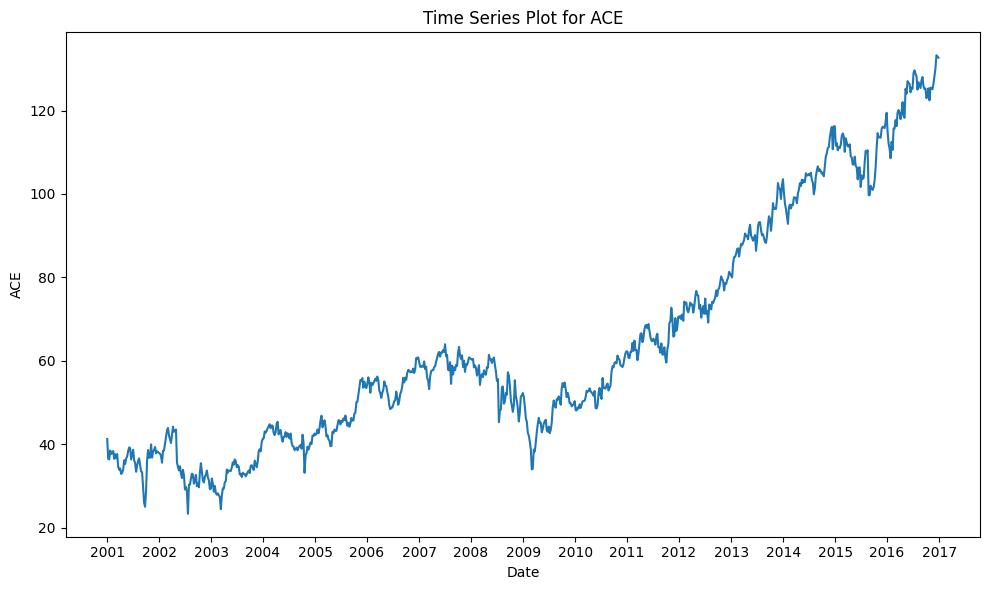

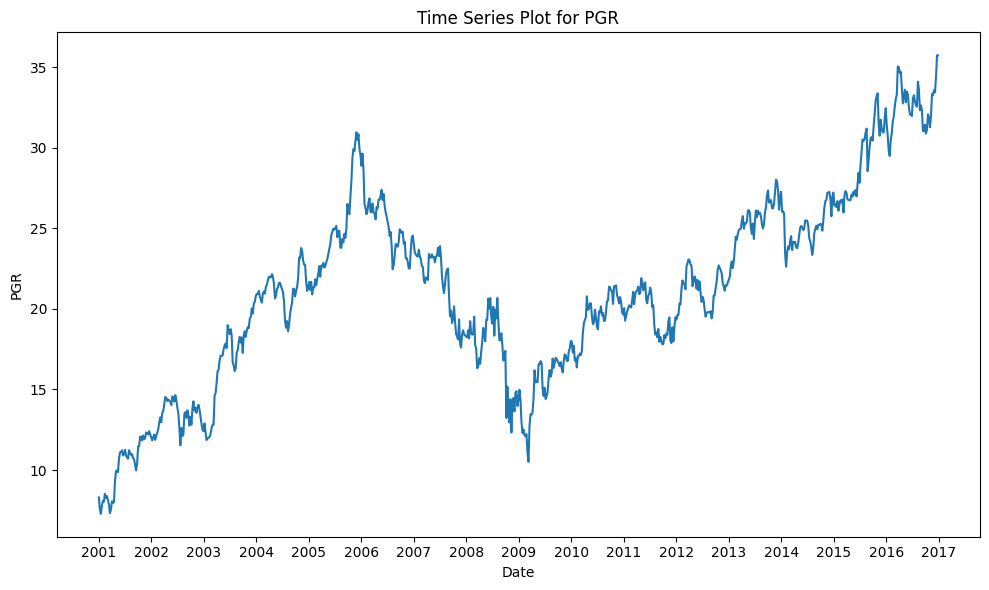

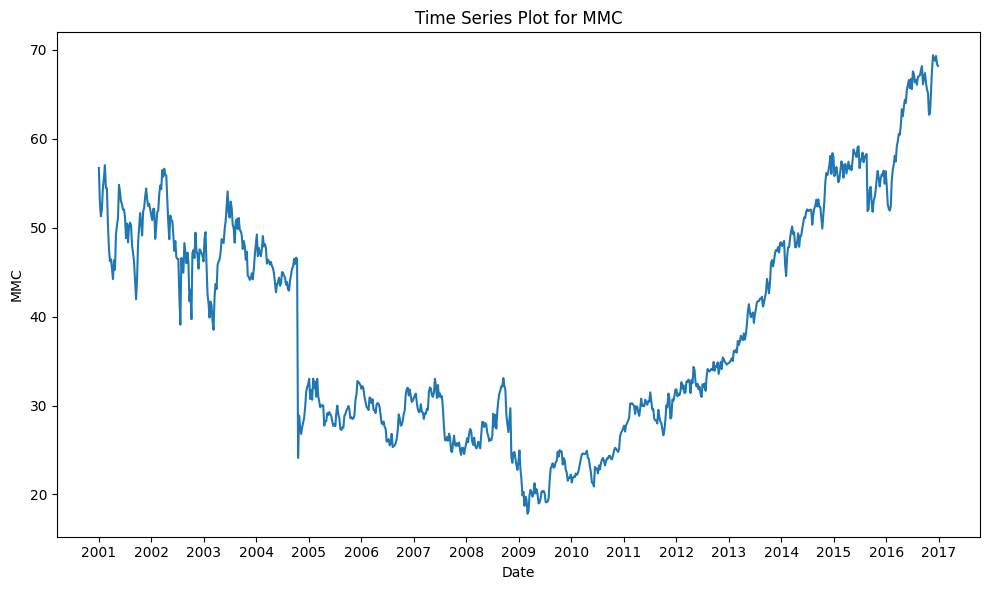

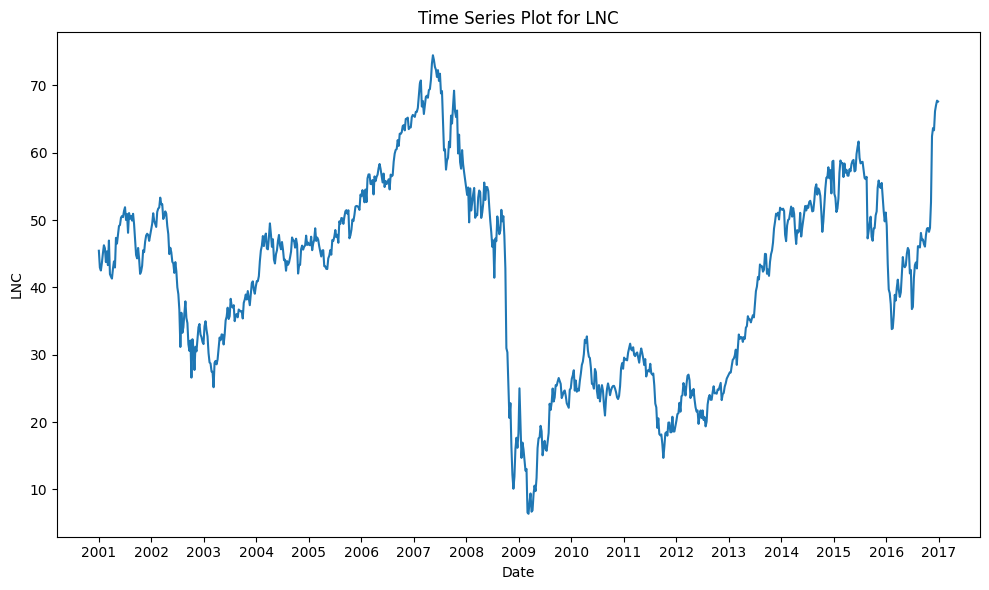

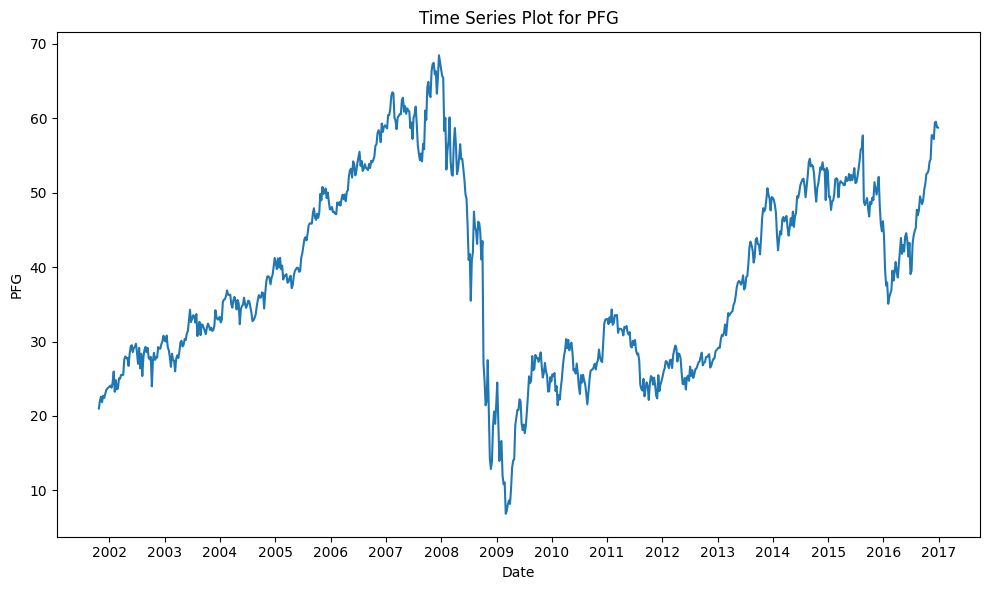

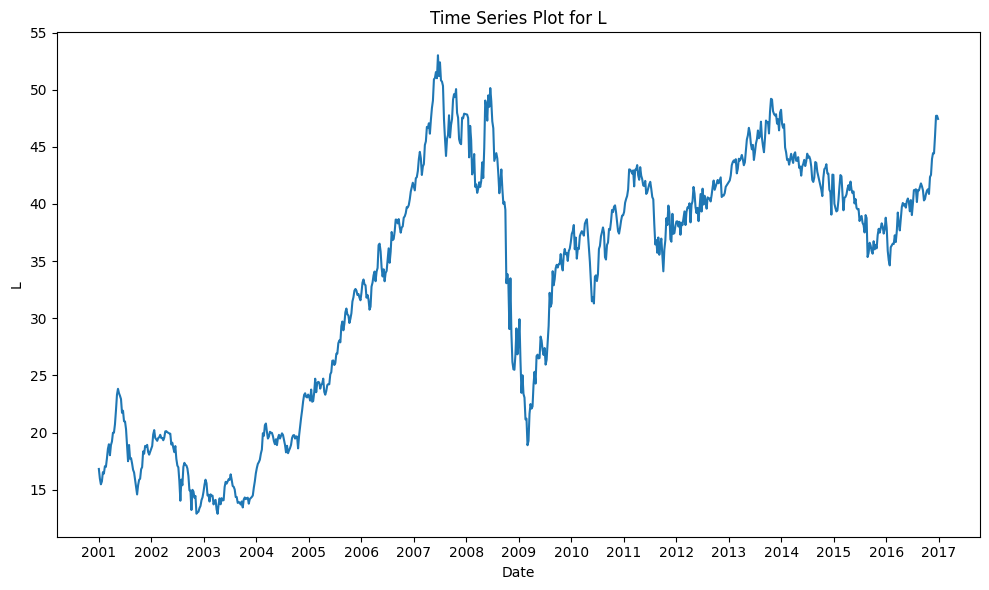

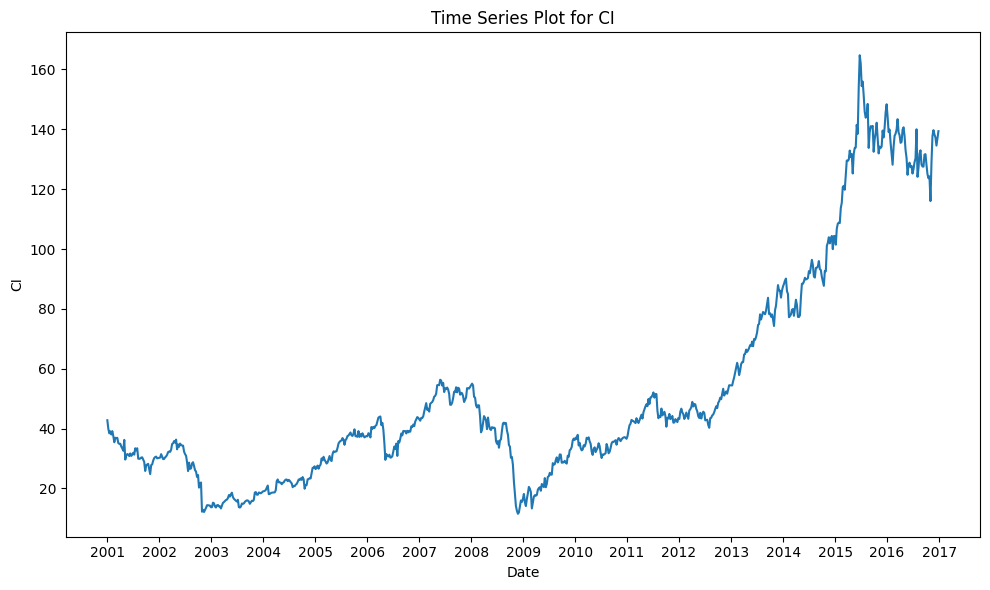

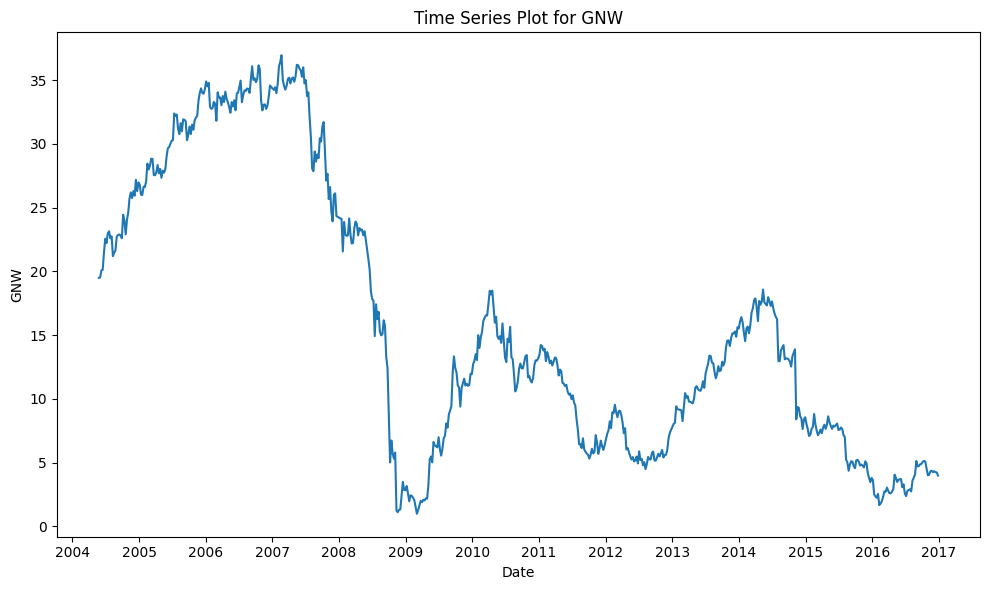

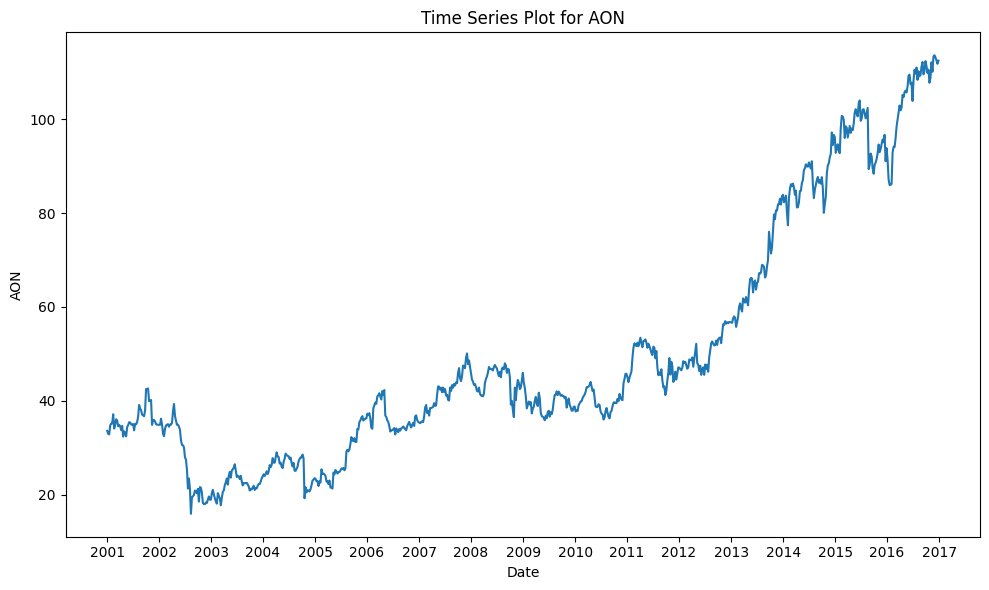

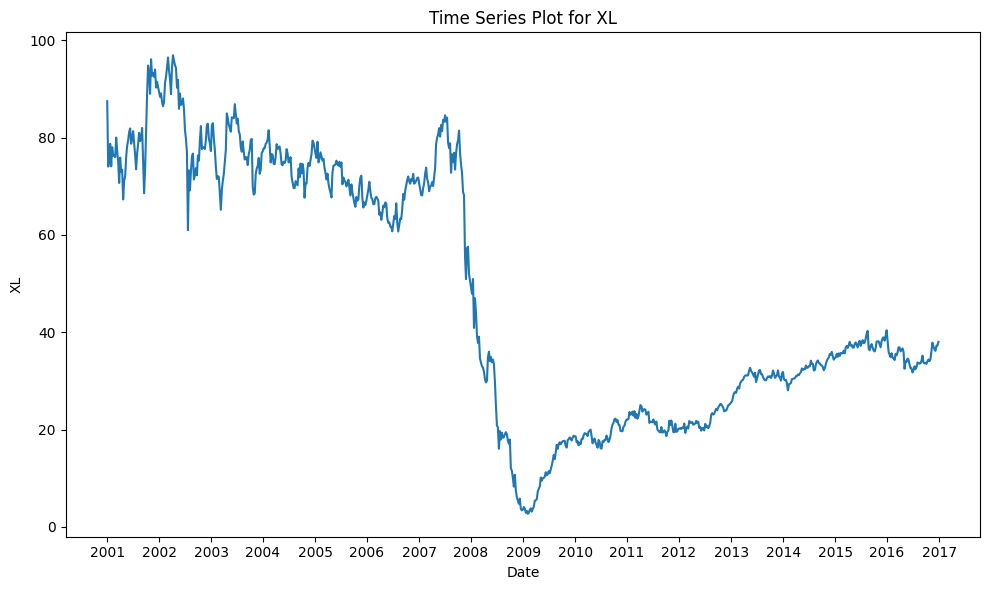

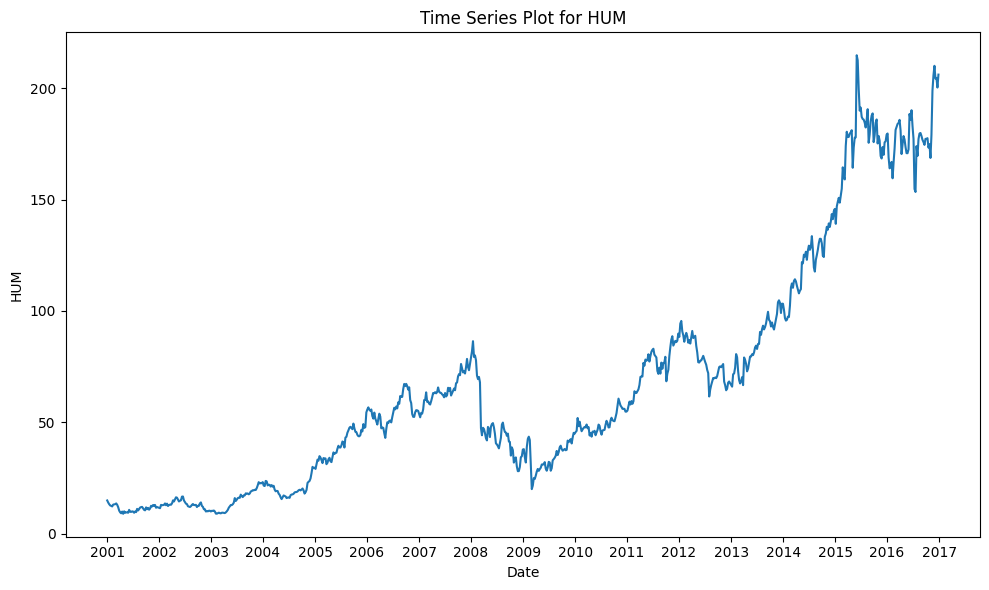

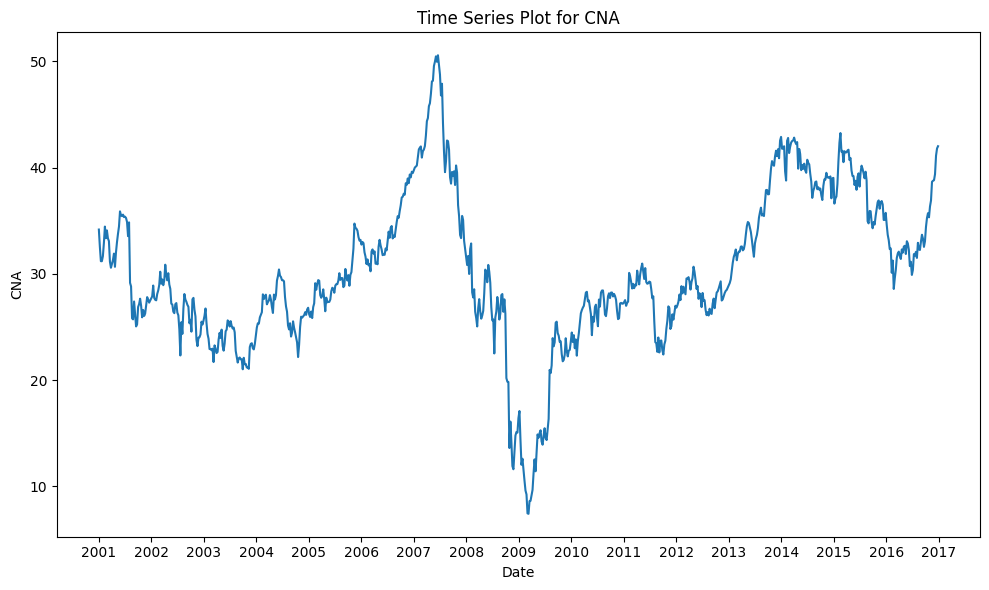

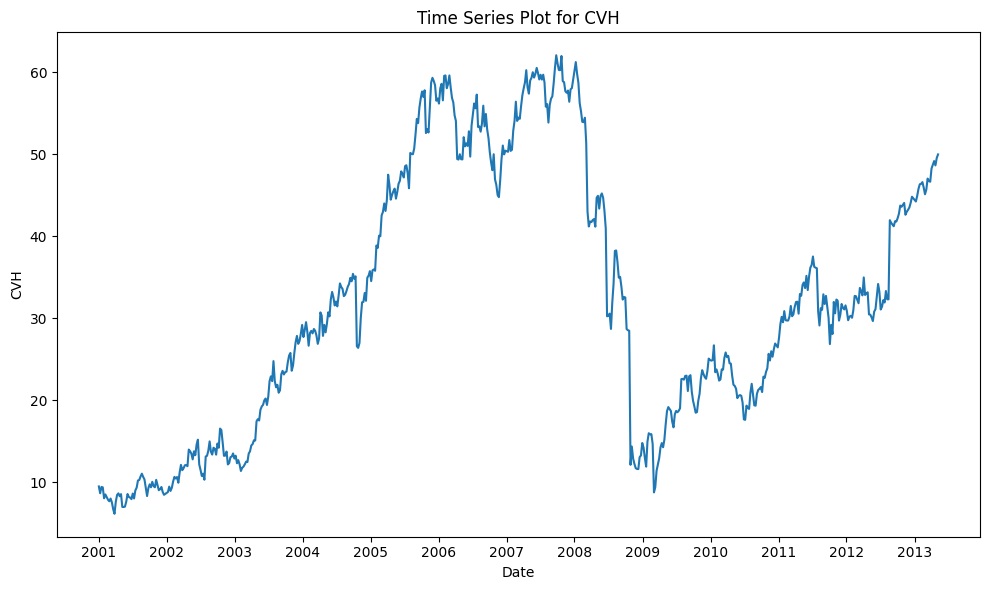

In [ ]:
for column in df.columns:
  if column != 'Date':
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df[column])
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.tight_layout()
    plt.show()

# **Loading Macroeconomic Factor's Dataset**

In [ ]:
df_gdp = pd.read_csv('GDP.csv')
print(df_gdp.head())

  observation_date        GDP
0       2001-01-01  10470.231
1       2001-04-01  10599.000
2       2001-07-01  10598.020
3       2001-10-01  10660.465
4       2002-01-01  10783.500


In [ ]:
df_fed = pd.read_csv('FedRates.csv')
print(df_fed.head())

  observation_date   DFF
0       2001-01-01  5.41
1       2001-01-02  6.67
2       2001-01-03  6.35
3       2001-01-04  5.92
4       2001-01-05  5.83


In [ ]:
df_inflation = pd.read_csv('Inflation.csv')
print(df_inflation.head())

  observation_date  CPIAUCSL
0       2001-01-01     175.6
1       2001-02-01     176.0
2       2001-03-01     176.1
3       2001-04-01     176.4
4       2001-05-01     177.3


In [ ]:
df_snp = pd.read_csv('S&P500.csv')
print(df_snp.head())

         Date      S&P 500
0  2001-01-02  1283.270020
1  2001-01-09  1300.800049
2  2001-01-16  1326.650024
3  2001-01-23  1360.400024
4  2001-01-30  1373.729980


In [ ]:
df_gdp = df_gdp.rename(columns={'observation_date': 'Date'})
df_fed = df_fed.rename(columns={'observation_date': 'Date'})
df_inflation = df_inflation.rename(columns={'observation_date': 'Date'})

# **Setting Index**

In [ ]:
df_gdp = df_gdp.set_index('Date')
df_fed = df_fed.set_index('Date')
df_inflation = df_inflation.set_index('Date')
df_snp = df_snp.set_index('Date')

In [ ]:
df_gdp.index = pd.to_datetime(df_gdp.index)
df_snp.index = pd.to_datetime(df_snp.index)

gdp_dates = df_gdp.index.astype(np.int64)
gdp_values = df_gdp['GDP'].values

cs = CubicSpline(gdp_dates, gdp_values)

snp_dates = df_snp.index.astype(np.int64)
df_snp['GDP_Interpolated'] = cs(snp_dates)

df_snp.reset_index(inplace=True)

print(df_snp.head())

        Date      S&P 500  GDP_Interpolated
0 2001-01-02  1283.270020      10473.224297
1 2001-01-09  1300.800049      10492.949505
2 2001-01-16  1326.650024      10510.604269
3 2001-01-23  1360.400024      10526.298262
4 2001-01-30  1373.729980      10540.141155


# **Interpolating Intermediate Values**

In [ ]:
df_inflation.index = pd.to_datetime(df_inflation.index)

inflation_dates = df_inflation.index.astype(np.int64)
inflation_values = df_inflation['CPIAUCSL'].values

cs_inflation = CubicSpline(inflation_dates, inflation_values)

snp_dates = df_snp['Date'].astype(np.int64)
df_snp['Inflation_Interpolated'] = cs_inflation(snp_dates)

print(df_snp.head())

        Date      S&P 500  GDP_Interpolated  Inflation_Interpolated
0 2001-01-02  1283.270020      10473.224297              175.621480
1 2001-01-09  1300.800049      10492.949505              175.752996
2 2001-01-16  1326.650024      10510.604269              175.854766
3 2001-01-23  1360.400024      10526.298262              175.931323
4 2001-01-30  1373.729980      10540.141155              175.987199


In [ ]:
df_fed.index = pd.to_datetime(df_fed.index)
df_snp['Date'] = pd.to_datetime(df_snp['Date'])

df_fed_filtered = df_fed[df_fed.index.isin(df_snp['Date'])]

df_final = df_snp.merge(df_fed_filtered, left_on='Date', right_index=True, how='left')
print(df_final.head())

        Date      S&P 500  GDP_Interpolated  Inflation_Interpolated   DFF
0 2001-01-02  1283.270020      10473.224297              175.621480  6.67
1 2001-01-09  1300.800049      10492.949505              175.752996  5.95
2 2001-01-16  1326.650024      10510.604269              175.854766  6.20
3 2001-01-23  1360.400024      10526.298262              175.931323  5.97
4 2001-01-30  1373.729980      10540.141155              175.987199  5.90


In [ ]:
df_final.to_csv('MacroeconomicFactors.csv', index=False)

In [ ]:
df_factors = pd.read_csv('MacroeconomicFactors.csv')

In [ ]:
df_factors

Date      S&P 500  GDP_Interpolated  Inflation_Interpolated   DFF
0    2001-01-02  1283.270020      10473.224297              175.621480  6.67
1    2001-01-09  1300.800049      10492.949505              175.752996  5.95
2    2001-01-16  1326.650024      10510.604269              175.854766  6.20
3    2001-01-23  1360.400024      10526.298262              175.931323  5.97
4    2001-01-30  1373.729980      10540.141155              175.987199  5.90
..          ...          ...               ...                     ...   ...
819  2016-11-22  2202.939941      19229.102745              242.367920  0.41
820  2016-11-29  2204.659912      19250.277986              242.568810  0.41
821  2016-12-06  2212.229980      19272.096972              242.831014  0.41
822  2016-12-13  2271.719971      19294.585876              243.165246  0.41
823  2016-12-20  2270.760010      19317.770871              243.582218  0.66

[824 rows x 5 columns]

# **Merging The Dataset**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df_factors['Date'] = pd.to_datetime(df_factors['Date'], format='%Y-%m-%d', errors='coerce')

df_final = pd.merge(df, df_factors, on='Date', how='inner')

In [ ]:
df_final.to_csv('final_dataset.csv', index=False)

In [ ]:
df_final.shape

(824, 80)

In [ ]:
df_final

Date           C        BAC        JPM        WFC        UBS  \
0   2001-01-02  473.640277  23.375000  44.000000  26.968750  23.922093   
1   2001-01-09  489.467366  23.500000  48.687500  24.718750  25.402346   
2   2001-01-16  512.914904  25.468750  53.187500  24.968750  24.883141   
3   2001-01-23  514.673470  25.187500  51.687500  24.812500  26.012301   
4   2001-01-30  527.100672  27.735001  55.980000  25.955000  26.056930   
..         ...         ...        ...        ...        ...        ...   
819 2016-11-22   56.099998  20.299999  78.529999  52.220001        NaN   
820 2016-11-29   55.520000  20.290001  78.919998  51.860001        NaN   
821 2016-12-06   57.919998  22.160000  83.690002  55.549999        NaN   
822 2016-12-13   59.790001  22.610001  84.760002  55.840000        NaN   
823 2016-12-20   60.799999  22.709999  86.529999  56.099998        NaN   

            WB        AXP         RY         DB  ...   GNW         AON  \
0    27.812500  45.744487  16.187500        NaN  ...   NaN   33.562500   
1    30.500000  41.290997  17.062500        NaN  ...   NaN   32.937500   
2    32.250000  42.500587  17.218750        NaN  ...   NaN   32.812500   
3    32.000000  40.906128  17.156250        NaN  ...   NaN   34.750000   
4    33.799999  42.146507  16.270000        NaN  ...   NaN   35.110001   
..         ...        ...        ...        ...  ...   ...         ...   
819        NaN  71.720001  66.330002  15.920000  ...  4.37  113.360001   
820        NaN  71.489998  67.050003  15.540000  ...  4.25  113.650002   
821        NaN  72.309998  66.279999  18.290001  ...  4.33  113.209999   
822        NaN  73.839996  69.459999  18.660000  ...  4.25  112.559998   
823        NaN  75.059998  68.809998  19.010000  ...  4.24  111.830002   

            XL         HUM        CNA       CVH      S&P 500  \
0    87.500000   14.937500  34.169128  9.500000  1283.270020   
1    74.062500   14.000000  32.539351  8.666667  1300.800049   
2    75.250000   13.250000  31.190569  9.444444  1326.650024   
3    78.750000   12.687500  31.190569  9.388889  1360.400024   
4    74.120003   12.510000  31.660394  8.055556  1373.729980   
..         ...         ...        ...       ...          ...   
819  37.070000  205.710007  38.759998       NaN  2202.939941   
820  36.490002  210.000000  38.810001       NaN  2204.659912   
821  36.180000  204.300003  39.380001       NaN  2212.229980   
822  37.220001  204.570007  41.119999       NaN  2271.719971   
823  37.279999  200.250000  41.799999       NaN  2270.760010   

     GDP_Interpolated  Inflation_Interpolated   DFF  
0        10473.224297              175.621480  6.67  
1        10492.949505              175.752996  5.95  
2        10510.604269              175.854766  6.20  
3        10526.298262              175.931323  5.97  
4        10540.141155              175.987199  5.90  
..                ...                     ...   ...  
819      19229.102745              242.367920  0.41  
820      19250.277986              242.568810  0.41  
821      19272.096972              242.831014  0.41  
822      19294.585876              243.165246  0.41  
823      19317.770871              243.582218  0.66  

[824 rows x 80 columns]

# **Extracting Relevant Variables**

In [ ]:
df_final = df_final[['Date', 'JPM', 'C', 'BAC', 'WFC', 'GS', 'MS', 'S&P 500', 'GDP_Interpolated', 'Inflation_Interpolated', 'DFF']]

In [ ]:
df_final

Date        JPM           C        BAC        WFC          GS  \
0   2001-01-02  44.000000  473.640277  23.375000  26.968750  100.250000   
1   2001-01-09  48.687500  489.467366  23.500000  24.718750  104.750000   
2   2001-01-16  53.187500  512.914904  25.468750  24.968750  110.000000   
3   2001-01-23  51.687500  514.673470  25.187500  24.812500  116.000000   
4   2001-01-30  55.980000  527.100672  27.735001  25.955000  118.620003   
..         ...        ...         ...        ...        ...         ...   
819 2016-11-22  78.529999   56.099998  20.299999  52.220001  211.110001   
820 2016-11-29  78.919998   55.520000  20.290001  51.860001  211.750000   
821 2016-12-06  83.690002   57.919998  22.160000  55.549999  231.380005   
822 2016-12-13  84.760002   59.790001  22.610001  55.840000  238.550003   
823 2016-12-20  86.529999   60.799999  22.709999  56.099998  243.089996   

            MS      S&P 500  GDP_Interpolated  Inflation_Interpolated   DFF  
0    60.468692  1283.270020      10473.224297              175.621480  6.67  
1    69.166961  1300.800049      10492.949505              175.752996  5.95  
2    70.372143  1326.650024      10510.604269              175.854766  6.20  
3    72.782507  1360.400024      10526.298262              175.931323  5.97  
4    71.262930  1373.729980      10540.141155              175.987199  5.90  
..         ...          ...               ...                     ...   ...  
819  40.540001  2202.939941      19229.102745              242.367920  0.41  
820  40.599998  2204.659912      19250.277986              242.568810  0.41  
821  42.509998  2212.229980      19272.096972              242.831014  0.41  
822  42.560001  2271.719971      19294.585876              243.165246  0.41  
823  43.500000  2270.760010      19317.770871              243.582218  0.66  

[824 rows x 11 columns]

In [ ]:
df_final = df_final.rename(columns={
    'JPM': 'JPMorgan Chase',
    'C': 'Citigroup',
    'BAC': 'Bank of America',
    'WFC': 'Wells Fargo',
    'GS': 'Goldman Sachs',
    'MS': 'Morgan Stanley',
    'S&P 500': 'S&P500',
    'GDP_Interpolated': 'GDP',
    'Inflation_Interpolated': 'Inflation',
    'DFF': 'Federal Funds Rate'
})
df_final

Date  JPMorgan Chase   Citigroup  Bank of America  Wells Fargo  \
0   2001-01-02       44.000000  473.640277        23.375000    26.968750   
1   2001-01-09       48.687500  489.467366        23.500000    24.718750   
2   2001-01-16       53.187500  512.914904        25.468750    24.968750   
3   2001-01-23       51.687500  514.673470        25.187500    24.812500   
4   2001-01-30       55.980000  527.100672        27.735001    25.955000   
..         ...             ...         ...              ...          ...   
819 2016-11-22       78.529999   56.099998        20.299999    52.220001   
820 2016-11-29       78.919998   55.520000        20.290001    51.860001   
821 2016-12-06       83.690002   57.919998        22.160000    55.549999   
822 2016-12-13       84.760002   59.790001        22.610001    55.840000   
823 2016-12-20       86.529999   60.799999        22.709999    56.099998   

     Goldman Sachs  Morgan Stanley       S&P500           GDP   Inflation  \
0       100.250000       60.468692  1283.270020  10473.224297  175.621480   
1       104.750000       69.166961  1300.800049  10492.949505  175.752996   
2       110.000000       70.372143  1326.650024  10510.604269  175.854766   
3       116.000000       72.782507  1360.400024  10526.298262  175.931323   
4       118.620003       71.262930  1373.729980  10540.141155  175.987199   
..             ...             ...          ...           ...         ...   
819     211.110001       40.540001  2202.939941  19229.102745  242.367920   
820     211.750000       40.599998  2204.659912  19250.277986  242.568810   
821     231.380005       42.509998  2212.229980  19272.096972  242.831014   
822     238.550003       42.560001  2271.719971  19294.585876  243.165246   
823     243.089996       43.500000  2270.760010  19317.770871  243.582218   

     Federal Funds Rate  
0                  6.67  
1                  5.95  
2                  6.20  
3                  5.97  
4                  5.90  
..                  ...  
819                0.41  
820                0.41  
821                0.41  
822                0.41  
823                0.66  

[824 rows x 11 columns]

# **EDA**

In [ ]:
null_counts = df_final.isnull().sum()
print("Null values in each column:")
null_counts

Null values in each column:


Date                  0
JPMorgan Chase        0
Citigroup             0
Bank of America       0
Wells Fargo           0
Goldman Sachs         0
Morgan Stanley        0
S&P500                0
GDP                   0
Inflation             0
Federal Funds Rate    0
dtype: int64

In [ ]:
print("\nDataset Info:")
print(df_final.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                824 non-null    datetime64[ns]
 1   JPMorgan Chase      824 non-null    float64       
 2   Citigroup           824 non-null    float64       
 3   Bank of America     824 non-null    float64       
 4   Wells Fargo         824 non-null    float64       
 5   Goldman Sachs       824 non-null    float64       
 6   Morgan Stanley      824 non-null    float64       
 7   S&P500              824 non-null    float64       
 8   GDP                 824 non-null    float64       
 9   Inflation           824 non-null    float64       
 10  Federal Funds Rate  824 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 70.9 KB
None


In [ ]:
print("\nSummary Statistics:")
print(df_final.describe())


Summary Statistics:
                                Date  JPMorgan Chase   Citigroup  \
count                            824      824.000000  824.000000   
mean   2009-01-02 13:01:09.902912512       43.898189  230.522733   
min              2001-01-02 00:00:00       16.600000   12.200000   
25%              2005-01-02 06:00:00       36.232501   44.387500   
50%              2009-01-09 12:00:00       41.602499   60.799999   
75%              2013-01-09 18:00:00       50.192500  456.981740   
max              2016-12-20 00:00:00       86.529999  552.299995   
std                              NaN       11.475867  202.120063   

       Bank of America  Wells Fargo  Goldman Sachs  Morgan Stanley  \
count       824.000000   824.000000     824.000000      824.000000   
mean         26.511414    33.583488     138.049539       36.860403   
min           3.650000    10.670000      59.200001       12.030000   
25%          14.247500    26.179999      97.677500       27.052500   
50%          18.

In [ ]:
df_final = df_final.set_index('Date')

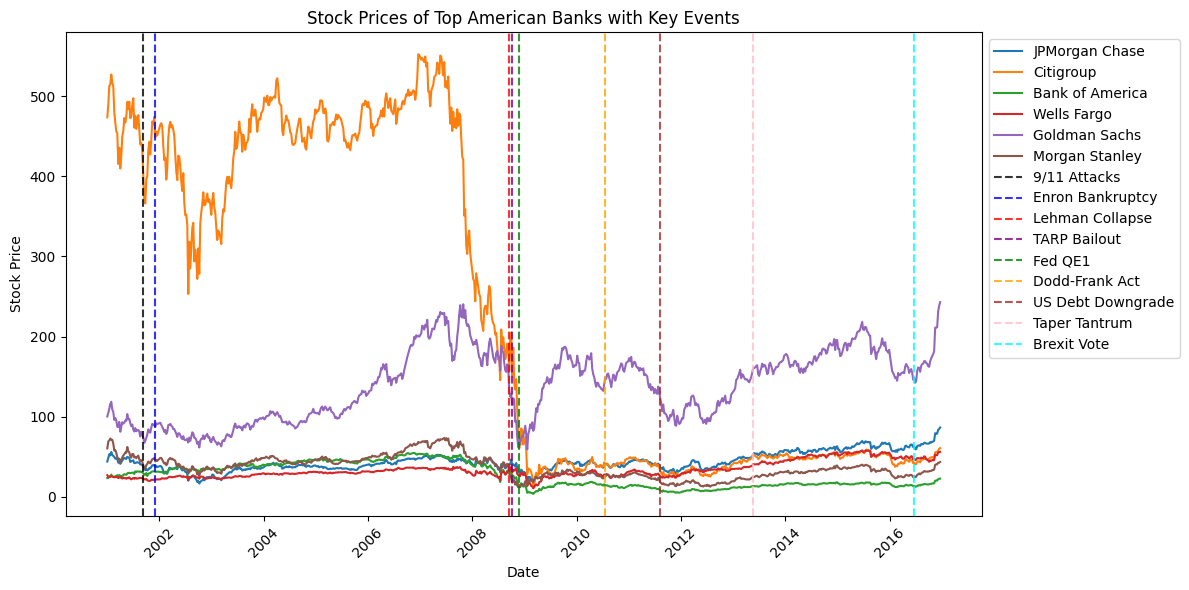

In [ ]:
columns_to_plot = df_final.columns[:6]

fig, ax = plt.subplots(figsize=(12, 6))

for column in columns_to_plot:
    ax.plot(df_final.index, df_final[column], label=column)

event_dates = {
    "9/11 Attacks": ("2001-09-11", "black"),
    "Enron Bankruptcy": ("2001-12-02", "blue"),
    "Lehman Collapse": ("2008-09-15", "red"),
    "TARP Bailout": ("2008-10-03", "purple"),
    "Fed QE1": ("2008-11-25", "green"),
    "Dodd-Frank Act": ("2010-07-21", "orange"),
    "US Debt Downgrade": ("2011-08-05", "brown"),
    "Taper Tantrum": ("2013-05-22", "pink"),
    "Brexit Vote": ("2016-06-23", "cyan"),
}

for event, (date, color) in event_dates.items():
    ax.axvline(pd.Timestamp(date), color=color, linestyle='--', alpha=0.8, label=event)

ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Prices of Top American Banks with Key Events')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


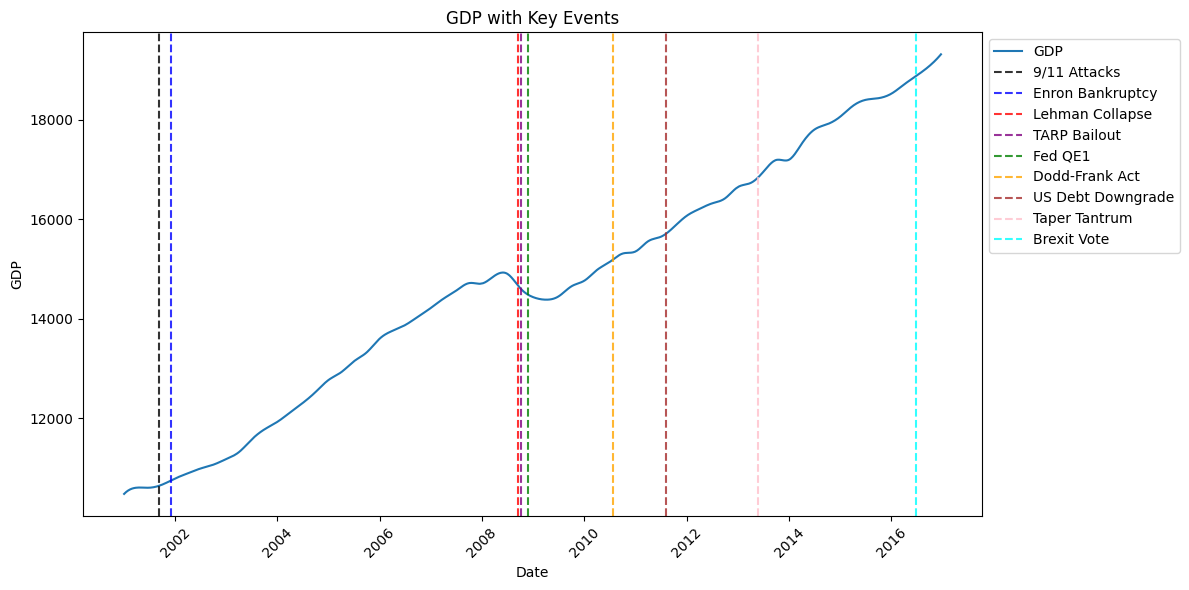

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_final.index, df_final['GDP'], label='GDP')

for event, (date, color) in event_dates.items():
    ax.axvline(pd.Timestamp(date), color=color, linestyle='--', alpha=0.8, label=event)

ax.set_xlabel('Date')
ax.set_ylabel('GDP')
ax.set_title('GDP with Key Events')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

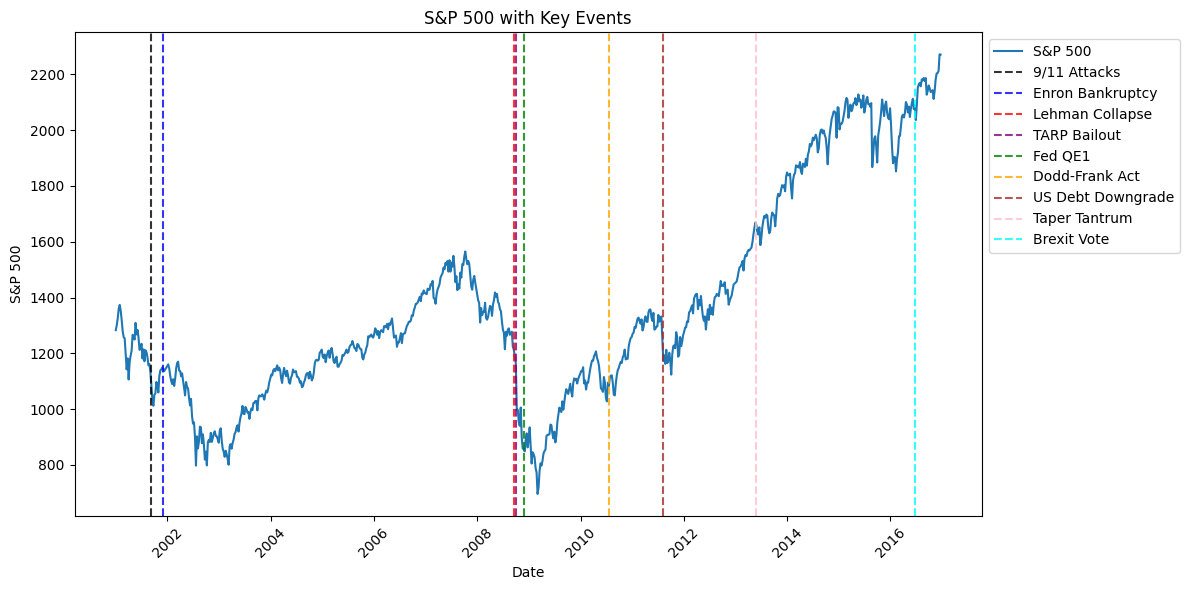

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_final.index, df_final['S&P500'], label='S&P 500')

for event, (date, color) in event_dates.items():
    ax.axvline(pd.Timestamp(date), color=color, linestyle='--', alpha=0.8, label=event)

ax.set_xlabel('Date')
ax.set_ylabel('S&P 500')
ax.set_title('S&P 500 with Key Events')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

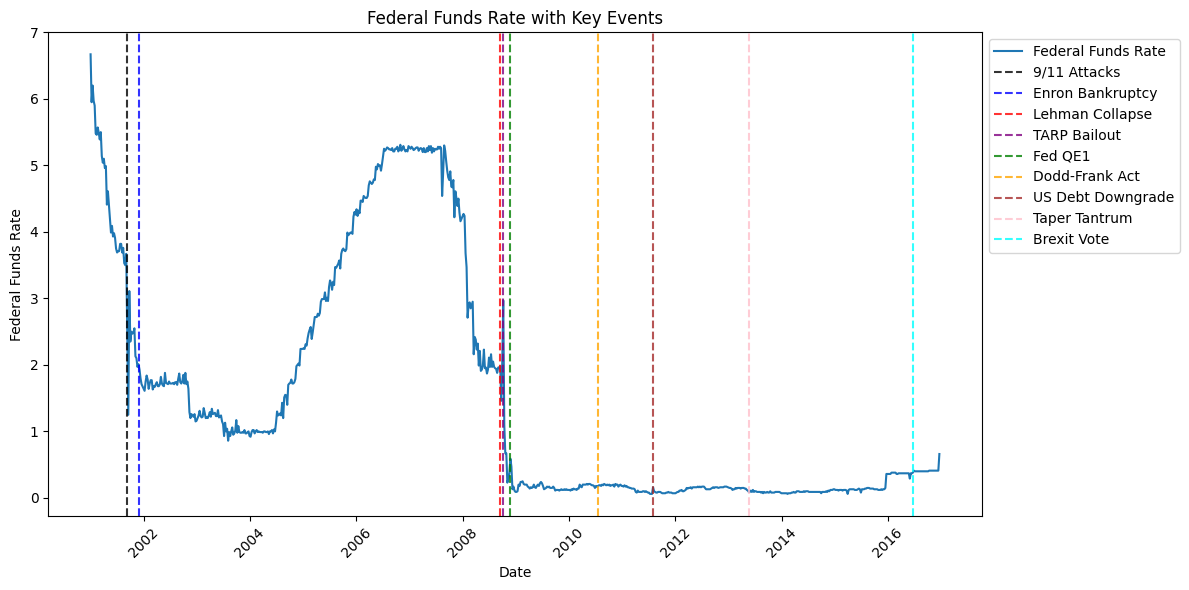

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_final.index, df_final['Federal Funds Rate'], label='Federal Funds Rate')

for event, (date, color) in event_dates.items():
    ax.axvline(pd.Timestamp(date), color=color, linestyle='--', alpha=0.8, label=event)

ax.set_xlabel('Date')
ax.set_ylabel('Federal Funds Rate')
ax.set_title('Federal Funds Rate with Key Events')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

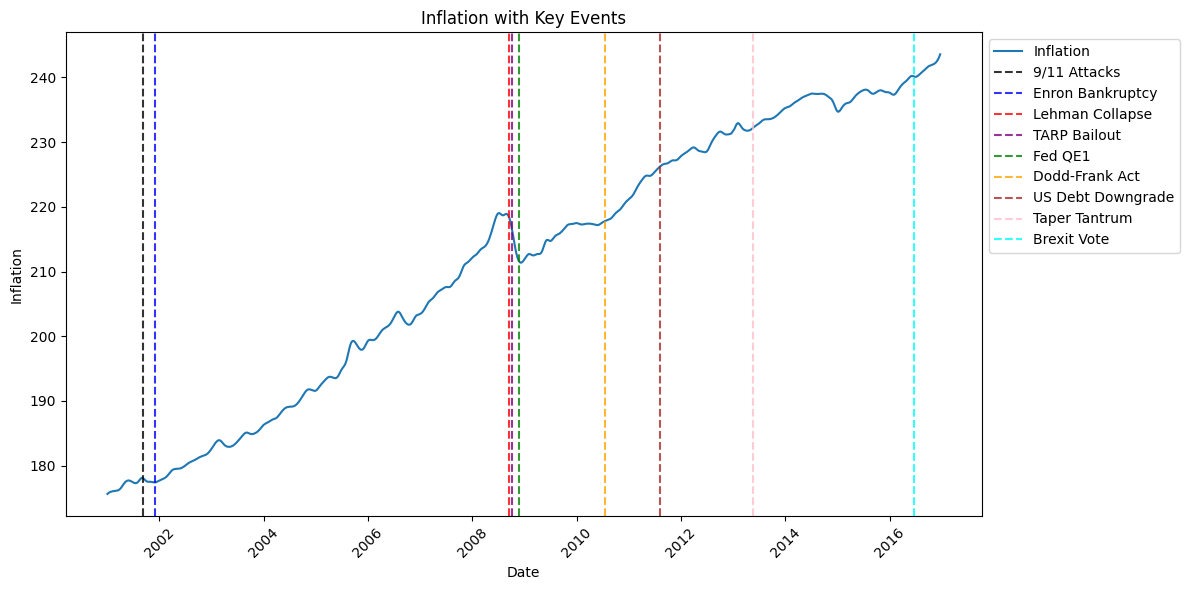

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_final.index, df_final['Inflation'], label='Inflation')

for event, (date, color) in event_dates.items():
    ax.axvline(pd.Timestamp(date), color=color, linestyle='--', alpha=0.8, label=event)

ax.set_xlabel('Date')
ax.set_ylabel('Inflation')
ax.set_title('Inflation with Key Events')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Checking Stationarity (Converting To Stationary)**

In [ ]:
non_stationary_cols = []
stationary_cols = []

for column in df_final.columns:
  if column != 'date':
    result = adfuller(df_final[column])
    p_value = result[1]
    if p_value > 0.05:
      non_stationary_cols.append(column)
    else:
      stationary_cols.append(column)

print("Non-Stationary Columns:", non_stationary_cols)
print("Number of Non-Stationary Columns:", len(non_stationary_cols))
print("\nStationary Columns:", stationary_cols)
print("Number of Stationary Columns:", len(stationary_cols))


Non-Stationary Columns: ['JPMorgan Chase', 'Citigroup', 'Bank of America', 'Wells Fargo', 'Goldman Sachs', 'Morgan Stanley', 'S&P500', 'GDP', 'Inflation', 'Federal Funds Rate']
Number of Non-Stationary Columns: 10

Stationary Columns: []
Number of Stationary Columns: 0


In [ ]:
df_return = df_final.iloc[:, :6].copy()
for column in df_return.columns:
    df_return[column] = np.log(df_return[column] / df_return[column].shift(1))

df_return = df_return.dropna()

df_lagged_diff = df_final.iloc[:, 6:].copy()
for column in df_lagged_diff.columns:
    df_lagged_diff[column] = df_lagged_diff[column] - df_lagged_diff[column].shift(1)

df_lagged_diff = df_lagged_diff.dropna()

df_standard = pd.concat([df_return, df_lagged_diff], axis=1)
df_standard = df_standard.iloc[1:]

In [ ]:
df_standard

JPMorgan Chase  Citigroup  Bank of America  Wells Fargo  \
Date                                                                  
2001-01-16        0.088401   0.046792         0.080452     0.010063   
2001-01-23       -0.028607   0.003423        -0.011104    -0.006277   
2001-01-30        0.079779   0.023859         0.096347     0.045017   
2001-02-06       -0.068381  -0.019223        -0.084801    -0.019845   
2001-02-13       -0.022047  -0.009843        -0.014229    -0.017843   
...                    ...        ...              ...          ...   
2016-11-22       -0.010514   0.011654         0.006920    -0.007060   
2016-11-29        0.004954  -0.010392        -0.000493    -0.006918   
2016-12-06        0.058685   0.042319         0.088161     0.068736   
2016-12-13        0.012704   0.031776         0.020103     0.005207   
2016-12-20        0.020667   0.016751         0.004413     0.004645   

            Goldman Sachs  Morgan Stanley     S&P500        GDP  Inflation  \
Date                                                                         
2001-01-16       0.048904        0.017274  25.849976  17.654765   0.101770   
2001-01-23       0.053110        0.033678  33.750000  15.693993   0.076557   
2001-01-30       0.022335       -0.021099  13.329956  13.842892   0.055877   
2001-02-06      -0.085036       -0.000588 -21.469971  12.101463   0.039729   
2001-02-13      -0.028394       -0.069960 -33.459961  10.469705   0.028114   
...                   ...             ...        ...        ...        ...   
2016-11-22      -0.000379        0.013410  22.550049  20.557668   0.150289   
2016-11-29       0.003027        0.001479   1.719971  21.175241   0.200890   
2016-12-06       0.088655        0.045971   7.570068  21.818986   0.262204   
2016-12-13       0.030518        0.001176  59.489990  22.488904   0.334232   
2016-12-20       0.018853        0.021846  -0.959961  23.184995   0.416973   

            Federal Funds Rate  
Date                            
2001-01-16                0.25  
2001-01-23               -0.23  
2001-01-30               -0.07  
2001-02-06               -0.42  
2001-02-13               -0.02  
...                        ...  
2016-11-22                0.00  
2016-11-29                0.00  
2016-12-06                0.00  
2016-12-13                0.00  
2016-12-20                0.25  

[822 rows x 10 columns]

In [ ]:
non_stationary_cols_return = []
stationary_cols_return = []

for column in df_standard.columns:
  if column != 'date':
    result = adfuller(df_standard[column])
    p_value = result[1]
    if p_value > 0.05:
      non_stationary_cols_return.append(column)
    else:
      stationary_cols_return.append(column)

print("Non-Stationary Columns (Differenced):", non_stationary_cols_return)
print("Number of Non-Stationary Columns (Differenced):", len(non_stationary_cols_return))
print("\nStationary Columns (Differenced):", stationary_cols_return)
print("Number of Stationary Columns (Differenced):", len(stationary_cols_return))


Non-Stationary Columns (Differenced): []
Number of Non-Stationary Columns (Differenced): 0

Stationary Columns (Differenced): ['JPMorgan Chase', 'Citigroup', 'Bank of America', 'Wells Fargo', 'Goldman Sachs', 'Morgan Stanley', 'S&P500', 'GDP', 'Inflation', 'Federal Funds Rate']
Number of Stationary Columns (Differenced): 10


# **Auto Correlation Plot**

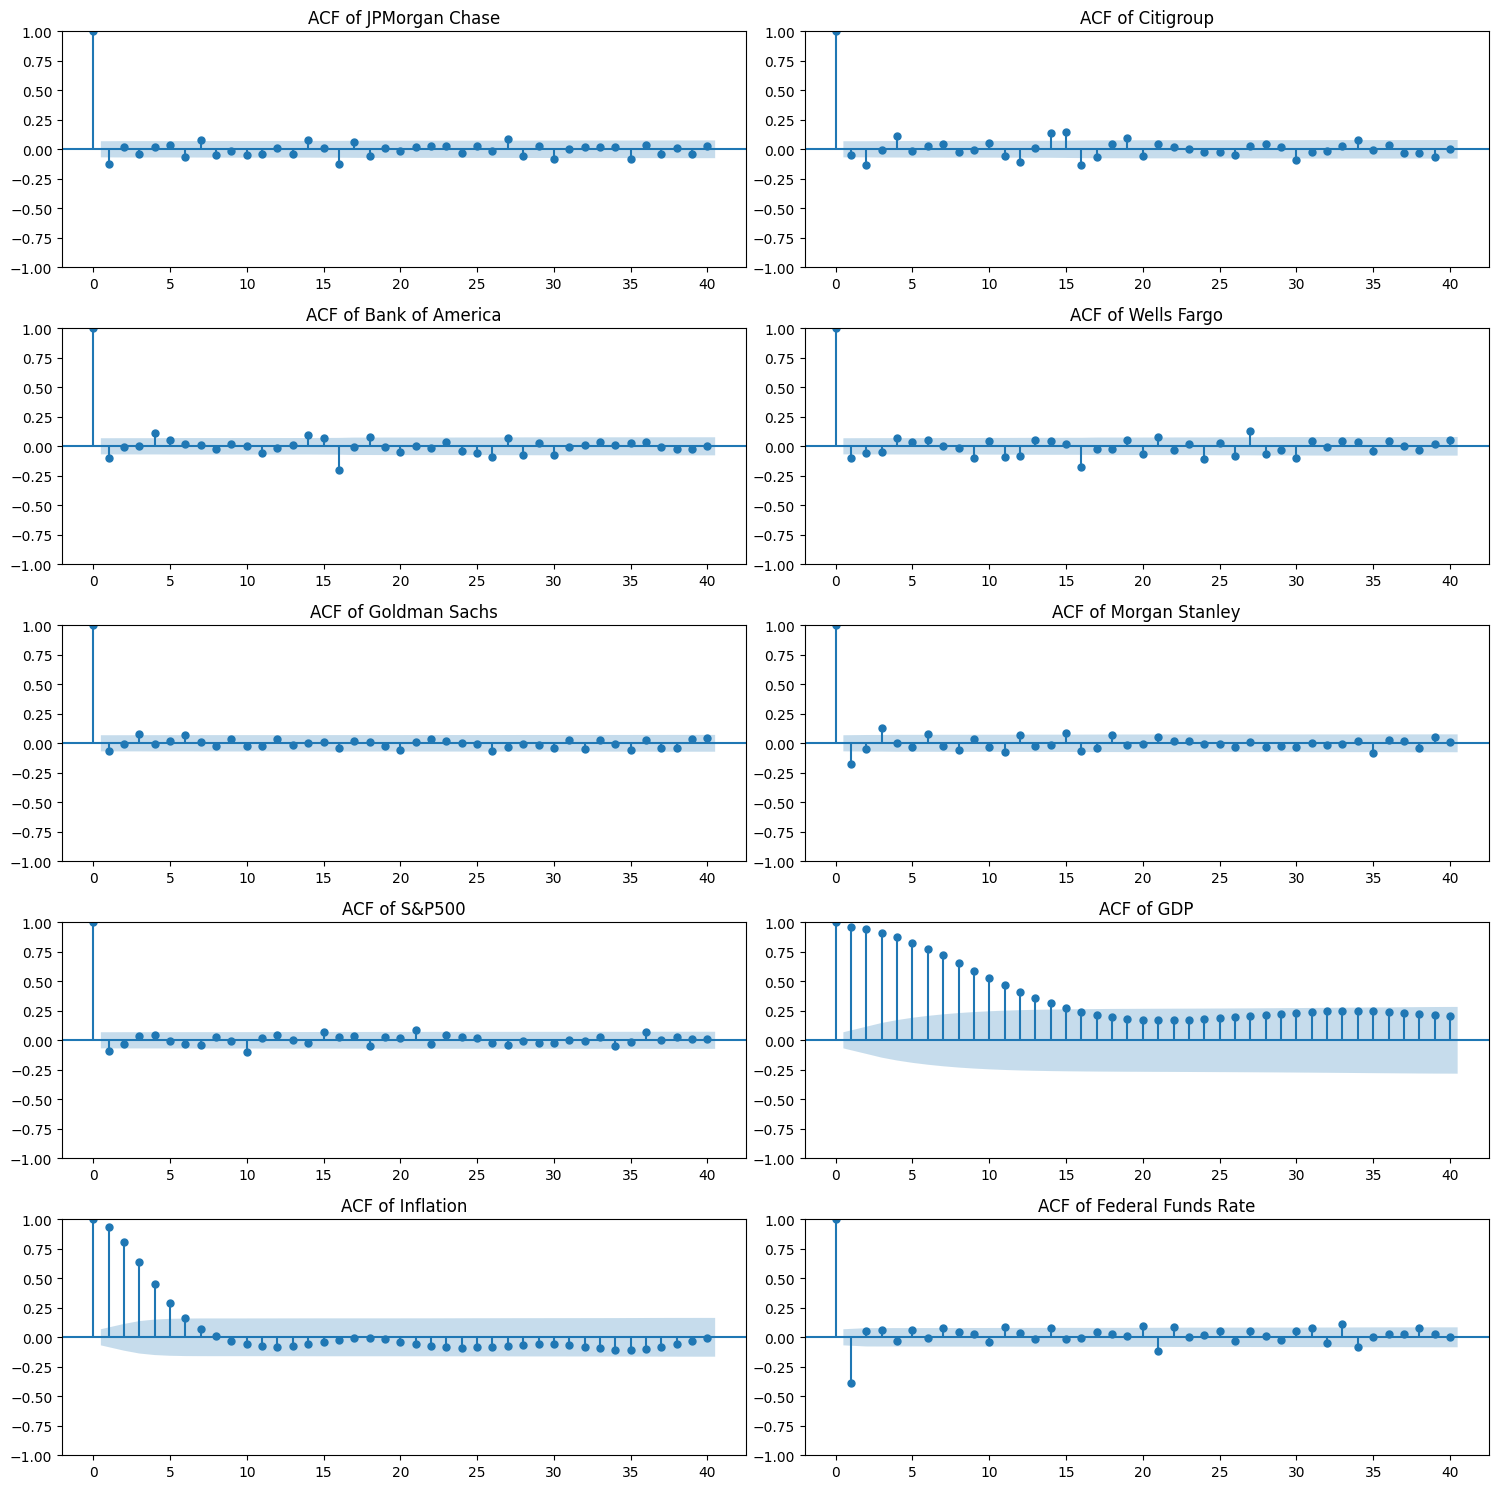

In [ ]:
columns_to_plot_acf = df_standard.columns[0:10]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot_acf):
    plot_acf(df_standard[column], ax=axes[i], lags=40)
    axes[i].set_title(f'ACF of {column}')

plt.tight_layout()
plt.show()

# **Partial Auto Correlation Plot**

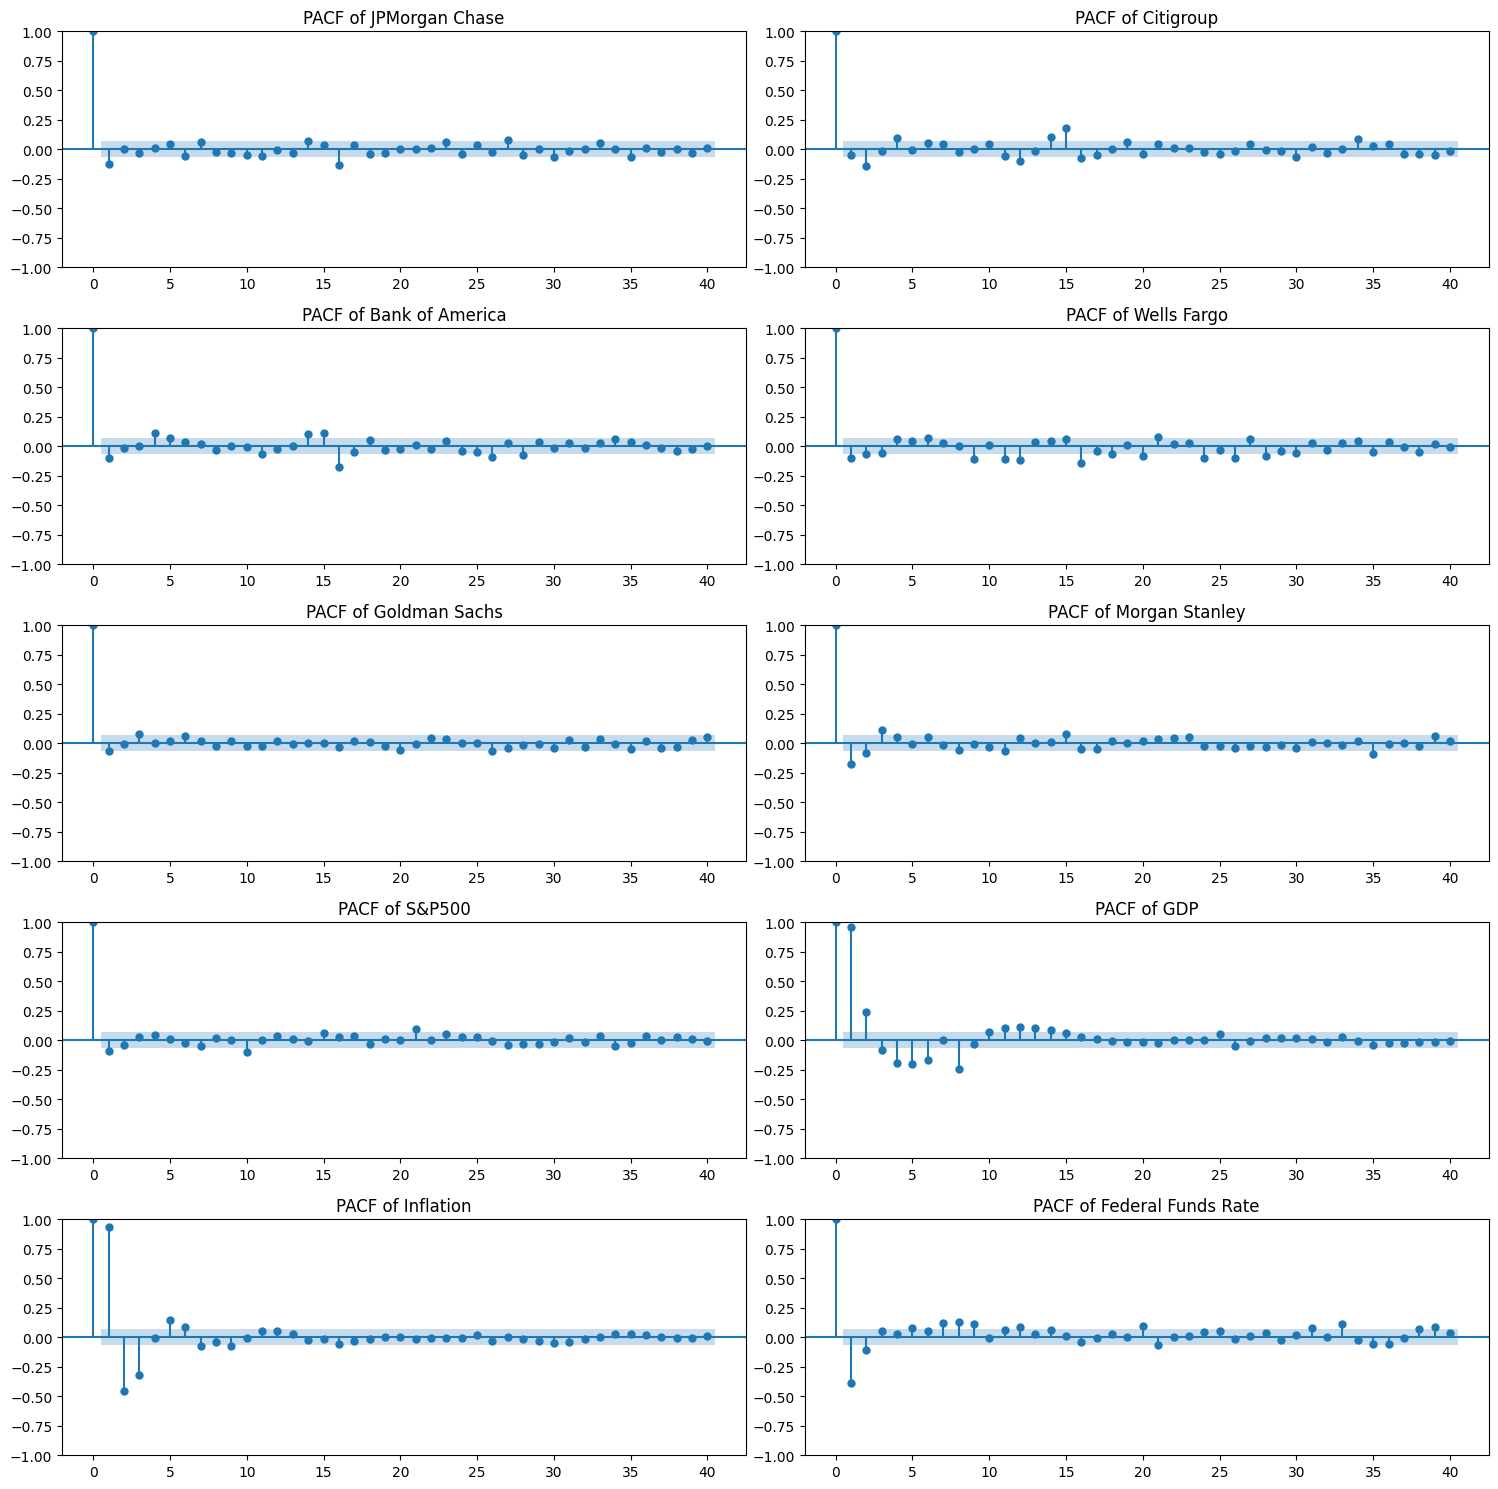

In [ ]:
columns_to_plot_pacf = df_standard.columns[0:10]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot_pacf):
    plot_pacf(df_standard[column], ax=axes[i], lags=40)
    axes[i].set_title(f'PACF of {column}')

plt.tight_layout()
plt.show()

# **Seasonality & Trend With LOESS Decomposition**

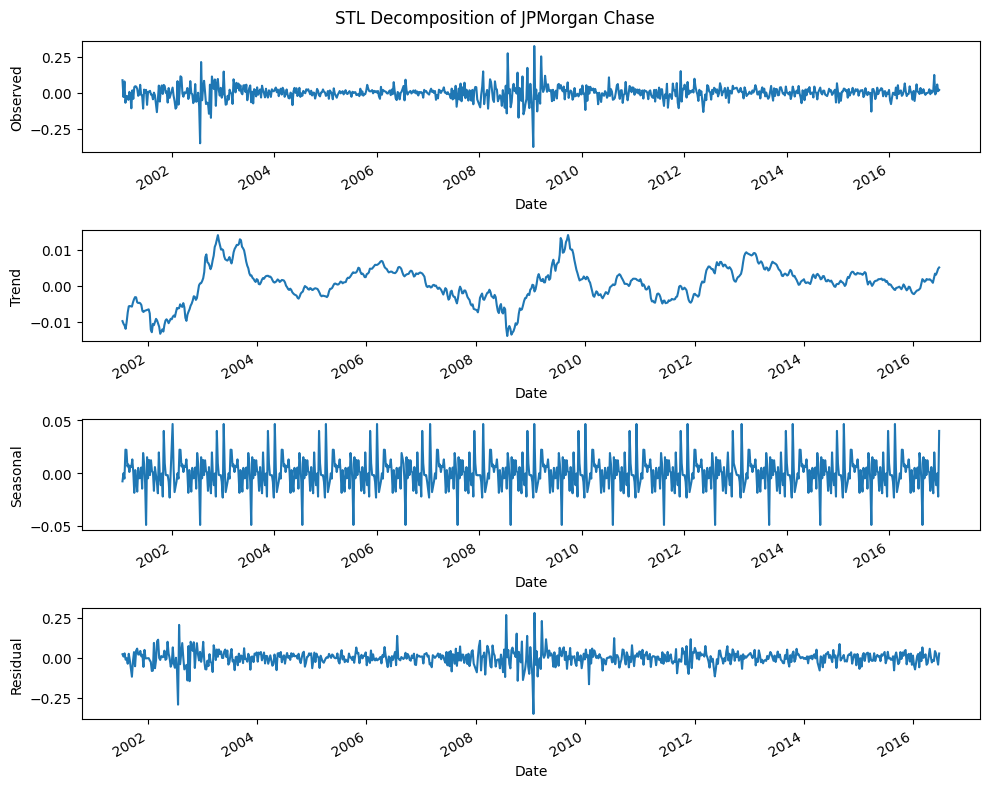

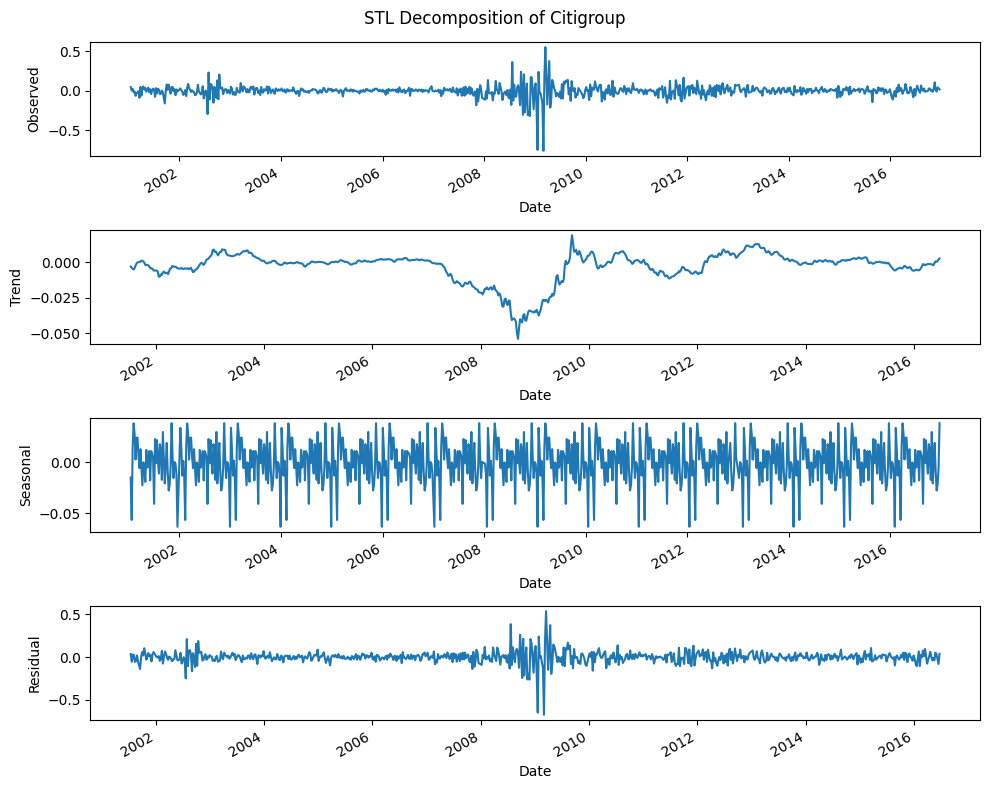

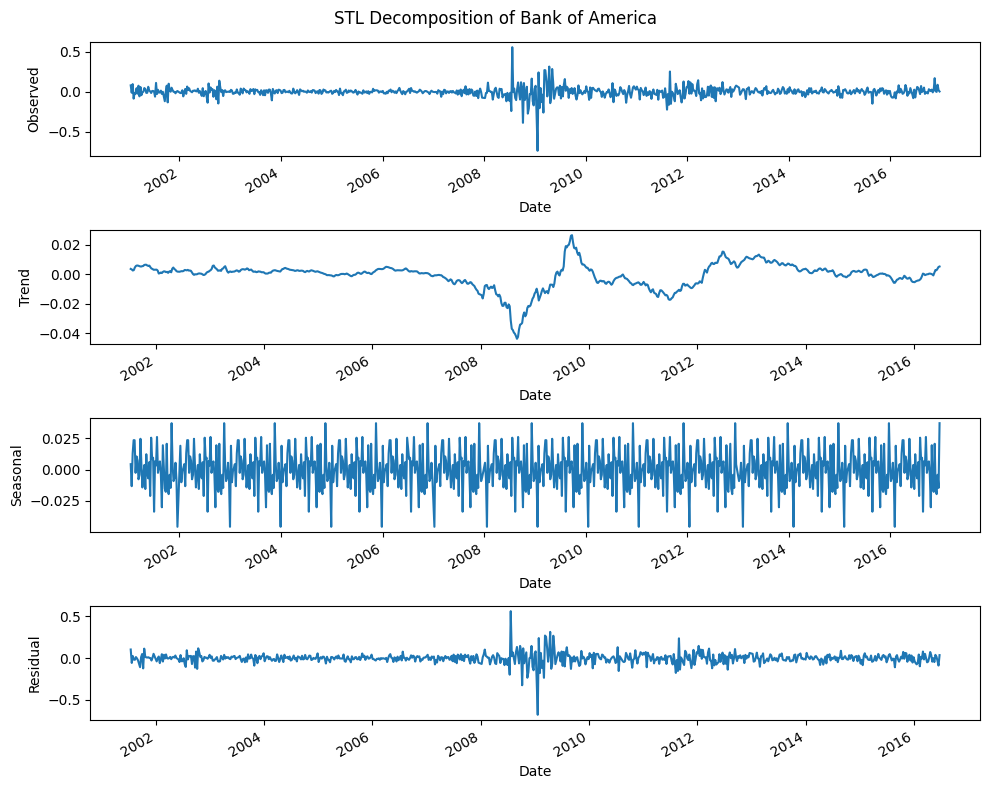

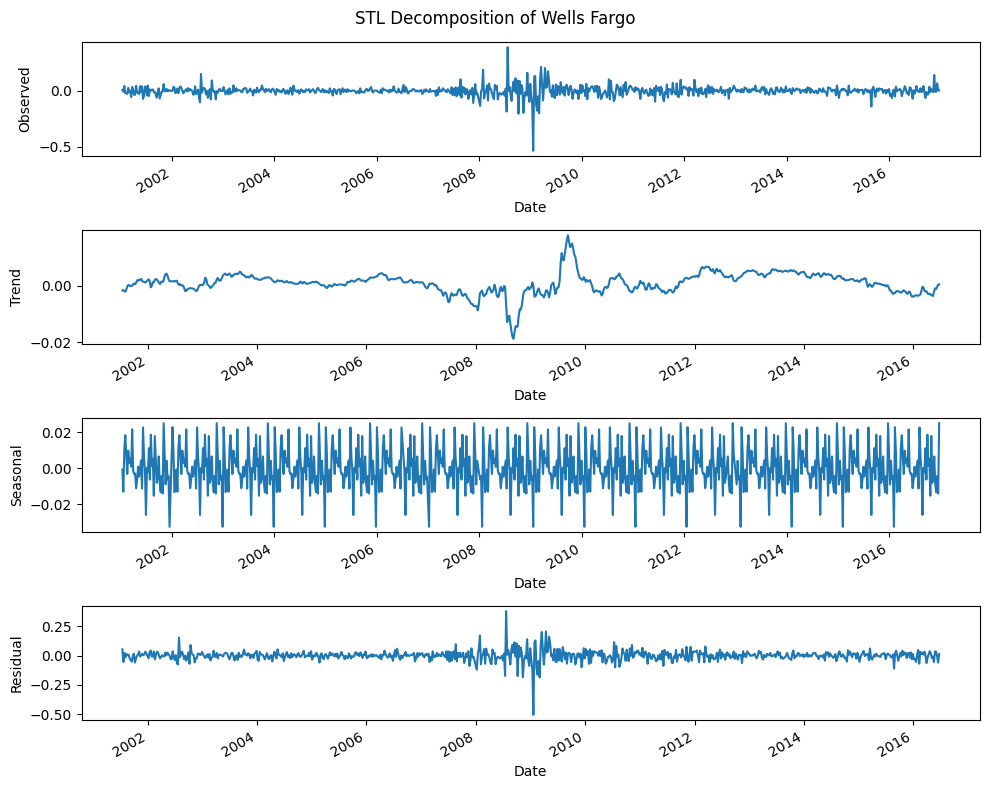

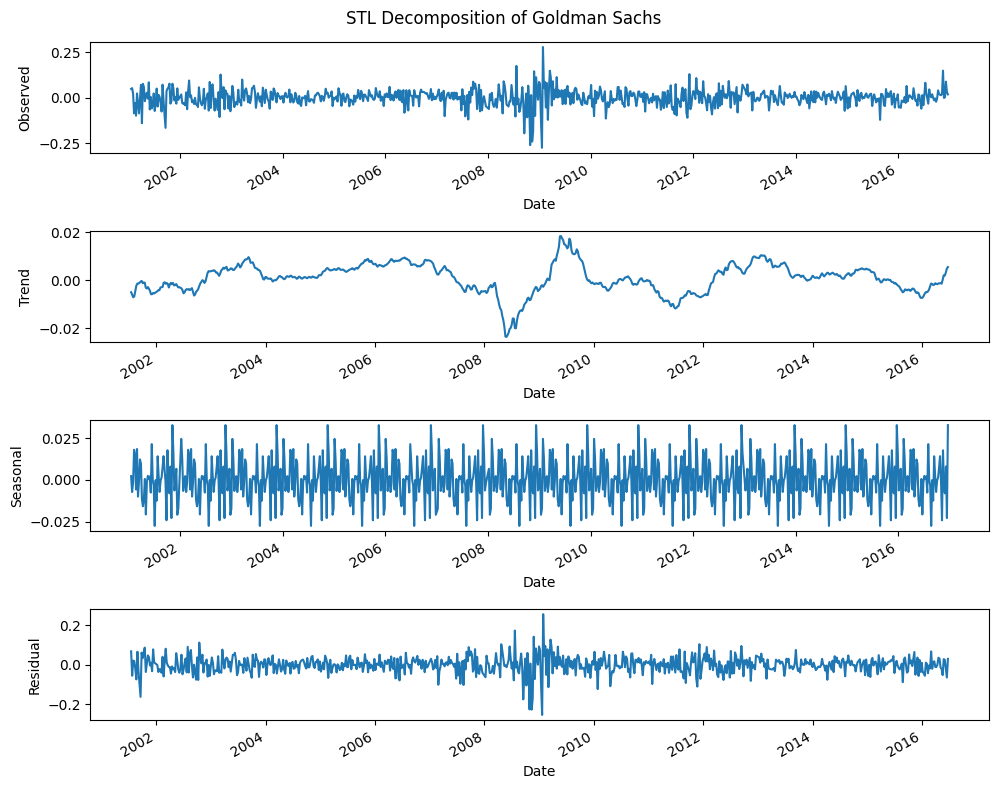

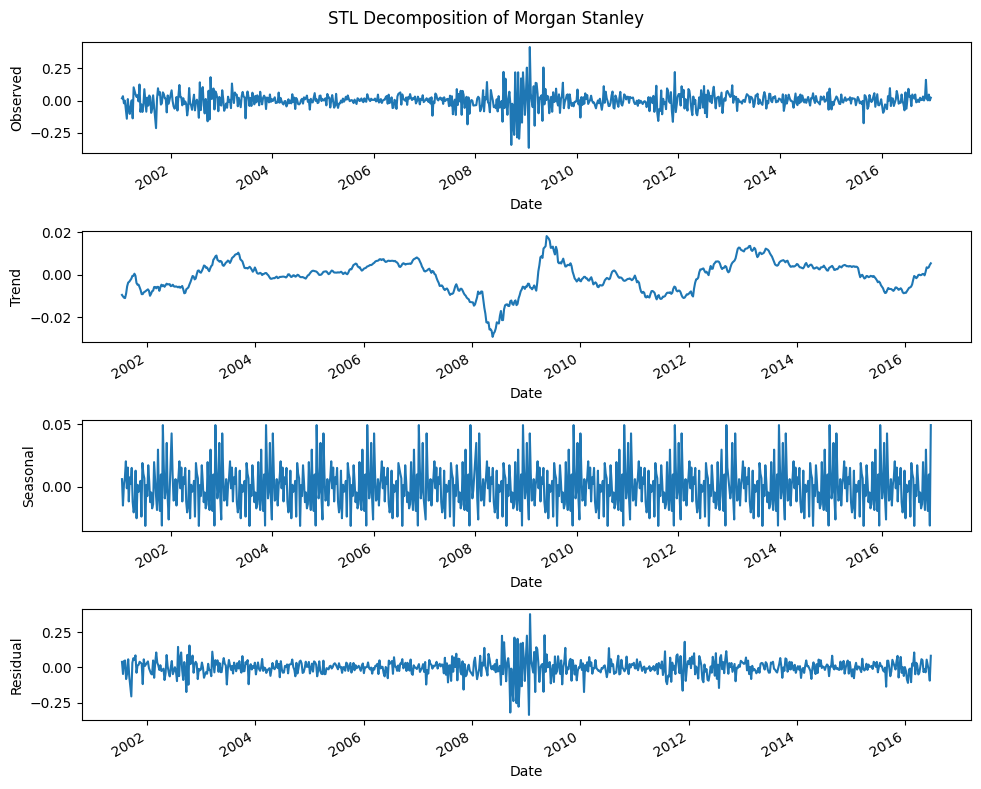

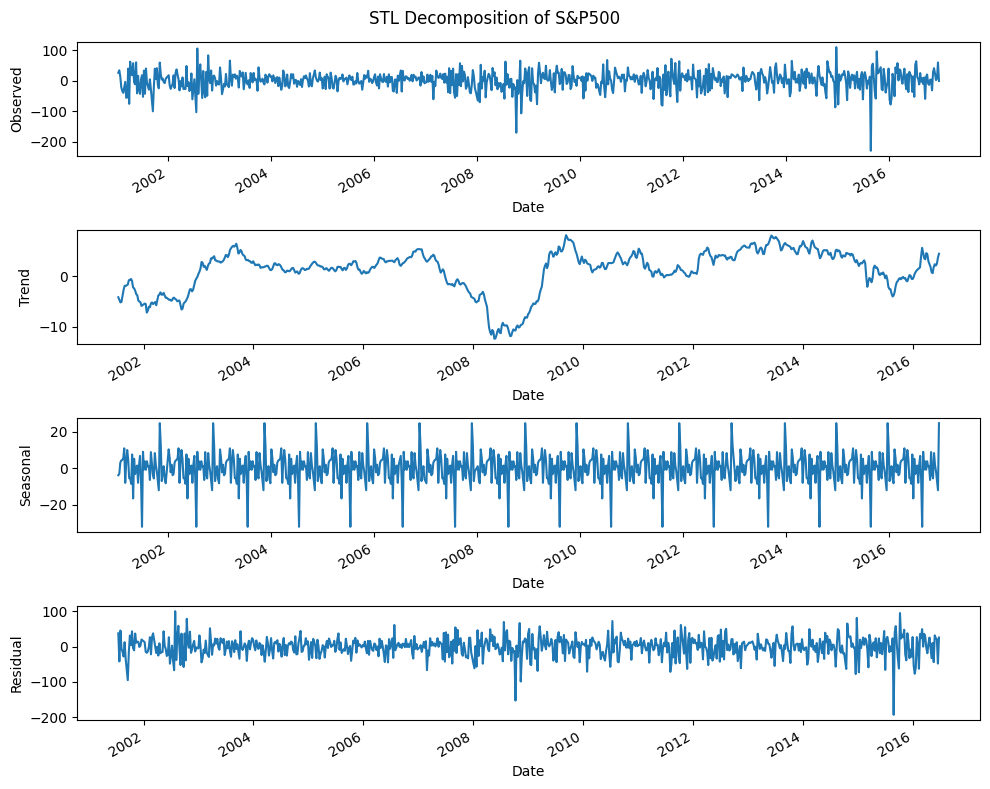

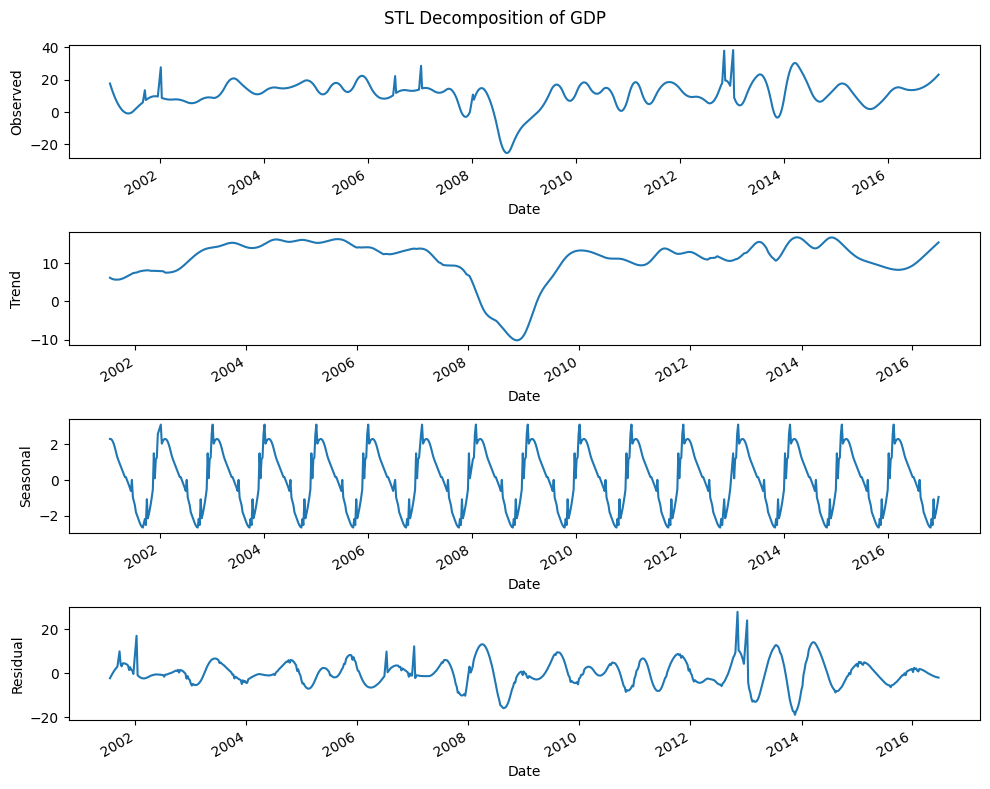

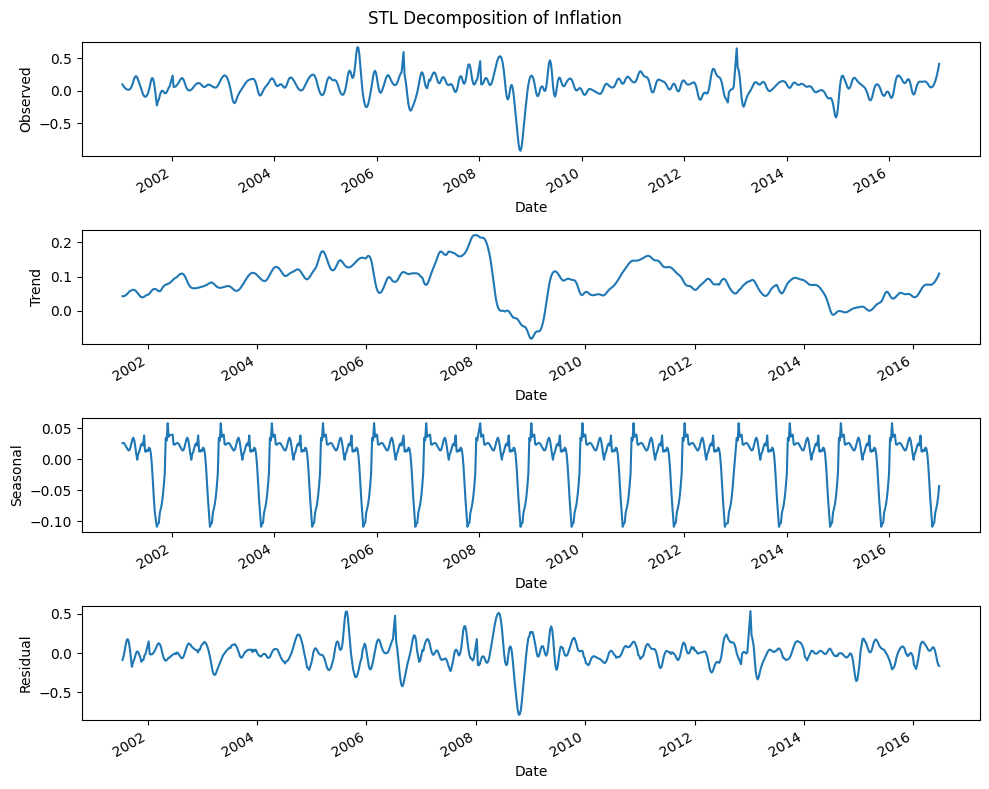

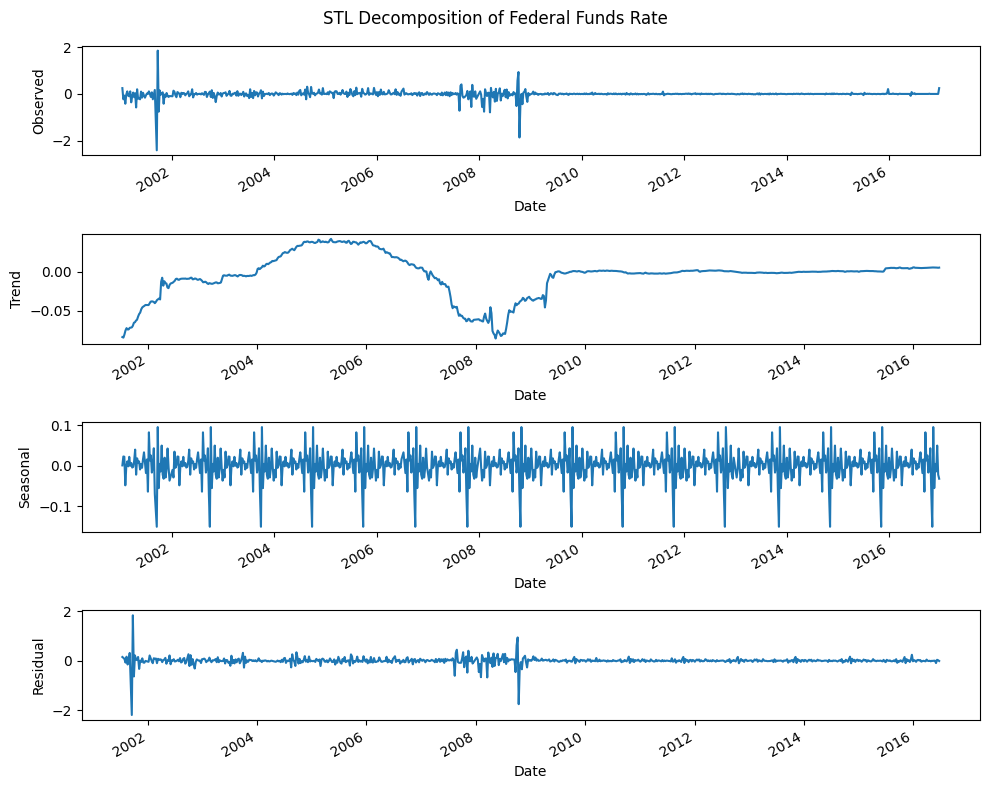

In [ ]:
for col in df_standard.columns:
    decomposition = seasonal_decompose(df_standard[col], model='additive', period=52)


    fig, axes = plt.subplots(4, 1, figsize=(10, 8))
    decomposition.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    decomposition.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    decomposition.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    axes[3].set_xlabel("Date")
    fig.suptitle(f'STL Decomposition of {col}')
    plt.tight_layout()
    plt.show()


# **Checking Correlation & Granger Causality**

In [ ]:
correlation_matrix = df_standard.corr()

print(correlation_matrix)

NameError: name 'df_standard' is not defined

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, cbar_kws={'shrink': 0.8})
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Matrix of df_return")
plt.show()

In [ ]:
def granger_causality_matrix(data, variables, maxlag=4):
       """
       Creates a Granger causality matrix.

       Args:
           data: A pandas DataFrame containing the time series data.
           variables: A list of column names representing the variables to test.
           maxlag: The maximum lag to consider in the Granger causality test.

       Returns:
           A pandas DataFrame representing the Granger causality matrix.
       """

       matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

       for c in matrix.columns:
           for r in matrix.index:
               test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
               p_values = [round(test_result[i + 1][0]['ssr_ftest'][0], 4) for i in range(maxlag)]
               if r != c:
                   matrix.loc[r, c] = min(p_values)

       return matrix

In [ ]:
variables = df_standard.columns[:10]
granger_matrix = granger_causality_matrix(df_standard, variables=variables, maxlag=4)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

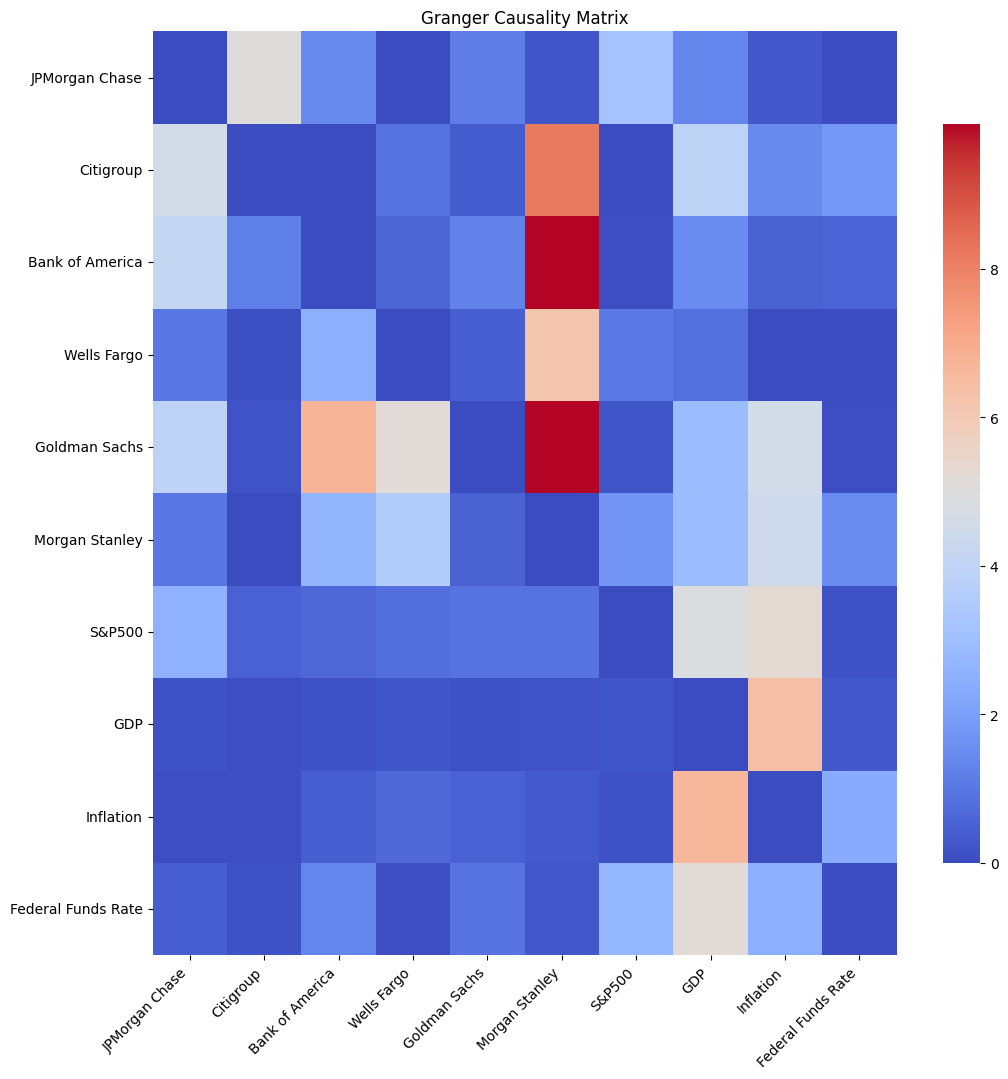

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(granger_matrix, annot=False, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, cbar_kws={'shrink': 0.8})
plt.xticks(rotation=45, ha='right')
plt.title("Granger Causality Matrix")
plt.show()

In [ ]:
def find_significant_granger_causality(granger_matrix, variables, maxlag=5, threshold=5):
    significant_pairs = []
    for cause in variables:
        for effect in variables:
            if cause != effect:
                test_result = grangercausalitytests(df_standard[[cause, effect]], maxlag=maxlag, verbose=False)

                p_values = [round(test_result[i + 1][0]['ssr_ftest'][1], 4) for i in range(maxlag)]
                min_p_value_lag = np.argmin(p_values) + 1

                test_statistic = test_result[min_p_value_lag][0]['ssr_ftest'][0]

                if test_statistic > threshold:
                    significant_pairs.append((cause, effect, min_p_value_lag))  # Store lag

    return significant_pairs

print("Significant Granger Causality Pairs (F-statistic > 5):")
significant_pairs = find_significant_granger_causality(granger_matrix, variables, maxlag=5, threshold=5)
for cause, effect, lag in significant_pairs:
    print(f"Pair: {cause} -> {effect} (Lag: {lag})")

Significant Granger Causality Pairs (F-statistic > 5):


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

Pair: JPMorgan Chase -> Citigroup (Lag: 2)
Pair: JPMorgan Chase -> Morgan Stanley (Lag: 3)
Pair: JPMorgan Chase -> S&P500 (Lag: 2)
Pair: Citigroup -> JPMorgan Chase (Lag: 2)
Pair: Citigroup -> Bank of America (Lag: 2)
Pair: Citigroup -> Wells Fargo (Lag: 2)
Pair: Citigroup -> Goldman Sachs (Lag: 2)
Pair: Citigroup -> Morgan Stanley (Lag: 2)
Pair: Citigroup -> GDP (Lag: 2)
Pair: Bank of America -> JPMorgan Chase (Lag: 5)
Pair: Bank of America -> Citigroup (Lag: 2)
Pair: Bank of America -> Wells Fargo (Lag: 5)
Pair: Bank of America -> Morgan Stanley (Lag: 1)
Pair: Bank of America -> GDP (Lag: 1)
Pair: Wells Fargo -> Citigroup (Lag: 2)
Pair: Wells Fargo -> Bank of America (Lag: 5)
Pair: Wells Fargo -> Morgan Stanley (Lag: 3)
Pair: Goldman Sachs -> JPMorgan Chase (Lag: 1)
Pair: Goldman Sachs -> Citigroup (Lag: 5)
Pair: Goldman Sachs -> Bank of America (Lag: 4)
Pair: Goldman Sachs -> Wells Fargo (Lag: 3)
Pair: Goldman Sachs -> Morgan Stanley (Lag: 2)
Pair: Goldman Sachs -> GDP (Lag: 2)
Pair

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
strong_corr_pairs = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            corr_value = correlation_matrix.loc[col1, col2]
            if abs(corr_value) >= 0.7:
                strong_corr_pairs.append((col1, col2, corr_value))

print("Pairs with Strong Correlation (|r| ≥ 0.7):")
for col1, col2, corr_value in strong_corr_pairs:
    print(f"Pair: {col1} - {col2}, Correlation: {corr_value}")

Pairs with Strong Correlation (|r| ≥ 0.7):
Pair: JPMorgan Chase - Citigroup, Correlation: 0.7114684430784993
Pair: JPMorgan Chase - Bank of America, Correlation: 0.7370980911826828
Pair: JPMorgan Chase - Wells Fargo, Correlation: 0.7439895103722816
Pair: JPMorgan Chase - Goldman Sachs, Correlation: 0.7064378234937607
Pair: JPMorgan Chase - Morgan Stanley, Correlation: 0.7004436686964027
Pair: Citigroup - JPMorgan Chase, Correlation: 0.7114684430784993
Pair: Citigroup - Bank of America, Correlation: 0.822617729246666
Pair: Citigroup - Wells Fargo, Correlation: 0.7347535743487013
Pair: Bank of America - JPMorgan Chase, Correlation: 0.7370980911826828
Pair: Bank of America - Citigroup, Correlation: 0.822617729246666
Pair: Bank of America - Wells Fargo, Correlation: 0.8014094625356275
Pair: Wells Fargo - JPMorgan Chase, Correlation: 0.7439895103722816
Pair: Wells Fargo - Citigroup, Correlation: 0.7347535743487013
Pair: Wells Fargo - Bank of America, Correlation: 0.8014094625356275
Pair: Go

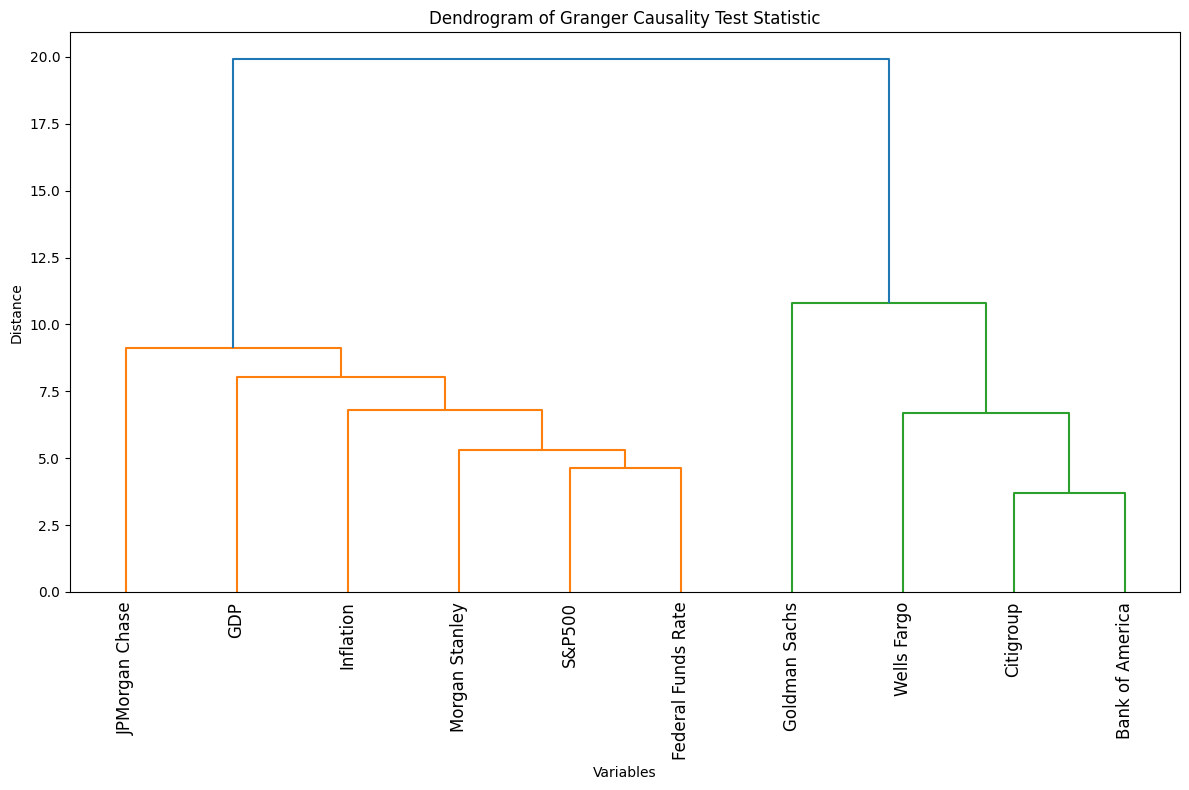

In [ ]:
dist_matrix = granger_matrix.values
linkage_matrix = linkage(dist_matrix, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=granger_matrix.columns, orientation='top')
plt.title('Dendrogram of Granger Causality Test Statistic')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
distance_matrix = 1 - np.abs(correlation_matrix)

<ipython-input-65-af18a5e76982>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


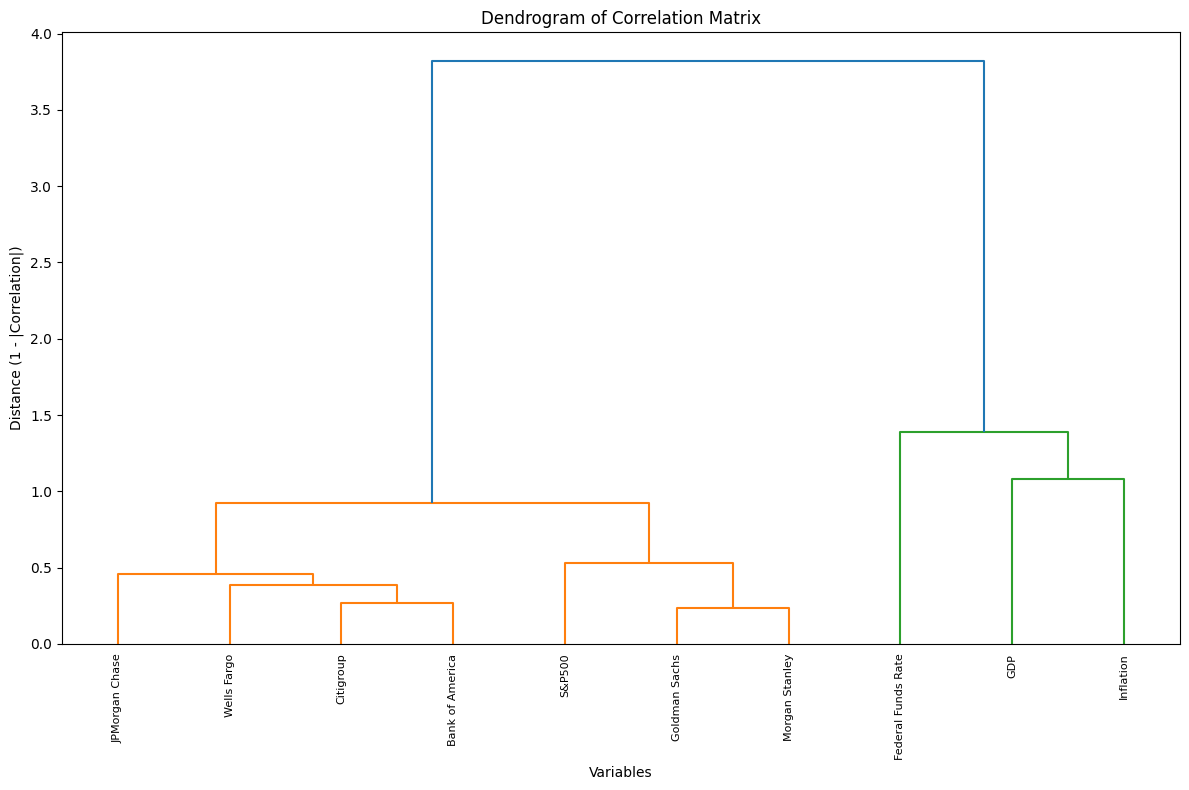

In [ ]:
linkage_matrix = linkage(distance_matrix, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=correlation_matrix.columns, orientation='top',
           leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram of Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Distance (1 - |Correlation|)')
plt.tight_layout()
plt.show()